In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.metrics import recall_score, f1_score, precision_score, accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import LinearSVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import confusion_matrix
from sklearn.calibration import CalibratedClassifierCV
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.ensemble import VotingClassifier

**Reading dataset**

In [ ]:
parkinsons = pd.read_csv('./parkinsons.csv')
parkinsons

name  MDVP:Fo(Hz)  MDVP:Fhi(Hz)  ...   spread2        D2       PPE
0    phon_R01_S01_1      119.992       157.302  ...  0.266482  2.301442  0.284654
1    phon_R01_S01_2      122.400       148.650  ...  0.335590  2.486855  0.368674
2    phon_R01_S01_3      116.682       131.111  ...  0.311173  2.342259  0.332634
3    phon_R01_S01_4      116.676       137.871  ...  0.334147  2.405554  0.368975
4    phon_R01_S01_5      116.014       141.781  ...  0.234513  2.332180  0.410335
..              ...          ...           ...  ...       ...       ...       ...
190  phon_R01_S50_2      174.188       230.978  ...  0.121952  2.657476  0.133050
191  phon_R01_S50_3      209.516       253.017  ...  0.129303  2.784312  0.168895
192  phon_R01_S50_4      174.688       240.005  ...  0.158453  2.679772  0.131728
193  phon_R01_S50_5      198.764       396.961  ...  0.207454  2.138608  0.123306
194  phon_R01_S50_6      214.289       260.277  ...  0.190667  2.555477  0.148569

[195 rows x 24 columns]

Drop the Name column

In [ ]:
df = parkinsons.drop("name", axis=1)

dataset shape

In [ ]:
print(df.shape)

(195, 23)


Dataset info

In [ ]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Data columns (total 23 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   MDVP:Fo(Hz)       195 non-null    float64
 1   MDVP:Fhi(Hz)      195 non-null    float64
 2   MDVP:Flo(Hz)      195 non-null    float64
 3   MDVP:Jitter(%)    195 non-null    float64
 4   MDVP:Jitter(Abs)  195 non-null    float64
 5   MDVP:RAP          195 non-null    float64
 6   MDVP:PPQ          195 non-null    float64
 7   Jitter:DDP        195 non-null    float64
 8   MDVP:Shimmer      195 non-null    float64
 9   MDVP:Shimmer(dB)  195 non-null    float64
 10  Shimmer:APQ3      195 non-null    float64
 11  Shimmer:APQ5      195 non-null    float64
 12  MDVP:APQ          195 non-null    float64
 13  Shimmer:DDA       195 non-null    float64
 14  NHR               195 non-null    float64
 15  HNR               195 non-null    float64
 16  status            195 non-null    int64  
 1

dataset columns

In [ ]:
df.columns

Index(['MDVP:Fo(Hz)', 'MDVP:Fhi(Hz)', 'MDVP:Flo(Hz)', 'MDVP:Jitter(%)',
       'MDVP:Jitter(Abs)', 'MDVP:RAP', 'MDVP:PPQ', 'Jitter:DDP',
       'MDVP:Shimmer', 'MDVP:Shimmer(dB)', 'Shimmer:APQ3', 'Shimmer:APQ5',
       'MDVP:APQ', 'Shimmer:DDA', 'NHR', 'HNR', 'status', 'RPDE', 'DFA',
       'spread1', 'spread2', 'D2', 'PPE'],
      dtype='object')

status: zero = healthy, 1 = parkinsons
total number of healthy and affected people

In [ ]:
df["status"].value_counts()

1    147
0     48
Name: status, dtype: int64

In [ ]:
df["status"].value_counts(normalize=True)

1    0.753846
0    0.246154
Name: status, dtype: float64

Mean and standard deviation based on status zero and one of first 10 columns

In [ ]:
columns_to_show = ['MDVP:Fo(Hz)', 'MDVP:Fhi(Hz)', 'MDVP:Flo(Hz)', 'MDVP:Jitter(%)', 'MDVP:Jitter(Abs)', 'MDVP:RAP', 'MDVP:PPQ', 'Jitter:DDP', 'MDVP:Shimmer', 'MDVP:Shimmer(dB)' ]

 # status:  (one) - Parkinson's, (zero) - healthy
df.groupby(["status"])[columns_to_show].agg([np.mean, np.std])

MDVP:Fo(Hz)            MDVP:Fhi(Hz)  ... MDVP:Shimmer MDVP:Shimmer(dB)          
              mean        std         mean  ...          std             mean       std
status                                      ...                                        
0       181.937771  52.731067   223.636750  ...     0.005544         0.162958  0.057822
1       145.180762  32.348050   188.441463  ...     0.019970         0.321204  0.207798

[2 rows x 20 columns]

Mean and standard deviation based on status zero and one of last 12 columns

In [ ]:
columns_to_show = ['Shimmer:APQ3', 'Shimmer:APQ5', 'MDVP:APQ', 'Shimmer:DDA', 'NHR', 'HNR', 'RPDE', 'DFA', 'spread1', 'spread2', 'D2', 'PPE']

 # status:  (one) - Parkinson's, (zero) - healthy
df.groupby(["status"])[columns_to_show].agg([np.mean, np.std])

Shimmer:APQ3           Shimmer:APQ5  ...        D2       PPE          
               mean       std         mean  ...       std      mean       std
status                                      ...                              
0          0.009504  0.003456     0.010509  ...  0.310269  0.123017  0.044820
1          0.017676  0.010797     0.020285  ...  0.375742  0.233828  0.084271

[2 rows x 24 columns]

histogram of all the features

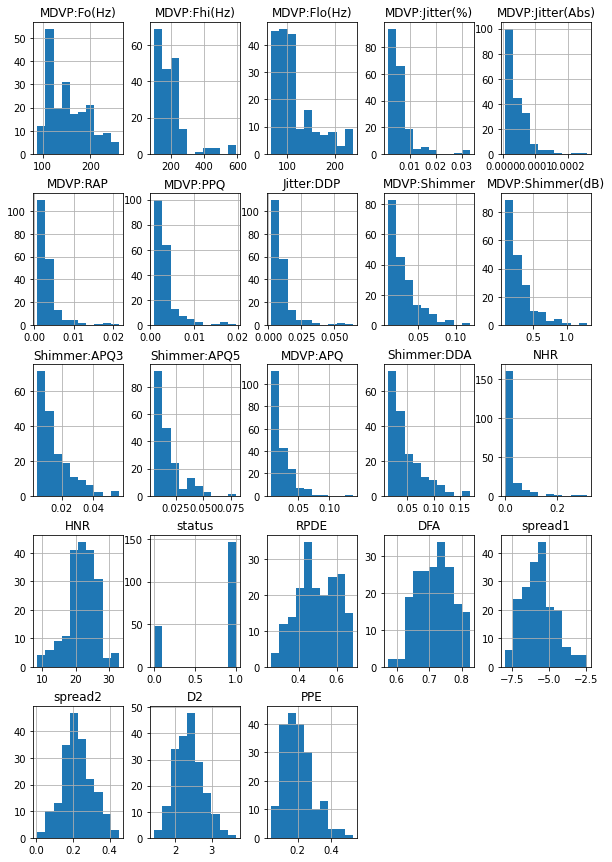

In [ ]:
features = ['MDVP:Fo(Hz)', 'MDVP:Fhi(Hz)', 'MDVP:Flo(Hz)', 'MDVP:Jitter(%)',
       'MDVP:Jitter(Abs)', 'MDVP:RAP', 'MDVP:PPQ', 'Jitter:DDP',
       'MDVP:Shimmer', 'MDVP:Shimmer(dB)', 'Shimmer:APQ3', 'Shimmer:APQ5',
       'MDVP:APQ', 'Shimmer:DDA', 'NHR', 'HNR', 'status', 'RPDE', 'DFA',
       'spread1', 'spread2', 'D2', 'PPE']
df[features].hist(figsize=(10, 15));

Boxplot of a few features

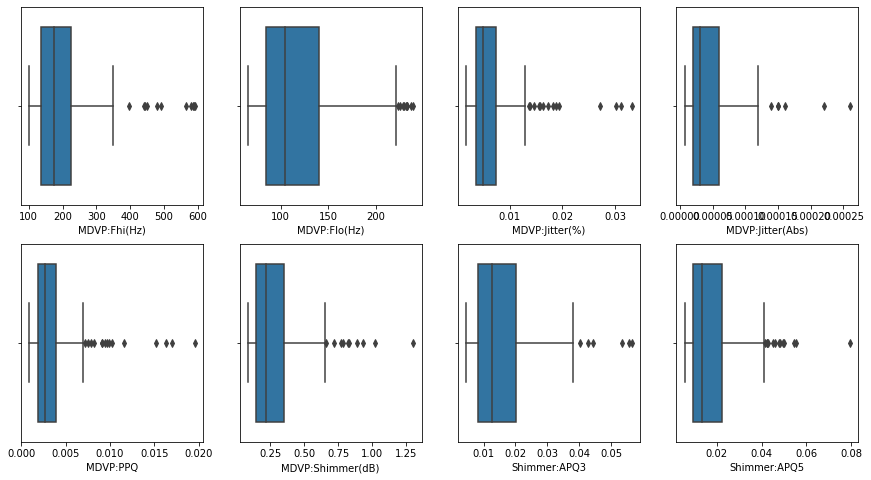

In [ ]:
_, axes = plt.subplots(nrows=2, ncols=4, figsize=(15, 8))

sns.boxplot(x="MDVP:Fhi(Hz)", data=df, ax=axes[0][0]);
sns.boxplot(x="MDVP:Flo(Hz)", data=df, ax=axes[0][1]);
sns.boxplot(x="MDVP:Jitter(%)", data=df, ax=axes[0][2]);
sns.boxplot(x="MDVP:Jitter(Abs)", data=df, ax=axes[0][3]);
sns.boxplot(x="MDVP:PPQ", data=df, ax=axes[1][0])
sns.boxplot(x='MDVP:Shimmer(dB)', data=df, ax=axes[1][1])
sns.boxplot(x='Shimmer:APQ3', data=df, ax=axes[1][2])
sns.boxplot(x='Shimmer:APQ5', data=df, ax=axes[1][3])

deviding dataset into target and feature set

In [ ]:
X = df.drop("status", axis = 1)
y = df["status"]

normalization and feature selection using chi square algorithm

In [ ]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import SelectKBest, chi2
norm = MinMaxScaler().fit(X)
X_norm = norm.transform(X)
ch2_features = SelectKBest(chi2, k = 20)
kBest_features = ch2_features.fit_transform(X_norm, y)
print("Original features", X_norm.shape)
print("Selected Features",kBest_features.shape)

Original features (195, 22)
Selected Features (195, 20)


deviding dataset into train and test set

In [ ]:
 x_train, x_test, y_train, y_test = train_test_split(kBest_features, y, test_size=0.2)
# x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

 function for evaluating models based on accuracy, precision, reacll and f1 score

In [ ]:
def evaluation_pred(y_true, y_pred):
  accuracy = accuracy_score(y_true, y_pred)
  precision = precision_score(y_true, y_pred,
                              average='micro')
  recall = recall_score(y_true, y_pred,
                        average='micro') 
  f1 = f1_score(y_true, y_pred,
                        average='micro')
  martic_dict = {"Accuracy": round(accuracy, 2),
                 "precision": round(precision, 2),
                 "recall": round(recall, 2),
                 "f1": round(f1, 2)}

  print(f"accuracy: {accuracy * 100:.2f}%")
  print(f"percision {precision:.2f}")
  print(f"recall {recall:.2f}")
  print(f"f1: {f1:.02f}")

  return martic_dict

parameter tuning of linearSVC algortihm

In [ ]:
param_grid = {'C': [400, 450, 500, 550], 
              'dual': [False, True],
              'loss': ['squared_hinge','hinge'],
              'penalty': ['l1', 'l2'],
              'dual': [True, False],
              'tol': [.00001, .0000001]}

cv_svm = GridSearchCV(estimator=LinearSVC(), param_grid=param_grid, cv = 5, verbose=2)
cv_svm.fit(x_train, y_train)
y_pred_gnb = cv_svm.predict(x_test)
evaluation_pred(y_test, y_pred_gnb)

Fitting 5 folds for each of 64 candidates, totalling 320 fits
[CV] C=400, dual=True, loss=squared_hinge, penalty=l1, tol=1e-05 .....
[CV]  C=400, dual=True, loss=squared_hinge, penalty=l1, tol=1e-05, total=   0.0s
[CV] C=400, dual=True, loss=squared_hinge, penalty=l1, tol=1e-05 .....
[CV]  C=400, dual=True, loss=squared_hinge, penalty=l1, tol=1e-05, total=   0.0s
[CV] C=400, dual=True, loss=squared_hinge, penalty=l1, tol=1e-05 .....
[CV]  C=400, dual=True, loss=squared_hinge, penalty=l1, tol=1e-05, total=   0.0s
[CV] C=400, dual=True, loss=squared_hinge, penalty=l1, tol=1e-05 .....
[CV]  C=400, dual=True, loss=squared_hinge, penalty=l1, tol=1e-05, total=   0.0s
[CV] C=400, dual=True, loss=squared_hinge, penalty=l1, tol=1e-05 .....
[CV]  C=400, dual=True, loss=squared_hinge, penalty=l1, tol=1e-05, total=   0.0s
[CV] C=400, dual=True, loss=squared_hinge, penalty=l1, tol=1e-07 .....
[CV]  C=400, dual=True, loss=squared_hinge, penalty=l1, tol=1e-07, total=   0.0s
[CV] C=400, dual=True, los

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Unsupported set of arguments: The combination of penalty='l1' and loss='squared_hinge' are not supported when dual=True, Parameters: penalty='l1', loss='squared_hinge', dual=True

  FitFailedWarning)
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Unsupported set of arguments: The combination of penalty='l1' and loss='squared_hinge' are not supported when dual=True, Parameters: penalty='l1', loss='squared_hinge', dual=True

  FitFail

[CV]  C=400, dual=True, loss=hinge, penalty=l2, tol=1e-05, total=   0.0s
[CV] C=400, dual=True, loss=hinge, penalty=l2, tol=1e-07 .............
[CV]  C=400, dual=True, loss=hinge, penalty=l2, tol=1e-07, total=   0.0s
[CV] C=400, dual=True, loss=hinge, penalty=l2, tol=1e-07 .............
[CV]  C=400, dual=True, loss=hinge, penalty=l2, tol=1e-07, total=   0.0s
[CV] C=400, dual=True, loss=hinge, penalty=l2, tol=1e-07 .............
[CV]  C=400, dual=True, loss=hinge, penalty=l2, tol=1e-07, total=   0.0s
[CV] C=400, dual=True, loss=hinge, penalty=l2, tol=1e-07 .............
[CV]  C=400, dual=True, loss=hinge, penalty=l2, tol=1e-07, total=   0.0s
[CV] C=400, dual=True, loss=hinge, penalty=l2, tol=1e-07 .............
[CV]  C=400, dual=True, loss=hinge, penalty=l2, tol=1e-07, total=   0.0s
[CV] C=400, dual=False, loss=squared_hinge, penalty=l1, tol=1e-05 ....
[CV]  C=400, dual=False, loss=squared_hinge, penalty=l1, tol=1e-05, total=   0.0s
[CV] C=400, dual=False, loss=squared_hinge, penalty=l1

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarn

[CV]  C=400, dual=False, loss=squared_hinge, penalty=l1, tol=1e-07, total=   0.0s
[CV] C=400, dual=False, loss=squared_hinge, penalty=l1, tol=1e-07 ....
[CV]  C=400, dual=False, loss=squared_hinge, penalty=l1, tol=1e-07, total=   0.0s
[CV] C=400, dual=False, loss=squared_hinge, penalty=l1, tol=1e-07 ....
[CV]  C=400, dual=False, loss=squared_hinge, penalty=l1, tol=1e-07, total=   0.0s
[CV] C=400, dual=False, loss=squared_hinge, penalty=l1, tol=1e-07 ....
[CV]  C=400, dual=False, loss=squared_hinge, penalty=l1, tol=1e-07, total=   0.0s
[CV] C=400, dual=False, loss=squared_hinge, penalty=l2, tol=1e-05 ....
[CV]  C=400, dual=False, loss=squared_hinge, penalty=l2, tol=1e-05, total=   0.0s
[CV] C=400, dual=False, loss=squared_hinge, penalty=l2, tol=1e-05 ....
[CV]  C=400, dual=False, loss=squared_hinge, penalty=l2, tol=1e-05, total=   0.0s
[CV] C=400, dual=False, loss=squared_hinge, penalty=l2, tol=1e-05 ....
[CV]  C=400, dual=False, loss=squared_hinge, penalty=l2, tol=1e-05, total=   0.0s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Unsupported set of arguments: The combination of penalty='l1' and loss='hinge' is not supported, Parameters: penalty='l1', loss='hinge', dual=False

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Unsupported set of arguments: The combination of penalty='l1' and loss='hinge' is not supported, Parameters: penalty='l1', loss='hinge', dual=False

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 

[CV]  C=450, dual=True, loss=squared_hinge, penalty=l2, tol=1e-07, total=   0.0s
[CV] C=450, dual=True, loss=hinge, penalty=l1, tol=1e-05 .............
[CV]  C=450, dual=True, loss=hinge, penalty=l1, tol=1e-05, total=   0.0s
[CV] C=450, dual=True, loss=hinge, penalty=l1, tol=1e-05 .............
[CV]  C=450, dual=True, loss=hinge, penalty=l1, tol=1e-05, total=   0.0s
[CV] C=450, dual=True, loss=hinge, penalty=l1, tol=1e-05 .............
[CV]  C=450, dual=True, loss=hinge, penalty=l1, tol=1e-05, total=   0.0s
[CV] C=450, dual=True, loss=hinge, penalty=l1, tol=1e-05 .............
[CV]  C=450, dual=True, loss=hinge, penalty=l1, tol=1e-05, total=   0.0s
[CV] C=450, dual=True, loss=hinge, penalty=l1, tol=1e-05 .............
[CV]  C=450, dual=True, loss=hinge, penalty=l1, tol=1e-05, total=   0.0s
[CV] C=450, dual=True, loss=hinge, penalty=l1, tol=1e-07 .............
[CV]  C=450, dual=True, loss=hinge, penalty=l1, tol=1e-07, total=   0.0s
[CV] C=450, dual=True, loss=hinge, penalty=l1, tol=1e-0

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Unsupported set of arguments: The combination of penalty='l1' and loss='hinge' is not supported, Parameters: penalty='l1', loss='hinge', dual=True

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Unsupported set of arguments: The combination of penalty='l1' and loss='hinge' is not supported, Parameters: penalty='l1', loss='hinge', dual=True

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
V

[CV]  C=450, dual=False, loss=squared_hinge, penalty=l1, tol=1e-07, total=   0.0s
[CV] C=450, dual=False, loss=squared_hinge, penalty=l1, tol=1e-07 ....
[CV]  C=450, dual=False, loss=squared_hinge, penalty=l1, tol=1e-07, total=   0.0s
[CV] C=450, dual=False, loss=squared_hinge, penalty=l1, tol=1e-07 ....
[CV]  C=450, dual=False, loss=squared_hinge, penalty=l1, tol=1e-07, total=   0.0s
[CV] C=450, dual=False, loss=squared_hinge, penalty=l1, tol=1e-07 ....
[CV]  C=450, dual=False, loss=squared_hinge, penalty=l1, tol=1e-07, total=   0.0s
[CV] C=450, dual=False, loss=squared_hinge, penalty=l1, tol=1e-07 ....
[CV]  C=450, dual=False, loss=squared_hinge, penalty=l1, tol=1e-07, total=   0.0s
[CV] C=450, dual=False, loss=squared_hinge, penalty=l2, tol=1e-05 ....
[CV]  C=450, dual=False, loss=squared_hinge, penalty=l2, tol=1e-05, total=   0.0s
[CV] C=450, dual=False, loss=squared_hinge, penalty=l2, tol=1e-05 ....
[CV]  C=450, dual=False, loss=squared_hinge, penalty=l2, tol=1e-05, total=   0.0s


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Unsupported set of arguments: The combination of penalty='l1' and loss='hinge' is not supported, Parameters: penalty='l1', loss='hinge', dual=False

  FitFailedWarning)
/us

[CV]  C=500, dual=True, loss=squared_hinge, penalty=l1, tol=1e-07, total=   0.0s
[CV] C=500, dual=True, loss=squared_hinge, penalty=l2, tol=1e-05 .....
[CV]  C=500, dual=True, loss=squared_hinge, penalty=l2, tol=1e-05, total=   0.0s
[CV] C=500, dual=True, loss=squared_hinge, penalty=l2, tol=1e-05 .....
[CV]  C=500, dual=True, loss=squared_hinge, penalty=l2, tol=1e-05, total=   0.0s
[CV] C=500, dual=True, loss=squared_hinge, penalty=l2, tol=1e-05 .....
[CV]  C=500, dual=True, loss=squared_hinge, penalty=l2, tol=1e-05, total=   0.0s
[CV] C=500, dual=True, loss=squared_hinge, penalty=l2, tol=1e-05 .....
[CV]  C=500, dual=True, loss=squared_hinge, penalty=l2, tol=1e-05, total=   0.0s
[CV] C=500, dual=True, loss=squared_hinge, penalty=l2, tol=1e-05 .....
[CV]  C=500, dual=True, loss=squared_hinge, penalty=l2, tol=1e-05, total=   0.0s
[CV] C=500, dual=True, loss=squared_hinge, penalty=l2, tol=1e-07 .....
[CV]  C=500, dual=True, loss=squared_hinge, penalty=l2, tol=1e-07, total=   0.0s
[CV] C=

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarn

[CV]  C=500, dual=True, loss=hinge, penalty=l2, tol=1e-07, total=   0.0s
[CV] C=500, dual=True, loss=hinge, penalty=l2, tol=1e-07 .............
[CV]  C=500, dual=True, loss=hinge, penalty=l2, tol=1e-07, total=   0.0s
[CV] C=500, dual=False, loss=squared_hinge, penalty=l1, tol=1e-05 ....
[CV]  C=500, dual=False, loss=squared_hinge, penalty=l1, tol=1e-05, total=   0.0s
[CV] C=500, dual=False, loss=squared_hinge, penalty=l1, tol=1e-05 ....
[CV]  C=500, dual=False, loss=squared_hinge, penalty=l1, tol=1e-05, total=   0.0s
[CV] C=500, dual=False, loss=squared_hinge, penalty=l1, tol=1e-05 ....
[CV]  C=500, dual=False, loss=squared_hinge, penalty=l1, tol=1e-05, total=   0.0s
[CV] C=500, dual=False, loss=squared_hinge, penalty=l1, tol=1e-05 ....
[CV]  C=500, dual=False, loss=squared_hinge, penalty=l1, tol=1e-05, total=   0.0s
[CV] C=500, dual=False, loss=squared_hinge, penalty=l1, tol=1e-05 ....
[CV]  C=500, dual=False, loss=squared_hinge, penalty=l1, tol=1e-05, total=   0.0s
[CV] C=500, dual=F

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarn

[CV]  C=500, dual=False, loss=hinge, penalty=l1, tol=1e-05, total=   0.0s
[CV] C=500, dual=False, loss=hinge, penalty=l1, tol=1e-05 ............
[CV]  C=500, dual=False, loss=hinge, penalty=l1, tol=1e-05, total=   0.0s
[CV] C=500, dual=False, loss=hinge, penalty=l1, tol=1e-05 ............
[CV]  C=500, dual=False, loss=hinge, penalty=l1, tol=1e-05, total=   0.0s
[CV] C=500, dual=False, loss=hinge, penalty=l1, tol=1e-05 ............
[CV]  C=500, dual=False, loss=hinge, penalty=l1, tol=1e-05, total=   0.0s
[CV] C=500, dual=False, loss=hinge, penalty=l1, tol=1e-05 ............
[CV]  C=500, dual=False, loss=hinge, penalty=l1, tol=1e-05, total=   0.0s
[CV] C=500, dual=False, loss=hinge, penalty=l1, tol=1e-07 ............
[CV]  C=500, dual=False, loss=hinge, penalty=l1, tol=1e-07, total=   0.0s
[CV] C=500, dual=False, loss=hinge, penalty=l1, tol=1e-07 ............
[CV]  C=500, dual=False, loss=hinge, penalty=l1, tol=1e-07, total=   0.0s
[CV] C=500, dual=False, loss=hinge, penalty=l1, tol=1e-0

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Unsupported set of arguments: The combination of penalty='l2' and loss='hinge' are not supported when dual=False, Parameters: penalty='l2', loss='hinge', dual=False

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Unsupported set of arguments: The combination of penalty='l2' and loss='hinge' are not supported when dual=False, Parameters: penalty='l2', loss='hinge', dual=False

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parame

[CV]  C=550, dual=True, loss=hinge, penalty=l1, tol=1e-07, total=   0.0s
[CV] C=550, dual=True, loss=hinge, penalty=l1, tol=1e-07 .............
[CV]  C=550, dual=True, loss=hinge, penalty=l1, tol=1e-07, total=   0.0s
[CV] C=550, dual=True, loss=hinge, penalty=l1, tol=1e-07 .............
[CV]  C=550, dual=True, loss=hinge, penalty=l1, tol=1e-07, total=   0.0s
[CV] C=550, dual=True, loss=hinge, penalty=l1, tol=1e-07 .............
[CV]  C=550, dual=True, loss=hinge, penalty=l1, tol=1e-07, total=   0.0s
[CV] C=550, dual=True, loss=hinge, penalty=l2, tol=1e-05 .............
[CV]  C=550, dual=True, loss=hinge, penalty=l2, tol=1e-05, total=   0.0s
[CV] C=550, dual=True, loss=hinge, penalty=l2, tol=1e-05 .............
[CV]  C=550, dual=True, loss=hinge, penalty=l2, tol=1e-05, total=   0.0s
[CV] C=550, dual=True, loss=hinge, penalty=l2, tol=1e-05 .............
[CV]  C=550, dual=True, loss=hinge, penalty=l2, tol=1e-05, total=   0.0s
[CV] C=550, dual=True, loss=hinge, penalty=l2, tol=1e-05 ......

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarn

[CV]  C=550, dual=False, loss=squared_hinge, penalty=l1, tol=1e-07, total=   0.0s
[CV] C=550, dual=False, loss=squared_hinge, penalty=l1, tol=1e-07 ....
[CV]  C=550, dual=False, loss=squared_hinge, penalty=l1, tol=1e-07, total=   0.0s
[CV] C=550, dual=False, loss=squared_hinge, penalty=l1, tol=1e-07 ....
[CV]  C=550, dual=False, loss=squared_hinge, penalty=l1, tol=1e-07, total=   0.0s
[CV] C=550, dual=False, loss=squared_hinge, penalty=l2, tol=1e-05 ....
[CV]  C=550, dual=False, loss=squared_hinge, penalty=l2, tol=1e-05, total=   0.0s
[CV] C=550, dual=False, loss=squared_hinge, penalty=l2, tol=1e-05 ....
[CV]  C=550, dual=False, loss=squared_hinge, penalty=l2, tol=1e-05, total=   0.0s
[CV] C=550, dual=False, loss=squared_hinge, penalty=l2, tol=1e-05 ....
[CV]  C=550, dual=False, loss=squared_hinge, penalty=l2, tol=1e-05, total=   0.0s
[CV] C=550, dual=False, loss=squared_hinge, penalty=l2, tol=1e-05 ....
[CV]  C=550, dual=False, loss=squared_hinge, penalty=l2, tol=1e-05, total=   0.0s


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Unsupported set of arguments: The combination of penalty='l1' and loss='hinge' is not supported, Parameters: penalty='l1', loss='hinge', dual=False

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Unsupported set of arguments: The combination of penalty='l1' and loss='hinge' is not supported, Parameters: penalty='l1', loss='hinge', dual=False

  FitFailedWarning)
/usr/local/

{'Accuracy': 0.87, 'f1': 0.87, 'precision': 0.87, 'recall': 0.87}

best parameters of LinearSVC

In [ ]:
cv_svm.best_params_

{'C': 400, 'dual': True, 'loss': 'hinge', 'penalty': 'l2', 'tol': 1e-05}

parameter tunning of GaussianNB

In [ ]:
parameters = {
    'priors': [None],
    'var_smoothing': [0.0001, 0.001, 0.01]
}

cv_gnb = GridSearchCV(estimator=GaussianNB(), param_grid=parameters, cv = 5, verbose=0)
cv_gnb.fit(x_train, y_train)
y_pred_gnb = cv_gnb.predict(x_test)
evaluation_pred(y_test, y_pred_gnb)

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1321: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  % (pos_label, average), UserWarning)


accuracy: 71.79%
percision 0.72
recall 0.72
f1: 0.72


{'Accuracy': 0.72, 'f1': 0.72, 'precision': 0.72, 'recall': 0.72}

best parameters of GaussianNB

In [ ]:
cv_gnb.best_params_

{'priors': None, 'var_smoothing': 0.0001}

parameter tunning of LogisticRegression

In [ ]:
param_grid = {'C': [100,200,300],
              'penalty': ['l1', 'l2', 'elasticnet', 'none'], 
              'tol': [.01, .001, .0001],
              'fit_intercept':[True, False],
              'class_weight':['balanced', "None"],
              'max_iter':[1000]
              } 

cv_lr = GridSearchCV(estimator=LogisticRegression(), param_grid=param_grid, cv = 5, verbose=2)
cv_lr.fit(x_train, y_train)
y_pred_lr = cv_lr.predict(x_test)
evaluation_pred(y_test, y_pred_lr)

Fitting 5 folds for each of 144 candidates, totalling 720 fits
[CV] C=100, class_weight=balanced, fit_intercept=True, max_iter=1000, penalty=l1, tol=0.01 
[CV]  C=100, class_weight=balanced, fit_intercept=True, max_iter=1000, penalty=l1, tol=0.01, total=   0.0s
[CV] C=100, class_weight=balanced, fit_intercept=True, max_iter=1000, penalty=l1, tol=0.01 
[CV]  C=100, class_weight=balanced, fit_intercept=True, max_iter=1000, penalty=l1, tol=0.01, total=   0.0s
[CV] C=100, class_weight=balanced, fit_intercept=True, max_iter=1000, penalty=l1, tol=0.01 
[CV]  C=100, class_weight=balanced, fit_intercept=True, max_iter=1000, penalty=l1, tol=0.01, total=   0.0s
[CV] C=100, class_weight=balanced, fit_intercept=True, max_iter=1000, penalty=l1, tol=0.01 
[CV]  C=100, class_weight=balanced, fit_intercept=True, max_iter=1000, penalty=l1, tol=0.01, total=   0.0s
[CV] C=100, class_weight=balanced, fit_intercept=True, max_iter=1000, penalty=l1, tol=0.01 
[CV]  C=100, class_weight=balanced, fit_intercept

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


[CV]  C=100, class_weight=balanced, fit_intercept=True, max_iter=1000, penalty=l2, tol=0.01, total=   0.0s
[CV] C=100, class_weight=balanced, fit_intercept=True, max_iter=1000, penalty=l2, tol=0.01 
[CV]  C=100, class_weight=balanced, fit_intercept=True, max_iter=1000, penalty=l2, tol=0.01, total=   0.0s
[CV] C=100, class_weight=balanced, fit_intercept=True, max_iter=1000, penalty=l2, tol=0.01 
[CV]  C=100, class_weight=balanced, fit_intercept=True, max_iter=1000, penalty=l2, tol=0.01, total=   0.0s
[CV] C=100, class_weight=balanced, fit_intercept=True, max_iter=1000, penalty=l2, tol=0.01 
[CV]  C=100, class_weight=balanced, fit_intercept=True, max_iter=1000, penalty=l2, tol=0.01, total=   0.0s
[CV] C=100, class_weight=balanced, fit_intercept=True, max_iter=1000, penalty=l2, tol=0.01 
[CV]  C=100, class_weight=balanced, fit_intercept=True, max_iter=1000, penalty=l2, tol=0.01, total=   0.0s
[CV] C=100, class_weight=balanced, fit_intercept=True, max_iter=1000, penalty=l2, tol=0.001 
[CV]

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got elasticnet penalty.

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
/usr/local/lib/python3.7/dist

[CV]  C=100, class_weight=balanced, fit_intercept=True, max_iter=1000, penalty=none, tol=0.01, total=   0.0s
[CV] C=100, class_weight=balanced, fit_intercept=True, max_iter=1000, penalty=none, tol=0.01 
[CV]  C=100, class_weight=balanced, fit_intercept=True, max_iter=1000, penalty=none, tol=0.01, total=   0.1s
[CV] C=100, class_weight=balanced, fit_intercept=True, max_iter=1000, penalty=none, tol=0.01 
[CV]  C=100, class_weight=balanced, fit_intercept=True, max_iter=1000, penalty=none, tol=0.01, total=   0.1s
[CV] C=100, class_weight=balanced, fit_intercept=True, max_iter=1000, penalty=none, tol=0.001 


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "


[CV]  C=100, class_weight=balanced, fit_intercept=True, max_iter=1000, penalty=none, tol=0.001, total=   0.3s
[CV] C=100, class_weight=balanced, fit_intercept=True, max_iter=1000, penalty=none, tol=0.001 
[CV]  C=100, class_weight=balanced, fit_intercept=True, max_iter=1000, penalty=none, tol=0.001, total=   0.2s
[CV] C=100, class_weight=balanced, fit_intercept=True, max_iter=1000, penalty=none, tol=0.001 


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "


[CV]  C=100, class_weight=balanced, fit_intercept=True, max_iter=1000, penalty=none, tol=0.001, total=   0.2s
[CV] C=100, class_weight=balanced, fit_intercept=True, max_iter=1000, penalty=none, tol=0.001 
[CV]  C=100, class_weight=balanced, fit_intercept=True, max_iter=1000, penalty=none, tol=0.001, total=   0.2s
[CV] C=100, class_weight=balanced, fit_intercept=True, max_iter=1000, penalty=none, tol=0.001 
[CV]  C=100, class_weight=balanced, fit_intercept=True, max_iter=1000, penalty=none, tol=0.001, total=   0.1s
[CV] C=100, class_weight=balanced, fit_intercept=True, max_iter=1000, penalty=none, tol=0.0001 


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "


[CV]  C=100, class_weight=balanced, fit_intercept=True, max_iter=1000, penalty=none, tol=0.0001, total=   0.3s
[CV] C=100, class_weight=balanced, fit_intercept=True, max_iter=1000, penalty=none, tol=0.0001 


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "


[CV]  C=100, class_weight=balanced, fit_intercept=True, max_iter=1000, penalty=none, tol=0.0001, total=   0.3s
[CV] C=100, class_weight=balanced, fit_intercept=True, max_iter=1000, penalty=none, tol=0.0001 


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "


[CV]  C=100, class_weight=balanced, fit_intercept=True, max_iter=1000, penalty=none, tol=0.0001, total=   0.4s
[CV] C=100, class_weight=balanced, fit_intercept=True, max_iter=1000, penalty=none, tol=0.0001 


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "


[CV]  C=100, class_weight=balanced, fit_intercept=True, max_iter=1000, penalty=none, tol=0.0001, total=   0.4s
[CV] C=100, class_weight=balanced, fit_intercept=True, max_iter=1000, penalty=none, tol=0.0001 


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)


[CV]  C=100, class_weight=balanced, fit_intercept=True, max_iter=1000, penalty=none, tol=0.0001, total=   0.4s
[CV] C=100, class_weight=balanced, fit_intercept=False, max_iter=1000, penalty=l1, tol=0.01 
[CV]  C=100, class_weight=balanced, fit_intercept=False, max_iter=1000, penalty=l1, tol=0.01, total=   0.0s
[CV] C=100, class_weight=balanced, fit_intercept=False, max_iter=1000, penalty=l1, tol=0.01 
[CV]  C=100, class_weight=balanced, fit_intercept=False, max_iter=1000, penalty=l1, tol=0.01, total=   0.0s
[CV] C=100, class_weight=balanced, fit_intercept=False, max_iter=1000, penalty=l1, tol=0.01 
[CV]  C=100, class_weight=balanced, fit_intercept=False, max_iter=1000, penalty=l1, tol=0.01, total=   0.0s
[CV] C=100, class_weight=balanced, fit_intercept=False, max_iter=1000, penalty=l1, tol=0.01 
[CV]  C=100, class_weight=balanced, fit_intercept=False, max_iter=1000, penalty=l1, tol=0.01, total=   0.0s
[CV] C=100, class_weight=balanced, fit_intercept=False, max_iter=1000, penalty=l1, to

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got elasticnet penalty.

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
/usr/local/lib/python3.7/dist

[CV]  C=100, class_weight=balanced, fit_intercept=False, max_iter=1000, penalty=none, tol=0.01, total=   0.1s
[CV] C=100, class_weight=balanced, fit_intercept=False, max_iter=1000, penalty=none, tol=0.01 
[CV]  C=100, class_weight=balanced, fit_intercept=False, max_iter=1000, penalty=none, tol=0.01, total=   0.0s
[CV] C=100, class_weight=balanced, fit_intercept=False, max_iter=1000, penalty=none, tol=0.01 
[CV]  C=100, class_weight=balanced, fit_intercept=False, max_iter=1000, penalty=none, tol=0.01, total=   0.1s
[CV] C=100, class_weight=balanced, fit_intercept=False, max_iter=1000, penalty=none, tol=0.01 
[CV]  C=100, class_weight=balanced, fit_intercept=False, max_iter=1000, penalty=none, tol=0.01, total=   0.1s
[CV] C=100, class_weight=balanced, fit_intercept=False, max_iter=1000, penalty=none, tol=0.01 


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "


[CV]  C=100, class_weight=balanced, fit_intercept=False, max_iter=1000, penalty=none, tol=0.01, total=   0.1s
[CV] C=100, class_weight=balanced, fit_intercept=False, max_iter=1000, penalty=none, tol=0.001 
[CV]  C=100, class_weight=balanced, fit_intercept=False, max_iter=1000, penalty=none, tol=0.001, total=   0.2s
[CV] C=100, class_weight=balanced, fit_intercept=False, max_iter=1000, penalty=none, tol=0.001 
[CV]  C=100, class_weight=balanced, fit_intercept=False, max_iter=1000, penalty=none, tol=0.001, total=   0.1s
[CV] C=100, class_weight=balanced, fit_intercept=False, max_iter=1000, penalty=none, tol=0.001 


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "


[CV]  C=100, class_weight=balanced, fit_intercept=False, max_iter=1000, penalty=none, tol=0.001, total=   0.1s
[CV] C=100, class_weight=balanced, fit_intercept=False, max_iter=1000, penalty=none, tol=0.001 
[CV]  C=100, class_weight=balanced, fit_intercept=False, max_iter=1000, penalty=none, tol=0.001, total=   0.2s
[CV] C=100, class_weight=balanced, fit_intercept=False, max_iter=1000, penalty=none, tol=0.001 


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "


[CV]  C=100, class_weight=balanced, fit_intercept=False, max_iter=1000, penalty=none, tol=0.001, total=   0.1s
[CV] C=100, class_weight=balanced, fit_intercept=False, max_iter=1000, penalty=none, tol=0.0001 


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "


[CV]  C=100, class_weight=balanced, fit_intercept=False, max_iter=1000, penalty=none, tol=0.0001, total=   0.4s
[CV] C=100, class_weight=balanced, fit_intercept=False, max_iter=1000, penalty=none, tol=0.0001 
[CV]  C=100, class_weight=balanced, fit_intercept=False, max_iter=1000, penalty=none, tol=0.0001, total=   0.2s
[CV] C=100, class_weight=balanced, fit_intercept=False, max_iter=1000, penalty=none, tol=0.0001 


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:


[CV]  C=100, class_weight=balanced, fit_intercept=False, max_iter=1000, penalty=none, tol=0.0001, total=   0.3s
[CV] C=100, class_weight=balanced, fit_intercept=False, max_iter=1000, penalty=none, tol=0.0001 
[CV]  C=100, class_weight=balanced, fit_intercept=False, max_iter=1000, penalty=none, tol=0.0001, total=   0.4s
[CV] C=100, class_weight=balanced, fit_intercept=False, max_iter=1000, penalty=none, tol=0.0001 


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver lbfgs supports only 'l2' 

[CV]  C=100, class_weight=balanced, fit_intercept=False, max_iter=1000, penalty=none, tol=0.0001, total=   0.4s
[CV] C=100, class_weight=None, fit_intercept=True, max_iter=1000, penalty=l1, tol=0.01 
[CV]  C=100, class_weight=None, fit_intercept=True, max_iter=1000, penalty=l1, tol=0.01, total=   0.0s
[CV] C=100, class_weight=None, fit_intercept=True, max_iter=1000, penalty=l1, tol=0.01 
[CV]  C=100, class_weight=None, fit_intercept=True, max_iter=1000, penalty=l1, tol=0.01, total=   0.0s
[CV] C=100, class_weight=None, fit_intercept=True, max_iter=1000, penalty=l1, tol=0.01 
[CV]  C=100, class_weight=None, fit_intercept=True, max_iter=1000, penalty=l1, tol=0.01, total=   0.0s
[CV] C=100, class_weight=None, fit_intercept=True, max_iter=1000, penalty=l1, tol=0.01 
[CV]  C=100, class_weight=None, fit_intercept=True, max_iter=1000, penalty=l1, tol=0.01, total=   0.0s
[CV] C=100, class_weight=None, fit_intercept=True, max_iter=1000, penalty=l1, tol=0.01 
[CV]  C=100, class_weight=None, fit_

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got elasticnet penalty.

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "


[CV]  C=100, class_weight=None, fit_intercept=True, max_iter=1000, penalty=none, tol=0.01, total=   0.1s
[CV] C=100, class_weight=None, fit_intercept=True, max_iter=1000, penalty=none, tol=0.01 
[CV]  C=100, class_weight=None, fit_intercept=True, max_iter=1000, penalty=none, tol=0.01, total=   0.0s
[CV] C=100, class_weight=None, fit_intercept=True, max_iter=1000, penalty=none, tol=0.01 
[CV]  C=100, class_weight=None, fit_intercept=True, max_iter=1000, penalty=none, tol=0.01, total=   0.1s
[CV] C=100, class_weight=None, fit_intercept=True, max_iter=1000, penalty=none, tol=0.01 
[CV]  C=100, class_weight=None, fit_intercept=True, max_iter=1000, penalty=none, tol=0.01, total=   0.1s
[CV] C=100, class_weight=None, fit_intercept=True, max_iter=1000, penalty=none, tol=0.01 


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "


[CV]  C=100, class_weight=None, fit_intercept=True, max_iter=1000, penalty=none, tol=0.01, total=   0.1s
[CV] C=100, class_weight=None, fit_intercept=True, max_iter=1000, penalty=none, tol=0.001 
[CV]  C=100, class_weight=None, fit_intercept=True, max_iter=1000, penalty=none, tol=0.001, total=   0.2s
[CV] C=100, class_weight=None, fit_intercept=True, max_iter=1000, penalty=none, tol=0.001 
[CV]  C=100, class_weight=None, fit_intercept=True, max_iter=1000, penalty=none, tol=0.001, total=   0.1s
[CV] C=100, class_weight=None, fit_intercept=True, max_iter=1000, penalty=none, tol=0.001 


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "


[CV]  C=100, class_weight=None, fit_intercept=True, max_iter=1000, penalty=none, tol=0.001, total=   0.2s
[CV] C=100, class_weight=None, fit_intercept=True, max_iter=1000, penalty=none, tol=0.001 
[CV]  C=100, class_weight=None, fit_intercept=True, max_iter=1000, penalty=none, tol=0.001, total=   0.2s
[CV] C=100, class_weight=None, fit_intercept=True, max_iter=1000, penalty=none, tol=0.001 


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "


[CV]  C=100, class_weight=None, fit_intercept=True, max_iter=1000, penalty=none, tol=0.001, total=   0.2s
[CV] C=100, class_weight=None, fit_intercept=True, max_iter=1000, penalty=none, tol=0.0001 
[CV]  C=100, class_weight=None, fit_intercept=True, max_iter=1000, penalty=none, tol=0.0001, total=   0.2s
[CV] C=100, class_weight=None, fit_intercept=True, max_iter=1000, penalty=none, tol=0.0001 


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "


[CV]  C=100, class_weight=None, fit_intercept=True, max_iter=1000, penalty=none, tol=0.0001, total=   0.2s
[CV] C=100, class_weight=None, fit_intercept=True, max_iter=1000, penalty=none, tol=0.0001 


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "


[CV]  C=100, class_weight=None, fit_intercept=True, max_iter=1000, penalty=none, tol=0.0001, total=   0.4s
[CV] C=100, class_weight=None, fit_intercept=True, max_iter=1000, penalty=none, tol=0.0001 


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:


[CV]  C=100, class_weight=None, fit_intercept=True, max_iter=1000, penalty=none, tol=0.0001, total=   0.4s
[CV] C=100, class_weight=None, fit_intercept=True, max_iter=1000, penalty=none, tol=0.0001 
[CV]  C=100, class_weight=None, fit_intercept=True, max_iter=1000, penalty=none, tol=0.0001, total=   0.4s
[CV] C=100, class_weight=None, fit_intercept=False, max_iter=1000, penalty=l1, tol=0.01 
[CV]  C=100, class_weight=None, fit_intercept=False, max_iter=1000, penalty=l1, tol=0.01, total=   0.0s
[CV] C=100, class_weight=None, fit_intercept=False, max_iter=1000, penalty=l1, tol=0.01 
[CV]  C=100, class_weight=None, fit_intercept=False, max_iter=1000, penalty=l1, tol=0.01, total=   0.0s
[CV] C=100, class_weight=None, fit_intercept=False, max_iter=1000, penalty=l1, tol=0.01 
[CV]  C=100, class_weight=None, fit_intercept=False, max_iter=1000, penalty=l1, tol=0.01, total=   0.0s
[CV] C=100, class_weight=None, fit_intercept=False, max_iter=1000, penalty=l1, tol=0.01 
[CV]  C=100, class_weight=

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got elasticnet penalty.

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
/usr/local/lib/python3.7/dist

[CV]  C=100, class_weight=None, fit_intercept=False, max_iter=1000, penalty=none, tol=0.01, total=   0.0s
[CV] C=100, class_weight=None, fit_intercept=False, max_iter=1000, penalty=none, tol=0.01 
[CV]  C=100, class_weight=None, fit_intercept=False, max_iter=1000, penalty=none, tol=0.01, total=   0.0s
[CV] C=100, class_weight=None, fit_intercept=False, max_iter=1000, penalty=none, tol=0.001 
[CV]  C=100, class_weight=None, fit_intercept=False, max_iter=1000, penalty=none, tol=0.001, total=   0.1s
[CV] C=100, class_weight=None, fit_intercept=False, max_iter=1000, penalty=none, tol=0.001 
[CV]  C=100, class_weight=None, fit_intercept=False, max_iter=1000, penalty=none, tol=0.001, total=   0.1s
[CV] C=100, class_weight=None, fit_intercept=False, max_iter=1000, penalty=none, tol=0.001 


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "


[CV]  C=100, class_weight=None, fit_intercept=False, max_iter=1000, penalty=none, tol=0.001, total=   0.2s
[CV] C=100, class_weight=None, fit_intercept=False, max_iter=1000, penalty=none, tol=0.001 
[CV]  C=100, class_weight=None, fit_intercept=False, max_iter=1000, penalty=none, tol=0.001, total=   0.1s
[CV] C=100, class_weight=None, fit_intercept=False, max_iter=1000, penalty=none, tol=0.001 


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "


[CV]  C=100, class_weight=None, fit_intercept=False, max_iter=1000, penalty=none, tol=0.001, total=   0.2s
[CV] C=100, class_weight=None, fit_intercept=False, max_iter=1000, penalty=none, tol=0.0001 


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "


[CV]  C=100, class_weight=None, fit_intercept=False, max_iter=1000, penalty=none, tol=0.0001, total=   0.3s
[CV] C=100, class_weight=None, fit_intercept=False, max_iter=1000, penalty=none, tol=0.0001 
[CV]  C=100, class_weight=None, fit_intercept=False, max_iter=1000, penalty=none, tol=0.0001, total=   0.2s
[CV] C=100, class_weight=None, fit_intercept=False, max_iter=1000, penalty=none, tol=0.0001 


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:


[CV]  C=100, class_weight=None, fit_intercept=False, max_iter=1000, penalty=none, tol=0.0001, total=   0.4s
[CV] C=100, class_weight=None, fit_intercept=False, max_iter=1000, penalty=none, tol=0.0001 
[CV]  C=100, class_weight=None, fit_intercept=False, max_iter=1000, penalty=none, tol=0.0001, total=   0.4s
[CV] C=100, class_weight=None, fit_intercept=False, max_iter=1000, penalty=none, tol=0.0001 


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)


[CV]  C=100, class_weight=None, fit_intercept=False, max_iter=1000, penalty=none, tol=0.0001, total=   0.3s
[CV] C=200, class_weight=balanced, fit_intercept=True, max_iter=1000, penalty=l1, tol=0.01 
[CV]  C=200, class_weight=balanced, fit_intercept=True, max_iter=1000, penalty=l1, tol=0.01, total=   0.0s
[CV] C=200, class_weight=balanced, fit_intercept=True, max_iter=1000, penalty=l1, tol=0.01 
[CV]  C=200, class_weight=balanced, fit_intercept=True, max_iter=1000, penalty=l1, tol=0.01, total=   0.0s
[CV] C=200, class_weight=balanced, fit_intercept=True, max_iter=1000, penalty=l1, tol=0.01 
[CV]  C=200, class_weight=balanced, fit_intercept=True, max_iter=1000, penalty=l1, tol=0.01, total=   0.0s
[CV] C=200, class_weight=balanced, fit_intercept=True, max_iter=1000, penalty=l1, tol=0.01 
[CV]  C=200, class_weight=balanced, fit_intercept=True, max_iter=1000, penalty=l1, tol=0.01, total=   0.0s
[CV] C=200, class_weight=balanced, fit_intercept=True, max_iter=1000, penalty=l1, tol=0.01 
[CV]

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got elasticnet penalty.

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
/usr/local/lib/python3.7/dist

[CV] C=200, class_weight=balanced, fit_intercept=True, max_iter=1000, penalty=elasticnet, tol=0.0001 
[CV]  C=200, class_weight=balanced, fit_intercept=True, max_iter=1000, penalty=elasticnet, tol=0.0001, total=   0.0s
[CV] C=200, class_weight=balanced, fit_intercept=True, max_iter=1000, penalty=elasticnet, tol=0.0001 
[CV]  C=200, class_weight=balanced, fit_intercept=True, max_iter=1000, penalty=elasticnet, tol=0.0001, total=   0.0s
[CV] C=200, class_weight=balanced, fit_intercept=True, max_iter=1000, penalty=elasticnet, tol=0.0001 
[CV]  C=200, class_weight=balanced, fit_intercept=True, max_iter=1000, penalty=elasticnet, tol=0.0001, total=   0.0s
[CV] C=200, class_weight=balanced, fit_intercept=True, max_iter=1000, penalty=elasticnet, tol=0.0001 
[CV]  C=200, class_weight=balanced, fit_intercept=True, max_iter=1000, penalty=elasticnet, tol=0.0001, total=   0.0s
[CV] C=200, class_weight=balanced, fit_intercept=True, max_iter=1000, penalty=elasticnet, tol=0.0001 
[CV]  C=200, class_wei

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "


[CV]  C=200, class_weight=balanced, fit_intercept=True, max_iter=1000, penalty=none, tol=0.001, total=   0.2s
[CV] C=200, class_weight=balanced, fit_intercept=True, max_iter=1000, penalty=none, tol=0.001 
[CV]  C=200, class_weight=balanced, fit_intercept=True, max_iter=1000, penalty=none, tol=0.001, total=   0.2s
[CV] C=200, class_weight=balanced, fit_intercept=True, max_iter=1000, penalty=none, tol=0.001 
[CV]  C=200, class_weight=balanced, fit_intercept=True, max_iter=1000, penalty=none, tol=0.001, total=   0.2s
[CV] C=200, class_weight=balanced, fit_intercept=True, max_iter=1000, penalty=none, tol=0.001 


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "


[CV]  C=200, class_weight=balanced, fit_intercept=True, max_iter=1000, penalty=none, tol=0.001, total=   0.2s
[CV] C=200, class_weight=balanced, fit_intercept=True, max_iter=1000, penalty=none, tol=0.001 
[CV]  C=200, class_weight=balanced, fit_intercept=True, max_iter=1000, penalty=none, tol=0.001, total=   0.1s
[CV] C=200, class_weight=balanced, fit_intercept=True, max_iter=1000, penalty=none, tol=0.0001 


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "


[CV]  C=200, class_weight=balanced, fit_intercept=True, max_iter=1000, penalty=none, tol=0.0001, total=   0.3s
[CV] C=200, class_weight=balanced, fit_intercept=True, max_iter=1000, penalty=none, tol=0.0001 
[CV]  C=200, class_weight=balanced, fit_intercept=True, max_iter=1000, penalty=none, tol=0.0001, total=   0.3s
[CV] C=200, class_weight=balanced, fit_intercept=True, max_iter=1000, penalty=none, tol=0.0001 


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "


[CV]  C=200, class_weight=balanced, fit_intercept=True, max_iter=1000, penalty=none, tol=0.0001, total=   0.4s
[CV] C=200, class_weight=balanced, fit_intercept=True, max_iter=1000, penalty=none, tol=0.0001 


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:


[CV]  C=200, class_weight=balanced, fit_intercept=True, max_iter=1000, penalty=none, tol=0.0001, total=   0.4s
[CV] C=200, class_weight=balanced, fit_intercept=True, max_iter=1000, penalty=none, tol=0.0001 
[CV]  C=200, class_weight=balanced, fit_intercept=True, max_iter=1000, penalty=none, tol=0.0001, total=   0.4s
[CV] C=200, class_weight=balanced, fit_intercept=False, max_iter=1000, penalty=l1, tol=0.01 
[CV]  C=200, class_weight=balanced, fit_intercept=False, max_iter=1000, penalty=l1, tol=0.01, total=   0.0s
[CV] C=200, class_weight=balanced, fit_intercept=False, max_iter=1000, penalty=l1, tol=0.01 
[CV]  C=200, class_weight=balanced, fit_intercept=False, max_iter=1000, penalty=l1, tol=0.01, total=   0.0s
[CV] C=200, class_weight=balanced, fit_intercept=False, max_iter=1000, penalty=l1, tol=0.01 
[CV]  C=200, class_weight=balanced, fit_intercept=False, max_iter=1000, penalty=l1, tol=0.01, total=   0.0s
[CV] C=200, class_weight=balanced, fit_intercept=False, max_iter=1000, penalty=

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver lbfgs supports only 'l2' 

[CV]  C=200, class_weight=balanced, fit_intercept=False, max_iter=1000, penalty=l2, tol=0.01, total=   0.0s
[CV] C=200, class_weight=balanced, fit_intercept=False, max_iter=1000, penalty=l2, tol=0.01 
[CV]  C=200, class_weight=balanced, fit_intercept=False, max_iter=1000, penalty=l2, tol=0.01, total=   0.0s
[CV] C=200, class_weight=balanced, fit_intercept=False, max_iter=1000, penalty=l2, tol=0.01 
[CV]  C=200, class_weight=balanced, fit_intercept=False, max_iter=1000, penalty=l2, tol=0.01, total=   0.0s
[CV] C=200, class_weight=balanced, fit_intercept=False, max_iter=1000, penalty=l2, tol=0.001 
[CV]  C=200, class_weight=balanced, fit_intercept=False, max_iter=1000, penalty=l2, tol=0.001, total=   0.0s
[CV] C=200, class_weight=balanced, fit_intercept=False, max_iter=1000, penalty=l2, tol=0.001 
[CV]  C=200, class_weight=balanced, fit_intercept=False, max_iter=1000, penalty=l2, tol=0.001, total=   0.0s
[CV] C=200, class_weight=balanced, fit_intercept=False, max_iter=1000, penalty=l2, t

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got elasticnet penalty.

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
/usr/local/lib/python3.7/dist

[CV]  C=200, class_weight=balanced, fit_intercept=False, max_iter=1000, penalty=none, tol=0.01, total=   0.1s
[CV] C=200, class_weight=balanced, fit_intercept=False, max_iter=1000, penalty=none, tol=0.01 
[CV]  C=200, class_weight=balanced, fit_intercept=False, max_iter=1000, penalty=none, tol=0.01, total=   0.1s
[CV] C=200, class_weight=balanced, fit_intercept=False, max_iter=1000, penalty=none, tol=0.001 
[CV]  C=200, class_weight=balanced, fit_intercept=False, max_iter=1000, penalty=none, tol=0.001, total=   0.2s
[CV] C=200, class_weight=balanced, fit_intercept=False, max_iter=1000, penalty=none, tol=0.001 


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "


[CV]  C=200, class_weight=balanced, fit_intercept=False, max_iter=1000, penalty=none, tol=0.001, total=   0.1s
[CV] C=200, class_weight=balanced, fit_intercept=False, max_iter=1000, penalty=none, tol=0.001 
[CV]  C=200, class_weight=balanced, fit_intercept=False, max_iter=1000, penalty=none, tol=0.001, total=   0.2s
[CV] C=200, class_weight=balanced, fit_intercept=False, max_iter=1000, penalty=none, tol=0.001 
[CV]  C=200, class_weight=balanced, fit_intercept=False, max_iter=1000, penalty=none, tol=0.001, total=   0.1s
[CV] C=200, class_weight=balanced, fit_intercept=False, max_iter=1000, penalty=none, tol=0.001 


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
S

[CV]  C=200, class_weight=balanced, fit_intercept=False, max_iter=1000, penalty=none, tol=0.001, total=   0.1s
[CV] C=200, class_weight=balanced, fit_intercept=False, max_iter=1000, penalty=none, tol=0.0001 
[CV]  C=200, class_weight=balanced, fit_intercept=False, max_iter=1000, penalty=none, tol=0.0001, total=   0.4s
[CV] C=200, class_weight=balanced, fit_intercept=False, max_iter=1000, penalty=none, tol=0.0001 
[CV]  C=200, class_weight=balanced, fit_intercept=False, max_iter=1000, penalty=none, tol=0.0001, total=   0.2s
[CV] C=200, class_weight=balanced, fit_intercept=False, max_iter=1000, penalty=none, tol=0.0001 


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "


[CV]  C=200, class_weight=balanced, fit_intercept=False, max_iter=1000, penalty=none, tol=0.0001, total=   0.3s
[CV] C=200, class_weight=balanced, fit_intercept=False, max_iter=1000, penalty=none, tol=0.0001 


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:


[CV]  C=200, class_weight=balanced, fit_intercept=False, max_iter=1000, penalty=none, tol=0.0001, total=   0.3s
[CV] C=200, class_weight=balanced, fit_intercept=False, max_iter=1000, penalty=none, tol=0.0001 
[CV]  C=200, class_weight=balanced, fit_intercept=False, max_iter=1000, penalty=none, tol=0.0001, total=   0.4s
[CV] C=200, class_weight=None, fit_intercept=True, max_iter=1000, penalty=l1, tol=0.01 
[CV]  C=200, class_weight=None, fit_intercept=True, max_iter=1000, penalty=l1, tol=0.01, total=   0.0s
[CV] C=200, class_weight=None, fit_intercept=True, max_iter=1000, penalty=l1, tol=0.01 
[CV]  C=200, class_weight=None, fit_intercept=True, max_iter=1000, penalty=l1, tol=0.01, total=   0.0s
[CV] C=200, class_weight=None, fit_intercept=True, max_iter=1000, penalty=l1, tol=0.01 
[CV]  C=200, class_weight=None, fit_intercept=True, max_iter=1000, penalty=l1, tol=0.01, total=   0.0s
[CV] C=200, class_weight=None, fit_intercept=True, max_iter=1000, penalty=l1, tol=0.01 
[CV]  C=200, class

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got elasticnet penalty.

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
/usr/local/lib/python3.7/dist

[CV]  C=200, class_weight=None, fit_intercept=True, max_iter=1000, penalty=none, tol=0.01, total=   0.1s
[CV] C=200, class_weight=None, fit_intercept=True, max_iter=1000, penalty=none, tol=0.01 
[CV]  C=200, class_weight=None, fit_intercept=True, max_iter=1000, penalty=none, tol=0.01, total=   0.1s
[CV] C=200, class_weight=None, fit_intercept=True, max_iter=1000, penalty=none, tol=0.001 
[CV]  C=200, class_weight=None, fit_intercept=True, max_iter=1000, penalty=none, tol=0.001, total=   0.3s
[CV] C=200, class_weight=None, fit_intercept=True, max_iter=1000, penalty=none, tol=0.001 


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "


[CV]  C=200, class_weight=None, fit_intercept=True, max_iter=1000, penalty=none, tol=0.001, total=   0.1s
[CV] C=200, class_weight=None, fit_intercept=True, max_iter=1000, penalty=none, tol=0.001 
[CV]  C=200, class_weight=None, fit_intercept=True, max_iter=1000, penalty=none, tol=0.001, total=   0.2s
[CV] C=200, class_weight=None, fit_intercept=True, max_iter=1000, penalty=none, tol=0.001 
[CV]  C=200, class_weight=None, fit_intercept=True, max_iter=1000, penalty=none, tol=0.001, total=   0.2s
[CV] C=200, class_weight=None, fit_intercept=True, max_iter=1000, penalty=none, tol=0.001 


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "


[CV]  C=200, class_weight=None, fit_intercept=True, max_iter=1000, penalty=none, tol=0.001, total=   0.2s
[CV] C=200, class_weight=None, fit_intercept=True, max_iter=1000, penalty=none, tol=0.0001 


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "


[CV]  C=200, class_weight=None, fit_intercept=True, max_iter=1000, penalty=none, tol=0.0001, total=   0.2s
[CV] C=200, class_weight=None, fit_intercept=True, max_iter=1000, penalty=none, tol=0.0001 
[CV]  C=200, class_weight=None, fit_intercept=True, max_iter=1000, penalty=none, tol=0.0001, total=   0.2s
[CV] C=200, class_weight=None, fit_intercept=True, max_iter=1000, penalty=none, tol=0.0001 


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "


[CV]  C=200, class_weight=None, fit_intercept=True, max_iter=1000, penalty=none, tol=0.0001, total=   0.3s
[CV] C=200, class_weight=None, fit_intercept=True, max_iter=1000, penalty=none, tol=0.0001 


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:


[CV]  C=200, class_weight=None, fit_intercept=True, max_iter=1000, penalty=none, tol=0.0001, total=   0.4s
[CV] C=200, class_weight=None, fit_intercept=True, max_iter=1000, penalty=none, tol=0.0001 


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)


[CV]  C=200, class_weight=None, fit_intercept=True, max_iter=1000, penalty=none, tol=0.0001, total=   0.4s
[CV] C=200, class_weight=None, fit_intercept=False, max_iter=1000, penalty=l1, tol=0.01 
[CV]  C=200, class_weight=None, fit_intercept=False, max_iter=1000, penalty=l1, tol=0.01, total=   0.0s
[CV] C=200, class_weight=None, fit_intercept=False, max_iter=1000, penalty=l1, tol=0.01 
[CV]  C=200, class_weight=None, fit_intercept=False, max_iter=1000, penalty=l1, tol=0.01, total=   0.0s
[CV] C=200, class_weight=None, fit_intercept=False, max_iter=1000, penalty=l1, tol=0.01 
[CV]  C=200, class_weight=None, fit_intercept=False, max_iter=1000, penalty=l1, tol=0.01, total=   0.0s
[CV] C=200, class_weight=None, fit_intercept=False, max_iter=1000, penalty=l1, tol=0.01 
[CV]  C=200, class_weight=None, fit_intercept=False, max_iter=1000, penalty=l1, tol=0.01, total=   0.0s
[CV] C=200, class_weight=None, fit_intercept=False, max_iter=1000, penalty=l1, tol=0.01 
[CV]  C=200, class_weight=None, 

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got elasticnet penalty.

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
/usr/local/lib/python3.7/dist

[CV]  C=200, class_weight=None, fit_intercept=False, max_iter=1000, penalty=none, tol=0.01, total=   0.1s
[CV] C=200, class_weight=None, fit_intercept=False, max_iter=1000, penalty=none, tol=0.01 
[CV]  C=200, class_weight=None, fit_intercept=False, max_iter=1000, penalty=none, tol=0.01, total=   0.0s
[CV] C=200, class_weight=None, fit_intercept=False, max_iter=1000, penalty=none, tol=0.01 
[CV]  C=200, class_weight=None, fit_intercept=False, max_iter=1000, penalty=none, tol=0.01, total=   0.0s
[CV] C=200, class_weight=None, fit_intercept=False, max_iter=1000, penalty=none, tol=0.01 
[CV]  C=200, class_weight=None, fit_intercept=False, max_iter=1000, penalty=none, tol=0.01, total=   0.0s
[CV] C=200, class_weight=None, fit_intercept=False, max_iter=1000, penalty=none, tol=0.01 
[CV]  C=200, class_weight=None, fit_intercept=False, max_iter=1000, penalty=none, tol=0.01, total=   0.0s
[CV] C=200, class_weight=None, fit_intercept=False, max_iter=1000, penalty=none, tol=0.001 
[CV]  C=200, c

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "


[CV]  C=200, class_weight=None, fit_intercept=False, max_iter=1000, penalty=none, tol=0.001, total=   0.1s
[CV] C=200, class_weight=None, fit_intercept=False, max_iter=1000, penalty=none, tol=0.001 
[CV]  C=200, class_weight=None, fit_intercept=False, max_iter=1000, penalty=none, tol=0.001, total=   0.1s
[CV] C=200, class_weight=None, fit_intercept=False, max_iter=1000, penalty=none, tol=0.001 


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "


[CV]  C=200, class_weight=None, fit_intercept=False, max_iter=1000, penalty=none, tol=0.001, total=   0.1s
[CV] C=200, class_weight=None, fit_intercept=False, max_iter=1000, penalty=none, tol=0.001 
[CV]  C=200, class_weight=None, fit_intercept=False, max_iter=1000, penalty=none, tol=0.001, total=   0.1s
[CV] C=200, class_weight=None, fit_intercept=False, max_iter=1000, penalty=none, tol=0.0001 


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "


[CV]  C=200, class_weight=None, fit_intercept=False, max_iter=1000, penalty=none, tol=0.0001, total=   0.3s
[CV] C=200, class_weight=None, fit_intercept=False, max_iter=1000, penalty=none, tol=0.0001 
[CV]  C=200, class_weight=None, fit_intercept=False, max_iter=1000, penalty=none, tol=0.0001, total=   0.2s
[CV] C=200, class_weight=None, fit_intercept=False, max_iter=1000, penalty=none, tol=0.0001 


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
/usr/local/lib/python3.7/dist-packages/sk

[CV]  C=200, class_weight=None, fit_intercept=False, max_iter=1000, penalty=none, tol=0.0001, total=   0.4s
[CV] C=200, class_weight=None, fit_intercept=False, max_iter=1000, penalty=none, tol=0.0001 


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:


[CV]  C=200, class_weight=None, fit_intercept=False, max_iter=1000, penalty=none, tol=0.0001, total=   0.4s
[CV] C=200, class_weight=None, fit_intercept=False, max_iter=1000, penalty=none, tol=0.0001 
[CV]  C=200, class_weight=None, fit_intercept=False, max_iter=1000, penalty=none, tol=0.0001, total=   0.4s
[CV] C=300, class_weight=balanced, fit_intercept=True, max_iter=1000, penalty=l1, tol=0.01 
[CV]  C=300, class_weight=balanced, fit_intercept=True, max_iter=1000, penalty=l1, tol=0.01, total=   0.0s
[CV] C=300, class_weight=balanced, fit_intercept=True, max_iter=1000, penalty=l1, tol=0.01 
[CV]  C=300, class_weight=balanced, fit_intercept=True, max_iter=1000, penalty=l1, tol=0.01, total=   0.0s
[CV] C=300, class_weight=balanced, fit_intercept=True, max_iter=1000, penalty=l1, tol=0.01 
[CV]  C=300, class_weight=balanced, fit_intercept=True, max_iter=1000, penalty=l1, tol=0.01, total=   0.0s
[CV] C=300, class_weight=balanced, fit_intercept=True, max_iter=1000, penalty=l1, tol=0.01 
[C

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got elasticnet penalty.

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "


[CV]  C=300, class_weight=balanced, fit_intercept=True, max_iter=1000, penalty=none, tol=0.01, total=   0.0s
[CV] C=300, class_weight=balanced, fit_intercept=True, max_iter=1000, penalty=none, tol=0.01 
[CV]  C=300, class_weight=balanced, fit_intercept=True, max_iter=1000, penalty=none, tol=0.01, total=   0.0s
[CV] C=300, class_weight=balanced, fit_intercept=True, max_iter=1000, penalty=none, tol=0.01 
[CV]  C=300, class_weight=balanced, fit_intercept=True, max_iter=1000, penalty=none, tol=0.01, total=   0.1s
[CV] C=300, class_weight=balanced, fit_intercept=True, max_iter=1000, penalty=none, tol=0.01 


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "


[CV]  C=300, class_weight=balanced, fit_intercept=True, max_iter=1000, penalty=none, tol=0.01, total=   0.1s
[CV] C=300, class_weight=balanced, fit_intercept=True, max_iter=1000, penalty=none, tol=0.001 
[CV]  C=300, class_weight=balanced, fit_intercept=True, max_iter=1000, penalty=none, tol=0.001, total=   0.2s
[CV] C=300, class_weight=balanced, fit_intercept=True, max_iter=1000, penalty=none, tol=0.001 
[CV]  C=300, class_weight=balanced, fit_intercept=True, max_iter=1000, penalty=none, tol=0.001, total=   0.1s
[CV] C=300, class_weight=balanced, fit_intercept=True, max_iter=1000, penalty=none, tol=0.001 


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "


[CV]  C=300, class_weight=balanced, fit_intercept=True, max_iter=1000, penalty=none, tol=0.001, total=   0.1s
[CV] C=300, class_weight=balanced, fit_intercept=True, max_iter=1000, penalty=none, tol=0.001 
[CV]  C=300, class_weight=balanced, fit_intercept=True, max_iter=1000, penalty=none, tol=0.001, total=   0.2s
[CV] C=300, class_weight=balanced, fit_intercept=True, max_iter=1000, penalty=none, tol=0.001 
[CV]  C=300, class_weight=balanced, fit_intercept=True, max_iter=1000, penalty=none, tol=0.001, total=   0.1s
[CV] C=300, class_weight=balanced, fit_intercept=True, max_iter=1000, penalty=none, tol=0.0001 


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "


[CV]  C=300, class_weight=balanced, fit_intercept=True, max_iter=1000, penalty=none, tol=0.0001, total=   0.3s
[CV] C=300, class_weight=balanced, fit_intercept=True, max_iter=1000, penalty=none, tol=0.0001 
[CV]  C=300, class_weight=balanced, fit_intercept=True, max_iter=1000, penalty=none, tol=0.0001, total=   0.2s
[CV] C=300, class_weight=balanced, fit_intercept=True, max_iter=1000, penalty=none, tol=0.0001 


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/usr/local/lib/python3.7/dist-packages/sk

[CV]  C=300, class_weight=balanced, fit_intercept=True, max_iter=1000, penalty=none, tol=0.0001, total=   0.4s
[CV] C=300, class_weight=balanced, fit_intercept=True, max_iter=1000, penalty=none, tol=0.0001 
[CV]  C=300, class_weight=balanced, fit_intercept=True, max_iter=1000, penalty=none, tol=0.0001, total=   0.4s
[CV] C=300, class_weight=balanced, fit_intercept=True, max_iter=1000, penalty=none, tol=0.0001 
[CV]  C=300, class_weight=balanced, fit_intercept=True, max_iter=1000, penalty=none, tol=0.0001, total=   0.4s
[CV] C=300, class_weight=balanced, fit_intercept=False, max_iter=1000, penalty=l1, tol=0.01 
[CV]  C=300, class_weight=balanced, fit_intercept=False, max_iter=1000, penalty=l1, tol=0.01, total=   0.0s
[CV] C=300, class_weight=balanced, fit_intercept=False, max_iter=1000, penalty=l1, tol=0.01 
[CV]  C=300, class_weight=balanced, fit_intercept=False, max_iter=1000, penalty=l1, tol=0.01, total=   0.0s
[CV] C=300, class_weight=balanced, fit_intercept=False, max_iter=1000, pe

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver lbfgs supports only 'l2' 

[CV]  C=300, class_weight=balanced, fit_intercept=False, max_iter=1000, penalty=l2, tol=0.01, total=   0.0s
[CV] C=300, class_weight=balanced, fit_intercept=False, max_iter=1000, penalty=l2, tol=0.01 
[CV]  C=300, class_weight=balanced, fit_intercept=False, max_iter=1000, penalty=l2, tol=0.01, total=   0.0s
[CV] C=300, class_weight=balanced, fit_intercept=False, max_iter=1000, penalty=l2, tol=0.01 
[CV]  C=300, class_weight=balanced, fit_intercept=False, max_iter=1000, penalty=l2, tol=0.01, total=   0.0s
[CV] C=300, class_weight=balanced, fit_intercept=False, max_iter=1000, penalty=l2, tol=0.01 
[CV]  C=300, class_weight=balanced, fit_intercept=False, max_iter=1000, penalty=l2, tol=0.01, total=   0.0s
[CV] C=300, class_weight=balanced, fit_intercept=False, max_iter=1000, penalty=l2, tol=0.001 
[CV]  C=300, class_weight=balanced, fit_intercept=False, max_iter=1000, penalty=l2, tol=0.001, total=   0.0s
[CV] C=300, class_weight=balanced, fit_intercept=False, max_iter=1000, penalty=l2, tol

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got elasticnet penalty.

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
/usr/local/lib/python3.7/dist

[CV]  C=300, class_weight=balanced, fit_intercept=False, max_iter=1000, penalty=none, tol=0.01, total=   0.1s
[CV] C=300, class_weight=balanced, fit_intercept=False, max_iter=1000, penalty=none, tol=0.01 
[CV]  C=300, class_weight=balanced, fit_intercept=False, max_iter=1000, penalty=none, tol=0.01, total=   0.1s
[CV] C=300, class_weight=balanced, fit_intercept=False, max_iter=1000, penalty=none, tol=0.01 
[CV]  C=300, class_weight=balanced, fit_intercept=False, max_iter=1000, penalty=none, tol=0.01, total=   0.1s
[CV] C=300, class_weight=balanced, fit_intercept=False, max_iter=1000, penalty=none, tol=0.001 


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "


[CV]  C=300, class_weight=balanced, fit_intercept=False, max_iter=1000, penalty=none, tol=0.001, total=   0.2s
[CV] C=300, class_weight=balanced, fit_intercept=False, max_iter=1000, penalty=none, tol=0.001 
[CV]  C=300, class_weight=balanced, fit_intercept=False, max_iter=1000, penalty=none, tol=0.001, total=   0.1s
[CV] C=300, class_weight=balanced, fit_intercept=False, max_iter=1000, penalty=none, tol=0.001 


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "


[CV]  C=300, class_weight=balanced, fit_intercept=False, max_iter=1000, penalty=none, tol=0.001, total=   0.2s
[CV] C=300, class_weight=balanced, fit_intercept=False, max_iter=1000, penalty=none, tol=0.001 
[CV]  C=300, class_weight=balanced, fit_intercept=False, max_iter=1000, penalty=none, tol=0.001, total=   0.2s
[CV] C=300, class_weight=balanced, fit_intercept=False, max_iter=1000, penalty=none, tol=0.001 
[CV]  C=300, class_weight=balanced, fit_intercept=False, max_iter=1000, penalty=none, tol=0.001, total=   0.1s
[CV] C=300, class_weight=balanced, fit_intercept=False, max_iter=1000, penalty=none, tol=0.0001 


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documen

[CV]  C=300, class_weight=balanced, fit_intercept=False, max_iter=1000, penalty=none, tol=0.0001, total=   0.4s
[CV] C=300, class_weight=balanced, fit_intercept=False, max_iter=1000, penalty=none, tol=0.0001 
[CV]  C=300, class_weight=balanced, fit_intercept=False, max_iter=1000, penalty=none, tol=0.0001, total=   0.2s
[CV] C=300, class_weight=balanced, fit_intercept=False, max_iter=1000, penalty=none, tol=0.0001 


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "


[CV]  C=300, class_weight=balanced, fit_intercept=False, max_iter=1000, penalty=none, tol=0.0001, total=   0.4s
[CV] C=300, class_weight=balanced, fit_intercept=False, max_iter=1000, penalty=none, tol=0.0001 


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "


[CV]  C=300, class_weight=balanced, fit_intercept=False, max_iter=1000, penalty=none, tol=0.0001, total=   0.4s
[CV] C=300, class_weight=balanced, fit_intercept=False, max_iter=1000, penalty=none, tol=0.0001 


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)


[CV]  C=300, class_weight=balanced, fit_intercept=False, max_iter=1000, penalty=none, tol=0.0001, total=   0.4s
[CV] C=300, class_weight=None, fit_intercept=True, max_iter=1000, penalty=l1, tol=0.01 
[CV]  C=300, class_weight=None, fit_intercept=True, max_iter=1000, penalty=l1, tol=0.01, total=   0.0s
[CV] C=300, class_weight=None, fit_intercept=True, max_iter=1000, penalty=l1, tol=0.01 
[CV]  C=300, class_weight=None, fit_intercept=True, max_iter=1000, penalty=l1, tol=0.01, total=   0.0s
[CV] C=300, class_weight=None, fit_intercept=True, max_iter=1000, penalty=l1, tol=0.01 
[CV]  C=300, class_weight=None, fit_intercept=True, max_iter=1000, penalty=l1, tol=0.01, total=   0.0s
[CV] C=300, class_weight=None, fit_intercept=True, max_iter=1000, penalty=l1, tol=0.01 
[CV]  C=300, class_weight=None, fit_intercept=True, max_iter=1000, penalty=l1, tol=0.01, total=   0.0s
[CV] C=300, class_weight=None, fit_intercept=True, max_iter=1000, penalty=l1, tol=0.01 
[CV]  C=300, class_weight=None, fit_

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got elasticnet penalty.

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
/usr/local/lib/python3.7/dist

[CV]  C=300, class_weight=None, fit_intercept=True, max_iter=1000, penalty=none, tol=0.01, total=   0.1s
[CV] C=300, class_weight=None, fit_intercept=True, max_iter=1000, penalty=none, tol=0.01 
[CV]  C=300, class_weight=None, fit_intercept=True, max_iter=1000, penalty=none, tol=0.01, total=   0.0s
[CV] C=300, class_weight=None, fit_intercept=True, max_iter=1000, penalty=none, tol=0.01 
[CV]  C=300, class_weight=None, fit_intercept=True, max_iter=1000, penalty=none, tol=0.01, total=   0.0s
[CV] C=300, class_weight=None, fit_intercept=True, max_iter=1000, penalty=none, tol=0.01 
[CV]  C=300, class_weight=None, fit_intercept=True, max_iter=1000, penalty=none, tol=0.01, total=   0.1s
[CV] C=300, class_weight=None, fit_intercept=True, max_iter=1000, penalty=none, tol=0.01 


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "


[CV]  C=300, class_weight=None, fit_intercept=True, max_iter=1000, penalty=none, tol=0.01, total=   0.1s
[CV] C=300, class_weight=None, fit_intercept=True, max_iter=1000, penalty=none, tol=0.001 
[CV]  C=300, class_weight=None, fit_intercept=True, max_iter=1000, penalty=none, tol=0.001, total=   0.2s
[CV] C=300, class_weight=None, fit_intercept=True, max_iter=1000, penalty=none, tol=0.001 
[CV]  C=300, class_weight=None, fit_intercept=True, max_iter=1000, penalty=none, tol=0.001, total=   0.2s
[CV] C=300, class_weight=None, fit_intercept=True, max_iter=1000, penalty=none, tol=0.001 


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "


[CV]  C=300, class_weight=None, fit_intercept=True, max_iter=1000, penalty=none, tol=0.001, total=   0.2s
[CV] C=300, class_weight=None, fit_intercept=True, max_iter=1000, penalty=none, tol=0.001 
[CV]  C=300, class_weight=None, fit_intercept=True, max_iter=1000, penalty=none, tol=0.001, total=   0.2s
[CV] C=300, class_weight=None, fit_intercept=True, max_iter=1000, penalty=none, tol=0.001 
[CV]  C=300, class_weight=None, fit_intercept=True, max_iter=1000, penalty=none, tol=0.001, total=   0.2s
[CV] C=300, class_weight=None, fit_intercept=True, max_iter=1000, penalty=none, tol=0.0001 
[CV]  C=300, class_weight=None, fit_intercept=True, max_iter=1000, penalty=none, tol=0.0001, total=   0.3s
[CV] C=300, class_weight=None, fit_intercept=True, max_iter=1000, penalty=none, tol=0.0001 


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "


[CV]  C=300, class_weight=None, fit_intercept=True, max_iter=1000, penalty=none, tol=0.0001, total=   0.2s
[CV] C=300, class_weight=None, fit_intercept=True, max_iter=1000, penalty=none, tol=0.0001 


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "


[CV]  C=300, class_weight=None, fit_intercept=True, max_iter=1000, penalty=none, tol=0.0001, total=   0.4s
[CV] C=300, class_weight=None, fit_intercept=True, max_iter=1000, penalty=none, tol=0.0001 


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:


[CV]  C=300, class_weight=None, fit_intercept=True, max_iter=1000, penalty=none, tol=0.0001, total=   0.4s
[CV] C=300, class_weight=None, fit_intercept=True, max_iter=1000, penalty=none, tol=0.0001 
[CV]  C=300, class_weight=None, fit_intercept=True, max_iter=1000, penalty=none, tol=0.0001, total=   0.4s
[CV] C=300, class_weight=None, fit_intercept=False, max_iter=1000, penalty=l1, tol=0.01 
[CV]  C=300, class_weight=None, fit_intercept=False, max_iter=1000, penalty=l1, tol=0.01, total=   0.0s
[CV] C=300, class_weight=None, fit_intercept=False, max_iter=1000, penalty=l1, tol=0.01 
[CV]  C=300, class_weight=None, fit_intercept=False, max_iter=1000, penalty=l1, tol=0.01, total=   0.0s
[CV] C=300, class_weight=None, fit_intercept=False, max_iter=1000, penalty=l1, tol=0.01 
[CV]  C=300, class_weight=None, fit_intercept=False, max_iter=1000, penalty=l1, tol=0.01, total=   0.0s
[CV] C=300, class_weight=None, fit_intercept=False, max_iter=1000, penalty=l1, tol=0.01 
[CV]  C=300, class_weight=

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got elasticnet penalty.

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
/usr/local/lib/python3.7/dist

[CV]  C=300, class_weight=None, fit_intercept=False, max_iter=1000, penalty=none, tol=0.01, total=   0.1s
[CV] C=300, class_weight=None, fit_intercept=False, max_iter=1000, penalty=none, tol=0.01 
[CV]  C=300, class_weight=None, fit_intercept=False, max_iter=1000, penalty=none, tol=0.01, total=   0.0s
[CV] C=300, class_weight=None, fit_intercept=False, max_iter=1000, penalty=none, tol=0.01 
[CV]  C=300, class_weight=None, fit_intercept=False, max_iter=1000, penalty=none, tol=0.01, total=   0.0s
[CV] C=300, class_weight=None, fit_intercept=False, max_iter=1000, penalty=none, tol=0.01 
[CV]  C=300, class_weight=None, fit_intercept=False, max_iter=1000, penalty=none, tol=0.01, total=   0.0s
[CV] C=300, class_weight=None, fit_intercept=False, max_iter=1000, penalty=none, tol=0.01 
[CV]  C=300, class_weight=None, fit_intercept=False, max_iter=1000, penalty=none, tol=0.01, total=   0.0s
[CV] C=300, class_weight=None, fit_intercept=False, max_iter=1000, penalty=none, tol=0.001 
[CV]  C=300, c

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "


[CV]  C=300, class_weight=None, fit_intercept=False, max_iter=1000, penalty=none, tol=0.001, total=   0.1s
[CV] C=300, class_weight=None, fit_intercept=False, max_iter=1000, penalty=none, tol=0.001 
[CV]  C=300, class_weight=None, fit_intercept=False, max_iter=1000, penalty=none, tol=0.001, total=   0.2s
[CV] C=300, class_weight=None, fit_intercept=False, max_iter=1000, penalty=none, tol=0.001 
[CV]  C=300, class_weight=None, fit_intercept=False, max_iter=1000, penalty=none, tol=0.001, total=   0.1s
[CV] C=300, class_weight=None, fit_intercept=False, max_iter=1000, penalty=none, tol=0.001 


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documen

[CV]  C=300, class_weight=None, fit_intercept=False, max_iter=1000, penalty=none, tol=0.001, total=   0.1s
[CV] C=300, class_weight=None, fit_intercept=False, max_iter=1000, penalty=none, tol=0.0001 
[CV]  C=300, class_weight=None, fit_intercept=False, max_iter=1000, penalty=none, tol=0.0001, total=   0.4s
[CV] C=300, class_weight=None, fit_intercept=False, max_iter=1000, penalty=none, tol=0.0001 
[CV]  C=300, class_weight=None, fit_intercept=False, max_iter=1000, penalty=none, tol=0.0001, total=   0.2s
[CV] C=300, class_weight=None, fit_intercept=False, max_iter=1000, penalty=none, tol=0.0001 
[CV]  C=300, class_weight=None, fit_intercept=False, max_iter=1000, penalty=none, tol=0.0001, total=   0.4s
[CV] C=300, class_weight=None, fit_intercept=False, max_iter=1000, penalty=none, tol=0.0001 


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/usr/local/lib/python3.7/dist-packages/sk

[CV]  C=300, class_weight=None, fit_intercept=False, max_iter=1000, penalty=none, tol=0.0001, total=   0.4s
[CV] C=300, class_weight=None, fit_intercept=False, max_iter=1000, penalty=none, tol=0.0001 
[CV]  C=300, class_weight=None, fit_intercept=False, max_iter=1000, penalty=none, tol=0.0001, total=   0.4s
accuracy: 89.74%
percision 0.90
recall 0.90
f1: 0.90


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:


{'Accuracy': 0.9, 'f1': 0.9, 'precision': 0.9, 'recall': 0.9}

best parameters of LogisticRegression

In [ ]:
cv_lr.best_params_

{'C': 200,
 'class_weight': 'None',
 'fit_intercept': True,
 'max_iter': 1000,
 'penalty': 'l2',
 'tol': 0.01}

parameter tunning of RandomForestClassifier

In [ ]:
grid = {
    "n_estimators": [20, 200, 500],
    "max_depth": [None, 3, 10, 20],
    "max_features": ["auto", "sqrt", "log2"],
    "min_samples_split": [2, 5, 10],
    "min_samples_leaf": [12, 5, 10],
    'criterion':['gini', "entropy"],
}

clf = RandomForestClassifier(n_jobs=1)

rs_clf = GridSearchCV(estimator=clf,
                      param_grid = grid,
                      cv = 10,
                      verbose = 2)

rs_clf.fit(x_train, y_train)
y_pred_lr = rs_clf.predict(x_test)
evaluation_pred(y_test, y_pred_lr)

Fitting 10 folds for each of 648 candidates, totalling 6480 fits
[CV] criterion=gini, max_depth=None, max_features=auto, min_samples_leaf=12, min_samples_split=2, n_estimators=20 
[CV]  criterion=gini, max_depth=None, max_features=auto, min_samples_leaf=12, min_samples_split=2, n_estimators=20, total=   0.0s
[CV] criterion=gini, max_depth=None, max_features=auto, min_samples_leaf=12, min_samples_split=2, n_estimators=20 
[CV]  criterion=gini, max_depth=None, max_features=auto, min_samples_leaf=12, min_samples_split=2, n_estimators=20, total=   0.0s
[CV] criterion=gini, max_depth=None, max_features=auto, min_samples_leaf=12, min_samples_split=2, n_estimators=20 
[CV]  criterion=gini, max_depth=None, max_features=auto, min_samples_leaf=12, min_samples_split=2, n_estimators=20, total=   0.0s
[CV] criterion=gini, max_depth=None, max_features=auto, min_samples_leaf=12, min_samples_split=2, n_estimators=20 
[CV]  criterion=gini, max_depth=None, max_features=auto, min_samples_leaf=12, min_sam

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


Streaming output truncated to the last 5000 lines.
[CV] criterion=entropy, max_depth=None, max_features=log2, min_samples_leaf=10, min_samples_split=2, n_estimators=500 
[CV]  criterion=entropy, max_depth=None, max_features=log2, min_samples_leaf=10, min_samples_split=2, n_estimators=500, total=   0.8s
[CV] criterion=entropy, max_depth=None, max_features=log2, min_samples_leaf=10, min_samples_split=2, n_estimators=500 
[CV]  criterion=entropy, max_depth=None, max_features=log2, min_samples_leaf=10, min_samples_split=2, n_estimators=500, total=   0.8s
[CV] criterion=entropy, max_depth=None, max_features=log2, min_samples_leaf=10, min_samples_split=2, n_estimators=500 
[CV]  criterion=entropy, max_depth=None, max_features=log2, min_samples_leaf=10, min_samples_split=2, n_estimators=500, total=   0.8s
[CV] criterion=entropy, max_depth=None, max_features=log2, min_samples_leaf=10, min_samples_split=2, n_estimators=500 
[CV]  criterion=entropy, max_depth=None, max_features=log2, min_samples

[Parallel(n_jobs=1)]: Done 6480 out of 6480 | elapsed: 41.8min finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


Streaming output truncated to the last 5000 lines.
[CV] criterion=entropy, max_depth=None, max_features=log2, min_samples_leaf=10, min_samples_split=2, n_estimators=500 
[CV]  criterion=entropy, max_depth=None, max_features=log2, min_samples_leaf=10, min_samples_split=2, n_estimators=500, total=   0.8s
[CV] criterion=entropy, max_depth=None, max_features=log2, min_samples_leaf=10, min_samples_split=2, n_estimators=500 
[CV]  criterion=entropy, max_depth=None, max_features=log2, min_samples_leaf=10, min_samples_split=2, n_estimators=500, total=   0.8s
[CV] criterion=entropy, max_depth=None, max_features=log2, min_samples_leaf=10, min_samples_split=2, n_estimators=500 
[CV]  criterion=entropy, max_depth=None, max_features=log2, min_samples_leaf=10, min_samples_split=2, n_estimators=500, total=   0.8s
[CV] criterion=entropy, max_depth=None, max_features=log2, min_samples_leaf=10, min_samples_split=2, n_estimators=500 
[CV]  criterion=entropy, max_depth=None, max_features=log2, min_samples

[Parallel(n_jobs=1)]: Done 6480 out of 6480 | elapsed: 40.9min finished
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1321: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  % (pos_label, average), UserWarning)


{'Accuracy': 0.92, 'f1': 0.92, 'precision': 0.92, 'recall': 0.92}

best parameters of RandomForestClassifier

In [ ]:
rs_clf.best_params_

{'criterion': 'gini',
 'max_depth': 20,
 'max_features': 'sqrt',
 'min_samples_leaf': 5,
 'min_samples_split': 5,
 'n_estimators': 20}

parameter tunning of KNeighborsClassifier

In [ ]:
param_grid = {'n_neighbors': [2, 5, 10, 15],
              'weights': ['distance', 'uniform'],
              'algorithm':['auto', 'ball_tree', 'kd_tree', 'brute'],
              'leaf_size': [10, 30, 50],
              'p':[1,2],
              'n_jobs':[-1]} 

cv_kn = GridSearchCV(estimator=KNeighborsClassifier(), param_grid=param_grid, cv = 5, verbose=2)
cv_kn.fit(x_train, y_train)
y_pred_lr = cv_kn.predict(x_test)
evaluation_pred(y_test, y_pred_lr)

Fitting 5 folds for each of 192 candidates, totalling 960 fits
[CV] algorithm=auto, leaf_size=10, n_jobs=-1, n_neighbors=2, p=1, weights=distance 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  algorithm=auto, leaf_size=10, n_jobs=-1, n_neighbors=2, p=1, weights=distance, total=   1.0s
[CV] algorithm=auto, leaf_size=10, n_jobs=-1, n_neighbors=2, p=1, weights=distance 
[CV]  algorithm=auto, leaf_size=10, n_jobs=-1, n_neighbors=2, p=1, weights=distance, total=   0.0s
[CV] algorithm=auto, leaf_size=10, n_jobs=-1, n_neighbors=2, p=1, weights=distance 
[CV]  algorithm=auto, leaf_size=10, n_jobs=-1, n_neighbors=2, p=1, weights=distance, total=   0.0s
[CV] algorithm=auto, leaf_size=10, n_jobs=-1, n_neighbors=2, p=1, weights=distance 
[CV]  algorithm=auto, leaf_size=10, n_jobs=-1, n_neighbors=2, p=1, weights=distance, total=   0.0s
[CV] algorithm=auto, leaf_size=10, n_jobs=-1, n_neighbors=2, p=1, weights=distance 
[CV]  algorithm=auto, leaf_size=10, n_jobs=-1, n_neighbors=2, p=1, weights=distance, total=   0.0s
[CV] algorithm=auto, leaf_size=10, n_jobs=-1, n_neighbors=2, p=1, weights=uniform 
[CV]  algorithm=auto, leaf_size=10, n_jobs=-1, n_neighbors=2, p=1, weights=uniform, to

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.0s remaining:    0.0s


[CV]  algorithm=auto, leaf_size=10, n_jobs=-1, n_neighbors=5, p=1, weights=distance, total=   0.0s
[CV] algorithm=auto, leaf_size=10, n_jobs=-1, n_neighbors=5, p=1, weights=distance 
[CV]  algorithm=auto, leaf_size=10, n_jobs=-1, n_neighbors=5, p=1, weights=distance, total=   0.0s
[CV] algorithm=auto, leaf_size=10, n_jobs=-1, n_neighbors=5, p=1, weights=distance 
[CV]  algorithm=auto, leaf_size=10, n_jobs=-1, n_neighbors=5, p=1, weights=distance, total=   0.0s
[CV] algorithm=auto, leaf_size=10, n_jobs=-1, n_neighbors=5, p=1, weights=distance 
[CV]  algorithm=auto, leaf_size=10, n_jobs=-1, n_neighbors=5, p=1, weights=distance, total=   0.0s
[CV] algorithm=auto, leaf_size=10, n_jobs=-1, n_neighbors=5, p=1, weights=distance 
[CV]  algorithm=auto, leaf_size=10, n_jobs=-1, n_neighbors=5, p=1, weights=distance, total=   0.0s
[CV] algorithm=auto, leaf_size=10, n_jobs=-1, n_neighbors=5, p=1, weights=uniform 
[CV]  algorithm=auto, leaf_size=10, n_jobs=-1, n_neighbors=5, p=1, weights=uniform, to

[Parallel(n_jobs=1)]: Done 960 out of 960 | elapsed:   33.8s finished
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1321: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  % (pos_label, average), UserWarning)


{'Accuracy': 0.95, 'f1': 0.95, 'precision': 0.95, 'recall': 0.95}

best parameters of KNeighborsClassifier

In [ ]:
cv_kn.best_params_

{'algorithm': 'auto',
 'leaf_size': 10,
 'n_jobs': -1,
 'n_neighbors': 2,
 'p': 2,
 'weights': 'distance'}

models with tunned parameters

In [ ]:
svm = LinearSVC(C= 500, dual= False, loss= 'squared_hinge', penalty= 'l1', tol= 1e-05)
gnb = GaussianNB(priors= None, var_smoothing= 0.001)
lr = LogisticRegression(C= 100, class_weight= 'None', fit_intercept= True, max_iter= 1000, penalty= 'none', tol= 0.01)
rfc = RandomForestClassifier(criterion= 'entropy', max_depth= 10, max_features= 'log2', min_samples_leaf= 5, min_samples_split= 10, n_estimators= 20)
knc = KNeighborsClassifier(algorithm= 'auto', leaf_size= 10, n_jobs= -1, n_neighbors= 2, p= 1, weights= 'distance')

Parameter tunning of AdaBoostClassifier

In [ ]:
param_grid = {'base_estimator':[svm, gnb, lr, rfc, knc],
              'n_estimators': [50, 300, 600, 1200],
              'algorithm':['SAMME', 'SAMME.R']
} 


cv_ad = GridSearchCV(estimator=AdaBoostClassifier(), param_grid=param_grid, cv = 5, verbose=2)
cv_ad.fit(x_train, y_train)
y_pred_lr = cv_ad.predict(x_test)
evaluation_pred(y_test, y_pred_lr)

confusion_matrix(y_test, y_pred_lr)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Fitting 5 folds for each of 40 candidates, totalling 200 fits
[CV] algorithm=SAMME, base_estimator=LinearSVC(C=500, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, loss='squared_hinge', max_iter=1000,
          multi_class='ovr', penalty='l1', random_state=None, tol=1e-05,
          verbose=0), n_estimators=50 
[CV]  algorithm=SAMME, base_estimator=LinearSVC(C=500, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, loss='squared_hinge', max_iter=1000,
          multi_class='ovr', penalty='l1', random_state=None, tol=1e-05,
          verbose=0), n_estimators=50, total=   0.0s
[CV] algorithm=SAMME, base_estimator=LinearSVC(C=500, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, loss='squared_hinge', max_iter=1000,
          multi_class='ovr', penalty='l1', random_state=None, tol=1e-05,
          verbose=0), n_estimators=50 
[CV]  algorithm=SAMME, base_estimator=LinearSVC(C=500, class_weight=

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarn

[CV]  algorithm=SAMME, base_estimator=LinearSVC(C=500, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, loss='squared_hinge', max_iter=1000,
          multi_class='ovr', penalty='l1', random_state=None, tol=1e-05,
          verbose=0), n_estimators=50, total=   0.1s
[CV] algorithm=SAMME, base_estimator=LinearSVC(C=500, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, loss='squared_hinge', max_iter=1000,
          multi_class='ovr', penalty='l1', random_state=None, tol=1e-05,
          verbose=0), n_estimators=300 
[CV]  algorithm=SAMME, base_estimator=LinearSVC(C=500, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, loss='squared_hinge', max_iter=1000,
          multi_class='ovr', penalty='l1', random_state=None, tol=1e-05,
          verbose=0), n_estimators=300, total=   0.1s
[CV] algorithm=SAMME, base_estimator=LinearSVC(C=500, class_weight=None, dual=False, fit_intercept=True,
        

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarn

[CV]  algorithm=SAMME, base_estimator=LinearSVC(C=500, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, loss='squared_hinge', max_iter=1000,
          multi_class='ovr', penalty='l1', random_state=None, tol=1e-05,
          verbose=0), n_estimators=300, total=   0.0s
[CV] algorithm=SAMME, base_estimator=LinearSVC(C=500, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, loss='squared_hinge', max_iter=1000,
          multi_class='ovr', penalty='l1', random_state=None, tol=1e-05,
          verbose=0), n_estimators=300 
[CV]  algorithm=SAMME, base_estimator=LinearSVC(C=500, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, loss='squared_hinge', max_iter=1000,
          multi_class='ovr', penalty='l1', random_state=None, tol=1e-05,
          verbose=0), n_estimators=300, total=   0.0s
[CV] algorithm=SAMME, base_estimator=LinearSVC(C=500, class_weight=None, dual=False, fit_intercept=True,
       

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarn

[CV]  algorithm=SAMME, base_estimator=LinearSVC(C=500, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, loss='squared_hinge', max_iter=1000,
          multi_class='ovr', penalty='l1', random_state=None, tol=1e-05,
          verbose=0), n_estimators=600, total=   0.1s
[CV] algorithm=SAMME, base_estimator=LinearSVC(C=500, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, loss='squared_hinge', max_iter=1000,
          multi_class='ovr', penalty='l1', random_state=None, tol=1e-05,
          verbose=0), n_estimators=600 
[CV]  algorithm=SAMME, base_estimator=LinearSVC(C=500, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, loss='squared_hinge', max_iter=1000,
          multi_class='ovr', penalty='l1', random_state=None, tol=1e-05,
          verbose=0), n_estimators=600, total=   0.0s
[CV] algorithm=SAMME, base_estimator=LinearSVC(C=500, class_weight=None, dual=False, fit_intercept=True,
       

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarn

[CV]  algorithm=SAMME, base_estimator=LinearSVC(C=500, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, loss='squared_hinge', max_iter=1000,
          multi_class='ovr', penalty='l1', random_state=None, tol=1e-05,
          verbose=0), n_estimators=1200, total=   0.1s
[CV] algorithm=SAMME, base_estimator=LinearSVC(C=500, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, loss='squared_hinge', max_iter=1000,
          multi_class='ovr', penalty='l1', random_state=None, tol=1e-05,
          verbose=0), n_estimators=1200 
[CV]  algorithm=SAMME, base_estimator=LinearSVC(C=500, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, loss='squared_hinge', max_iter=1000,
          multi_class='ovr', penalty='l1', random_state=None, tol=1e-05,
          verbose=0), n_estimators=1200, total=   0.1s
[CV] algorithm=SAMME, base_estimator=LinearSVC(C=500, class_weight=None, dual=False, fit_intercept=True,
    

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarn

[CV]  algorithm=SAMME, base_estimator=LinearSVC(C=500, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, loss='squared_hinge', max_iter=1000,
          multi_class='ovr', penalty='l1', random_state=None, tol=1e-05,
          verbose=0), n_estimators=1200, total=   0.1s
[CV] algorithm=SAMME, base_estimator=GaussianNB(priors=None, var_smoothing=0.001), n_estimators=50 
[CV]  algorithm=SAMME, base_estimator=GaussianNB(priors=None, var_smoothing=0.001), n_estimators=50, total=   0.0s
[CV] algorithm=SAMME, base_estimator=GaussianNB(priors=None, var_smoothing=0.001), n_estimators=50 
[CV]  algorithm=SAMME, base_estimator=GaussianNB(priors=None, var_smoothing=0.001), n_estimators=50, total=   0.0s
[CV] algorithm=SAMME, base_estimator=GaussianNB(priors=None, var_smoothing=0.001), n_estimators=50 
[CV]  algorithm=SAMME, base_estimator=GaussianNB(priors=None, var_smoothing=0.001), n_estimators=50, total=   0.0s
[CV] algorithm=SAMME, base_estimator=GaussianNB(prior

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and

[CV]  algorithm=SAMME, base_estimator=LogisticRegression(C=100, class_weight='None', dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='none',
                   random_state=None, solver='lbfgs', tol=0.01, verbose=0,
                   warm_start=False), n_estimators=300, total=   0.0s
[CV] algorithm=SAMME, base_estimator=LogisticRegression(C=100, class_weight='None', dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='none',
                   random_state=None, solver='lbfgs', tol=0.01, verbose=0,
                   warm_start=False), n_estimators=300 
[CV]  algorithm=SAMME, base_estimator=LogisticRegression(C=100, class_weight='None', dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_cla

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and

[CV]  algorithm=SAMME, base_estimator=LogisticRegression(C=100, class_weight='None', dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='none',
                   random_state=None, solver='lbfgs', tol=0.01, verbose=0,
                   warm_start=False), n_estimators=1200, total=   0.0s
[CV] algorithm=SAMME, base_estimator=LogisticRegression(C=100, class_weight='None', dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='none',
                   random_state=None, solver='lbfgs', tol=0.01, verbose=0,
                   warm_start=False), n_estimators=1200 
[CV]  algorithm=SAMME, base_estimator=LogisticRegression(C=100, class_weight='None', dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_c

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and

[CV]  algorithm=SAMME, base_estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='entropy', max_depth=10, max_features='log2',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=5, min_samples_split=10,
                       min_weight_fraction_leaf=0.0, n_estimators=20,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False), n_estimators=50, total=   0.6s
[CV] algorithm=SAMME, base_estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='entropy', max_depth=10, max_features='log2',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=5, min_samples_s

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: KNeighborsClassifier doesn't support sample_weight.

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: KNeighborsClassifier doesn't support sample_weight.

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: KNeighborsClassifier doesn't support sample_weight.

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estim

[CV]  algorithm=SAMME.R, base_estimator=GaussianNB(priors=None, var_smoothing=0.001), n_estimators=50, total=   0.1s
[CV] algorithm=SAMME.R, base_estimator=GaussianNB(priors=None, var_smoothing=0.001), n_estimators=50 
[CV]  algorithm=SAMME.R, base_estimator=GaussianNB(priors=None, var_smoothing=0.001), n_estimators=50, total=   0.1s
[CV] algorithm=SAMME.R, base_estimator=GaussianNB(priors=None, var_smoothing=0.001), n_estimators=50 
[CV]  algorithm=SAMME.R, base_estimator=GaussianNB(priors=None, var_smoothing=0.001), n_estimators=50, total=   0.1s
[CV] algorithm=SAMME.R, base_estimator=GaussianNB(priors=None, var_smoothing=0.001), n_estimators=50 
[CV]  algorithm=SAMME.R, base_estimator=GaussianNB(priors=None, var_smoothing=0.001), n_estimators=50, total=   0.1s
[CV] algorithm=SAMME.R, base_estimator=GaussianNB(priors=None, var_smoothing=0.001), n_estimators=50 
[CV]  algorithm=SAMME.R, base_estimator=GaussianNB(priors=None, var_smoothing=0.001), n_estimators=50, total=   0.1s
[CV] al

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and

[CV]  algorithm=SAMME.R, base_estimator=LogisticRegression(C=100, class_weight='None', dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='none',
                   random_state=None, solver='lbfgs', tol=0.01, verbose=0,
                   warm_start=False), n_estimators=50, total=   0.2s
[CV] algorithm=SAMME.R, base_estimator=LogisticRegression(C=100, class_weight='None', dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='none',
                   random_state=None, solver='lbfgs', tol=0.01, verbose=0,
                   warm_start=False), n_estimators=50 
[CV]  algorithm=SAMME.R, base_estimator=LogisticRegression(C=100, class_weight='None', dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and

[CV]  algorithm=SAMME.R, base_estimator=LogisticRegression(C=100, class_weight='None', dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='none',
                   random_state=None, solver='lbfgs', tol=0.01, verbose=0,
                   warm_start=False), n_estimators=50, total=   0.1s
[CV] algorithm=SAMME.R, base_estimator=LogisticRegression(C=100, class_weight='None', dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='none',
                   random_state=None, solver='lbfgs', tol=0.01, verbose=0,
                   warm_start=False), n_estimators=50 
[CV]  algorithm=SAMME.R, base_estimator=LogisticRegression(C=100, class_weight='None', dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and

[CV]  algorithm=SAMME.R, base_estimator=LogisticRegression(C=100, class_weight='None', dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='none',
                   random_state=None, solver='lbfgs', tol=0.01, verbose=0,
                   warm_start=False), n_estimators=300, total=   1.0s
[CV] algorithm=SAMME.R, base_estimator=LogisticRegression(C=100, class_weight='None', dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='none',
                   random_state=None, solver='lbfgs', tol=0.01, verbose=0,
                   warm_start=False), n_estimators=300 


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and

[CV]  algorithm=SAMME.R, base_estimator=LogisticRegression(C=100, class_weight='None', dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='none',
                   random_state=None, solver='lbfgs', tol=0.01, verbose=0,
                   warm_start=False), n_estimators=300, total=   0.9s
[CV] algorithm=SAMME.R, base_estimator=LogisticRegression(C=100, class_weight='None', dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='none',
                   random_state=None, solver='lbfgs', tol=0.01, verbose=0,
                   warm_start=False), n_estimators=300 


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and

[CV]  algorithm=SAMME.R, base_estimator=LogisticRegression(C=100, class_weight='None', dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='none',
                   random_state=None, solver='lbfgs', tol=0.01, verbose=0,
                   warm_start=False), n_estimators=300, total=   1.0s
[CV] algorithm=SAMME.R, base_estimator=LogisticRegression(C=100, class_weight='None', dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='none',
                   random_state=None, solver='lbfgs', tol=0.01, verbose=0,
                   warm_start=False), n_estimators=300 


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and

[CV]  algorithm=SAMME.R, base_estimator=LogisticRegression(C=100, class_weight='None', dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='none',
                   random_state=None, solver='lbfgs', tol=0.01, verbose=0,
                   warm_start=False), n_estimators=300, total=   1.0s
[CV] algorithm=SAMME.R, base_estimator=LogisticRegression(C=100, class_weight='None', dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='none',
                   random_state=None, solver='lbfgs', tol=0.01, verbose=0,
                   warm_start=False), n_estimators=300 


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and

[CV]  algorithm=SAMME.R, base_estimator=LogisticRegression(C=100, class_weight='None', dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='none',
                   random_state=None, solver='lbfgs', tol=0.01, verbose=0,
                   warm_start=False), n_estimators=300, total=   0.9s
[CV] algorithm=SAMME.R, base_estimator=LogisticRegression(C=100, class_weight='None', dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='none',
                   random_state=None, solver='lbfgs', tol=0.01, verbose=0,
                   warm_start=False), n_estimators=600 


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and

[CV]  algorithm=SAMME.R, base_estimator=LogisticRegression(C=100, class_weight='None', dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='none',
                   random_state=None, solver='lbfgs', tol=0.01, verbose=0,
                   warm_start=False), n_estimators=600, total=   1.9s
[CV] algorithm=SAMME.R, base_estimator=LogisticRegression(C=100, class_weight='None', dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='none',
                   random_state=None, solver='lbfgs', tol=0.01, verbose=0,
                   warm_start=False), n_estimators=600 


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and

[CV]  algorithm=SAMME.R, base_estimator=LogisticRegression(C=100, class_weight='None', dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='none',
                   random_state=None, solver='lbfgs', tol=0.01, verbose=0,
                   warm_start=False), n_estimators=600, total=   1.9s
[CV] algorithm=SAMME.R, base_estimator=LogisticRegression(C=100, class_weight='None', dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='none',
                   random_state=None, solver='lbfgs', tol=0.01, verbose=0,
                   warm_start=False), n_estimators=600 


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and

[CV]  algorithm=SAMME.R, base_estimator=LogisticRegression(C=100, class_weight='None', dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='none',
                   random_state=None, solver='lbfgs', tol=0.01, verbose=0,
                   warm_start=False), n_estimators=600, total=   1.9s
[CV] algorithm=SAMME.R, base_estimator=LogisticRegression(C=100, class_weight='None', dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='none',
                   random_state=None, solver='lbfgs', tol=0.01, verbose=0,
                   warm_start=False), n_estimators=600 


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and

[CV]  algorithm=SAMME.R, base_estimator=LogisticRegression(C=100, class_weight='None', dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='none',
                   random_state=None, solver='lbfgs', tol=0.01, verbose=0,
                   warm_start=False), n_estimators=600, total=   1.8s
[CV] algorithm=SAMME.R, base_estimator=LogisticRegression(C=100, class_weight='None', dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='none',
                   random_state=None, solver='lbfgs', tol=0.01, verbose=0,
                   warm_start=False), n_estimators=600 


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and

[CV]  algorithm=SAMME.R, base_estimator=LogisticRegression(C=100, class_weight='None', dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='none',
                   random_state=None, solver='lbfgs', tol=0.01, verbose=0,
                   warm_start=False), n_estimators=600, total=   1.9s
[CV] algorithm=SAMME.R, base_estimator=LogisticRegression(C=100, class_weight='None', dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='none',
                   random_state=None, solver='lbfgs', tol=0.01, verbose=0,
                   warm_start=False), n_estimators=1200 


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and

[CV]  algorithm=SAMME.R, base_estimator=LogisticRegression(C=100, class_weight='None', dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='none',
                   random_state=None, solver='lbfgs', tol=0.01, verbose=0,
                   warm_start=False), n_estimators=1200, total=   4.1s
[CV] algorithm=SAMME.R, base_estimator=LogisticRegression(C=100, class_weight='None', dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='none',
                   random_state=None, solver='lbfgs', tol=0.01, verbose=0,
                   warm_start=False), n_estimators=1200 


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and

[CV]  algorithm=SAMME.R, base_estimator=LogisticRegression(C=100, class_weight='None', dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='none',
                   random_state=None, solver='lbfgs', tol=0.01, verbose=0,
                   warm_start=False), n_estimators=1200, total=   4.0s
[CV] algorithm=SAMME.R, base_estimator=LogisticRegression(C=100, class_weight='None', dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='none',
                   random_state=None, solver='lbfgs', tol=0.01, verbose=0,
                   warm_start=False), n_estimators=1200 


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and

[CV]  algorithm=SAMME.R, base_estimator=LogisticRegression(C=100, class_weight='None', dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='none',
                   random_state=None, solver='lbfgs', tol=0.01, verbose=0,
                   warm_start=False), n_estimators=1200, total=   3.9s
[CV] algorithm=SAMME.R, base_estimator=LogisticRegression(C=100, class_weight='None', dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='none',
                   random_state=None, solver='lbfgs', tol=0.01, verbose=0,
                   warm_start=False), n_estimators=1200 


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and

[CV]  algorithm=SAMME.R, base_estimator=LogisticRegression(C=100, class_weight='None', dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='none',
                   random_state=None, solver='lbfgs', tol=0.01, verbose=0,
                   warm_start=False), n_estimators=1200, total=   3.9s
[CV] algorithm=SAMME.R, base_estimator=LogisticRegression(C=100, class_weight='None', dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='none',
                   random_state=None, solver='lbfgs', tol=0.01, verbose=0,
                   warm_start=False), n_estimators=1200 


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and

[CV]  algorithm=SAMME.R, base_estimator=LogisticRegression(C=100, class_weight='None', dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='none',
                   random_state=None, solver='lbfgs', tol=0.01, verbose=0,
                   warm_start=False), n_estimators=1200, total=   4.0s
[CV] algorithm=SAMME.R, base_estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='entropy', max_depth=10, max_features='log2',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=5, min_samples_split=10,
                       min_weight_fraction_leaf=0.0, n_estimators=20,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False), n_estimat

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: KNeighborsClassifier doesn't support sample_weight.

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: KNeighborsClassifier doesn't support sample_weight.

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: KNeighborsClassifier doesn't support sample_weight.

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estim

accuracy: 92.31%
percision 0.92
recall 0.92
f1: 0.92


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1321: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  % (pos_label, average), UserWarning)


array([[ 5,  2],
       [ 1, 31]])

best parameters of AdaBoostClassifier

In [ ]:
cv_ad.best_params_

{'algorithm': 'SAMME',
 'base_estimator': RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                        criterion='entropy', max_depth=10, max_features='log2',
                        max_leaf_nodes=None, max_samples=None,
                        min_impurity_decrease=0.0, min_impurity_split=None,
                        min_samples_leaf=5, min_samples_split=10,
                        min_weight_fraction_leaf=0.0, n_estimators=20,
                        n_jobs=None, oob_score=False, random_state=None,
                        verbose=0, warm_start=False),
 'n_estimators': 300}

In [ ]:
adb = AdaBoostClassifier(algorithm= 'SAMME', 
                        base_estimator= RandomForestClassifier(
                        bootstrap=True, ccp_alpha=0.0, class_weight=None,
                        criterion='entropy', max_depth=10, max_features='log2',
                        max_leaf_nodes=None, max_samples=None,
                        min_impurity_decrease=0.0, min_impurity_split=None,
                        min_samples_leaf=5, min_samples_split=10,
                        min_weight_fraction_leaf=0.0, n_estimators=20,
                        n_jobs=None, oob_score=False, random_state=None,
                        verbose=0, warm_start=False), 
                        n_estimators= 50)

scores of all the models

In [ ]:
models = {
    "Random Forest": rfc,
    "GaussianNB": gnb,
    "Linear SVC": svm,
    "K Neighbours Classifier": knc,
    "Logistic Regression": lr,
    "Ada Boost": adb
}

def fitAndScore(models, x_train, x_test, y_train, y_test):
  scores = {}
  for name, model in models.items():
    model.fit(x_train, y_train)
    scores[name] = model.score(x_test, y_test)
    print(name)
    y_preds = model.predict(x_test)
    evaluation_pred(y_test, y_preds)
  return scores

model_scores = fitAndScore(models=models,x_train=x_train,x_test=x_test,y_train=y_train,y_test=y_test)
print(model_scores)

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1321: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  % (pos_label, average), UserWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1321: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  % (pos_label, average), UserWarning)


Random Forest
accuracy: 92.31%
percision 0.92
recall 0.92
f1: 0.92
GaussianNB
accuracy: 71.79%
percision 0.72
recall 0.72
f1: 0.72
Linear SVC
accuracy: 92.31%
percision 0.92
recall 0.92
f1: 0.92
K Neighbours Classifier


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1321: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  % (pos_label, average), UserWarning)


accuracy: 97.44%
percision 0.97
recall 0.97
f1: 0.97
Logistic Regression
accuracy: 92.31%
percision 0.92
recall 0.92
f1: 0.92
Ada Boost
accuracy: 92.31%
percision 0.92
recall 0.92
f1: 0.92
{'Random Forest': 0.9230769230769231, 'GaussianNB': 0.717948717948718, 'Linear SVC': 0.9230769230769231, 'K Neighbours Classifier': 0.9743589743589743, 'Logistic Regression': 0.9230769230769231, 'Ada Boost': 0.9230769230769231}


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1321: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  % (pos_label, average), UserWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1321: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  % (pos_label, average), UserWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1321: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[

function for plotting ROC curve

In [ ]:
def plot_roc_curve(fpr, tpr, name, val):
  plt.plot(fpr, tpr, color = "orange", label="AUC ({})".format(val))
  plt.plot([0,1],[0,1], color = "darkblue",linestyle="--",label="Guessing")
  plt.xlabel("False possitive rate")
  plt.ylabel("True possitive rate")
  plt.title("ROC Curve: " + name)
  plt.legend()
  plt.show()

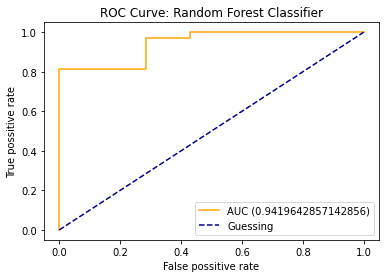

In [ ]:
y_prob = rs_clf.predict_proba(x_test)
y_prob_pos = y_prob[:, 1]
fpr, tpr, threshold = roc_curve(y_test, y_prob_pos)
val = roc_auc_score(y_test, y_prob_pos)
plot_roc_curve(fpr,tpr, 'Random Forest Classifier', val)

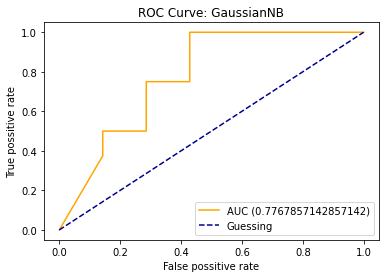

In [ ]:
y_prob = cv_gnb.predict_proba(x_test)
y_prob_pos = y_prob[:, 1]
fpr, tpr, threshold = roc_curve(y_test, y_prob_pos)
val = roc_auc_score(y_test, y_prob_pos)
plot_roc_curve(fpr,tpr, 'GaussianNB', val)

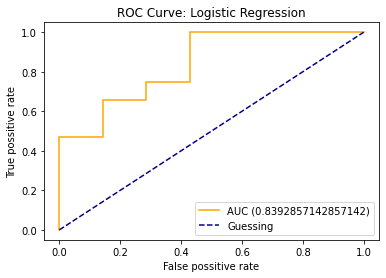

In [ ]:
y_prob = cv_lr.predict_proba(x_test)
y_prob_pos = y_prob[:, 1]
fpr, tpr, threshold = roc_curve(y_test, y_prob_pos)
val = roc_auc_score(y_test, y_prob_pos)
plot_roc_curve(fpr,tpr, 'Logistic Regression', val)

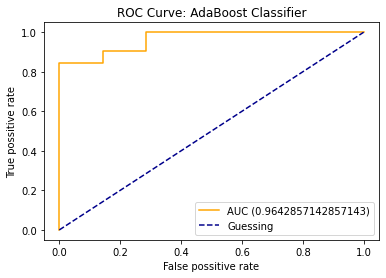

In [ ]:
y_prob = cv_ad.predict_proba(x_test)
y_prob_pos = y_prob[:, 1]
fpr, tpr, threshold = roc_curve(y_test, y_prob_pos)
val = roc_auc_score(y_test, y_prob_pos)
plot_roc_curve(fpr,tpr, 'AdaBoost Classifier', val)

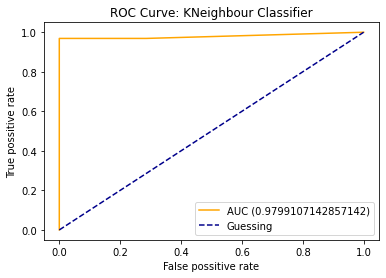

In [ ]:
y_prob = cv_kn.predict_proba(x_test)
y_prob_pos = y_prob[:, 1]
fpr, tpr, threshold = roc_curve(y_test, y_prob_pos)
val = roc_auc_score(y_test, y_prob_pos)
plot_roc_curve(fpr,tpr, 'KNeighbour Classifier', val)

Fitting 5 folds for each of 64 candidates, totalling 320 fits
[CV] C=400, dual=True, loss=squared_hinge, penalty=l1, tol=1e-05 .....
[CV]  C=400, dual=True, loss=squared_hinge, penalty=l1, tol=1e-05, total=   0.0s
[CV] C=400, dual=True, loss=squared_hinge, penalty=l1, tol=1e-05 .....
[CV]  C=400, dual=True, loss=squared_hinge, penalty=l1, tol=1e-05, total=   0.0s
[CV] C=400, dual=True, loss=squared_hinge, penalty=l1, tol=1e-05 .....
[CV]  C=400, dual=True, loss=squared_hinge, penalty=l1, tol=1e-05, total=   0.0s
[CV] C=400, dual=True, loss=squared_hinge, penalty=l1, tol=1e-05 .....
[CV]  C=400, dual=True, loss=squared_hinge, penalty=l1, tol=1e-05, total=   0.0s
[CV] C=400, dual=True, loss=squared_hinge, penalty=l1, tol=1e-05 .....
[CV]  C=400, dual=True, loss=squared_hinge, penalty=l1, tol=1e-05, total=   0.0s
[CV] C=400, dual=True, loss=squared_hinge, penalty=l1, tol=1e-07 .....
[CV]  C=400, dual=True, loss=squared_hinge, penalty=l1, tol=1e-07, total=   0.0s
[CV] C=400, dual=True, los

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Unsupported set of arguments: The combination of penalty='l1' and loss='squared_hinge' are not supported when dual=True, Parameters: penalty='l1', loss='squared_hinge', dual=True

  FitFailedWarning)
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Unsupported set of arguments: The combination of penalty='l1' and loss='squared_hinge' are not supported when dual=True, Parameters: penalty='l1', loss='squared_hinge', dual=True

  FitFail

[CV] C=400, dual=False, loss=squared_hinge, penalty=l1, tol=1e-05 ....
[CV]  C=400, dual=False, loss=squared_hinge, penalty=l1, tol=1e-05, total=   0.0s
[CV] C=400, dual=False, loss=squared_hinge, penalty=l1, tol=1e-05 ....
[CV]  C=400, dual=False, loss=squared_hinge, penalty=l1, tol=1e-05, total=   0.0s
[CV] C=400, dual=False, loss=squared_hinge, penalty=l1, tol=1e-05 ....
[CV]  C=400, dual=False, loss=squared_hinge, penalty=l1, tol=1e-05, total=   0.0s
[CV] C=400, dual=False, loss=squared_hinge, penalty=l1, tol=1e-05 ....
[CV]  C=400, dual=False, loss=squared_hinge, penalty=l1, tol=1e-05, total=   0.0s
[CV] C=400, dual=False, loss=squared_hinge, penalty=l1, tol=1e-05 ....
[CV]  C=400, dual=False, loss=squared_hinge, penalty=l1, tol=1e-05, total=   0.0s
[CV] C=400, dual=False, loss=squared_hinge, penalty=l1, tol=1e-07 ....
[CV]  C=400, dual=False, loss=squared_hinge, penalty=l1, tol=1e-07, total=   0.0s
[CV] C=400, dual=False, loss=squared_hinge, penalty=l1, tol=1e-07 ....
[CV]  C=400

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Unsupported set of arguments: The combination of penalty='l1' and loss='squared_hinge' are not supported when dual=True, Parameters: penalty='l1', loss='squared_hinge', dual=True

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Unsupported set of arguments: The combination of penalty='l1' and loss='squared_hinge' are not supported when dual=True, Parameters: penalty='l1', loss='squared_hinge', dual=True

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.


[CV]  C=450, dual=True, loss=squared_hinge, penalty=l1, tol=1e-07, total=   0.0s
[CV] C=450, dual=True, loss=squared_hinge, penalty=l1, tol=1e-07 .....
[CV]  C=450, dual=True, loss=squared_hinge, penalty=l1, tol=1e-07, total=   0.0s
[CV] C=450, dual=True, loss=squared_hinge, penalty=l2, tol=1e-05 .....
[CV]  C=450, dual=True, loss=squared_hinge, penalty=l2, tol=1e-05, total=   0.0s
[CV] C=450, dual=True, loss=squared_hinge, penalty=l2, tol=1e-05 .....
[CV]  C=450, dual=True, loss=squared_hinge, penalty=l2, tol=1e-05, total=   0.0s
[CV] C=450, dual=True, loss=squared_hinge, penalty=l2, tol=1e-05 .....
[CV]  C=450, dual=True, loss=squared_hinge, penalty=l2, tol=1e-05, total=   0.0s
[CV] C=450, dual=True, loss=squared_hinge, penalty=l2, tol=1e-05 .....
[CV]  C=450, dual=True, loss=squared_hinge, penalty=l2, tol=1e-05, total=   0.0s
[CV] C=450, dual=True, loss=squared_hinge, penalty=l2, tol=1e-05 .....
[CV]  C=450, dual=True, loss=squared_hinge, penalty=l2, tol=1e-05, total=   0.0s
[CV] C=

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarn

[CV]  C=450, dual=False, loss=squared_hinge, penalty=l1, tol=1e-05, total=   0.0s
[CV] C=450, dual=False, loss=squared_hinge, penalty=l1, tol=1e-05 ....
[CV]  C=450, dual=False, loss=squared_hinge, penalty=l1, tol=1e-05, total=   0.0s
[CV] C=450, dual=False, loss=squared_hinge, penalty=l1, tol=1e-07 ....
[CV]  C=450, dual=False, loss=squared_hinge, penalty=l1, tol=1e-07, total=   0.0s
[CV] C=450, dual=False, loss=squared_hinge, penalty=l1, tol=1e-07 ....
[CV]  C=450, dual=False, loss=squared_hinge, penalty=l1, tol=1e-07, total=   0.0s
[CV] C=450, dual=False, loss=squared_hinge, penalty=l1, tol=1e-07 ....
[CV]  C=450, dual=False, loss=squared_hinge, penalty=l1, tol=1e-07, total=   0.0s
[CV] C=450, dual=False, loss=squared_hinge, penalty=l1, tol=1e-07 ....
[CV]  C=450, dual=False, loss=squared_hinge, penalty=l1, tol=1e-07, total=   0.0s
[CV] C=450, dual=False, loss=squared_hinge, penalty=l1, tol=1e-07 ....
[CV]  C=450, dual=False, loss=squared_hinge, penalty=l1, tol=1e-07, total=   0.0s


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarn

[CV]  C=500, dual=False, loss=squared_hinge, penalty=l1, tol=1e-07, total=   0.0s
[CV] C=500, dual=False, loss=squared_hinge, penalty=l1, tol=1e-07 ....
[CV]  C=500, dual=False, loss=squared_hinge, penalty=l1, tol=1e-07, total=   0.0s
[CV] C=500, dual=False, loss=squared_hinge, penalty=l1, tol=1e-07 ....
[CV]  C=500, dual=False, loss=squared_hinge, penalty=l1, tol=1e-07, total=   0.0s
[CV] C=500, dual=False, loss=squared_hinge, penalty=l1, tol=1e-07 ....
[CV]  C=500, dual=False, loss=squared_hinge, penalty=l1, tol=1e-07, total=   0.0s
[CV] C=500, dual=False, loss=squared_hinge, penalty=l2, tol=1e-05 ....
[CV]  C=500, dual=False, loss=squared_hinge, penalty=l2, tol=1e-05, total=   0.0s
[CV] C=500, dual=False, loss=squared_hinge, penalty=l2, tol=1e-05 ....
[CV]  C=500, dual=False, loss=squared_hinge, penalty=l2, tol=1e-05, total=   0.0s
[CV] C=500, dual=False, loss=squared_hinge, penalty=l2, tol=1e-05 ....
[CV]  C=500, dual=False, loss=squared_hinge, penalty=l2, tol=1e-05, total=   0.0s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Unsupported set of arguments: The combination of penalty='l1' and loss='hinge' is not supported, Parameters: penalty='l1', loss='hinge', dual=True

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Unsupported set of arguments: The combination of penalty='l1' and loss='hinge' is not supported, Parameters: penalty='l1', loss='hinge', dual=True

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
V

[CV]  C=550, dual=True, loss=hinge, penalty=l1, tol=1e-05, total=   0.0s
[CV] C=550, dual=True, loss=hinge, penalty=l1, tol=1e-05 .............
[CV]  C=550, dual=True, loss=hinge, penalty=l1, tol=1e-05, total=   0.0s
[CV] C=550, dual=True, loss=hinge, penalty=l1, tol=1e-05 .............
[CV]  C=550, dual=True, loss=hinge, penalty=l1, tol=1e-05, total=   0.0s
[CV] C=550, dual=True, loss=hinge, penalty=l1, tol=1e-05 .............
[CV]  C=550, dual=True, loss=hinge, penalty=l1, tol=1e-05, total=   0.0s
[CV] C=550, dual=True, loss=hinge, penalty=l1, tol=1e-05 .............
[CV]  C=550, dual=True, loss=hinge, penalty=l1, tol=1e-05, total=   0.0s
[CV] C=550, dual=True, loss=hinge, penalty=l1, tol=1e-07 .............
[CV]  C=550, dual=True, loss=hinge, penalty=l1, tol=1e-07, total=   0.0s
[CV] C=550, dual=True, loss=hinge, penalty=l1, tol=1e-07 .............
[CV]  C=550, dual=True, loss=hinge, penalty=l1, tol=1e-07, total=   0.0s
[CV] C=550, dual=True, loss=hinge, penalty=l1, tol=1e-07 ......

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Unsupported set of arguments: The combination of penalty='l1' and loss='hinge' is not supported, Parameters: penalty='l1', loss='hinge', dual=False

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Unsupported set of arguments: The combination of penalty='l1' and loss='hinge' is not supported, Parameters: penalty='l1', loss='hinge', dual=False

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 

[CV]  C=400, dual=True, loss=hinge, penalty=l1, tol=1e-05, total=   0.0s
[CV] C=400, dual=True, loss=hinge, penalty=l1, tol=1e-07 .............
[CV]  C=400, dual=True, loss=hinge, penalty=l1, tol=1e-07, total=   0.0s
[CV] C=400, dual=True, loss=hinge, penalty=l1, tol=1e-07 .............
[CV]  C=400, dual=True, loss=hinge, penalty=l1, tol=1e-07, total=   0.0s
[CV] C=400, dual=True, loss=hinge, penalty=l1, tol=1e-07 .............
[CV]  C=400, dual=True, loss=hinge, penalty=l1, tol=1e-07, total=   0.0s
[CV] C=400, dual=True, loss=hinge, penalty=l1, tol=1e-07 .............
[CV]  C=400, dual=True, loss=hinge, penalty=l1, tol=1e-07, total=   0.0s
[CV] C=400, dual=True, loss=hinge, penalty=l1, tol=1e-07 .............
[CV]  C=400, dual=True, loss=hinge, penalty=l1, tol=1e-07, total=   0.0s
[CV] C=400, dual=True, loss=hinge, penalty=l2, tol=1e-05 .............
[CV]  C=400, dual=True, loss=hinge, penalty=l2, tol=1e-05, total=   0.0s
[CV] C=400, dual=True, loss=hinge, penalty=l2, tol=1e-05 ......

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarn

[CV]  C=400, dual=False, loss=squared_hinge, penalty=l1, tol=1e-07, total=   0.0s
[CV] C=400, dual=False, loss=squared_hinge, penalty=l2, tol=1e-05 ....
[CV]  C=400, dual=False, loss=squared_hinge, penalty=l2, tol=1e-05, total=   0.0s
[CV] C=400, dual=False, loss=squared_hinge, penalty=l2, tol=1e-05 ....
[CV]  C=400, dual=False, loss=squared_hinge, penalty=l2, tol=1e-05, total=   0.0s
[CV] C=400, dual=False, loss=squared_hinge, penalty=l2, tol=1e-05 ....
[CV]  C=400, dual=False, loss=squared_hinge, penalty=l2, tol=1e-05, total=   0.0s
[CV] C=400, dual=False, loss=squared_hinge, penalty=l2, tol=1e-05 ....
[CV]  C=400, dual=False, loss=squared_hinge, penalty=l2, tol=1e-05, total=   0.0s
[CV] C=400, dual=False, loss=squared_hinge, penalty=l2, tol=1e-05 ....
[CV]  C=400, dual=False, loss=squared_hinge, penalty=l2, tol=1e-05, total=   0.0s
[CV] C=400, dual=False, loss=squared_hinge, penalty=l2, tol=1e-07 ....
[CV]  C=400, dual=False, loss=squared_hinge, penalty=l2, tol=1e-07, total=   0.0s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Unsupported set of arguments: The combination of penalty='l1' and loss='hinge' is not supported, Parameters: penalty='l1', loss='hinge', dual=False

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Unsupported set of arguments: The combination of penalty='l1' and loss='hinge' is not supported, Parameters: penalty='l1', loss='hinge', dual=False

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 

[CV]  C=450, dual=True, loss=hinge, penalty=l1, tol=1e-05, total=   0.0s
[CV] C=450, dual=True, loss=hinge, penalty=l1, tol=1e-05 .............
[CV]  C=450, dual=True, loss=hinge, penalty=l1, tol=1e-05, total=   0.0s
[CV] C=450, dual=True, loss=hinge, penalty=l1, tol=1e-05 .............
[CV]  C=450, dual=True, loss=hinge, penalty=l1, tol=1e-05, total=   0.0s
[CV] C=450, dual=True, loss=hinge, penalty=l1, tol=1e-05 .............
[CV]  C=450, dual=True, loss=hinge, penalty=l1, tol=1e-05, total=   0.0s
[CV] C=450, dual=True, loss=hinge, penalty=l1, tol=1e-07 .............
[CV]  C=450, dual=True, loss=hinge, penalty=l1, tol=1e-07, total=   0.0s
[CV] C=450, dual=True, loss=hinge, penalty=l1, tol=1e-07 .............
[CV]  C=450, dual=True, loss=hinge, penalty=l1, tol=1e-07, total=   0.0s
[CV] C=450, dual=True, loss=hinge, penalty=l1, tol=1e-07 .............
[CV]  C=450, dual=True, loss=hinge, penalty=l1, tol=1e-07, total=   0.0s
[CV] C=450, dual=True, loss=hinge, penalty=l1, tol=1e-07 ......

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarn

[CV]  C=450, dual=False, loss=squared_hinge, penalty=l1, tol=1e-07, total=   0.0s
[CV] C=450, dual=False, loss=squared_hinge, penalty=l1, tol=1e-07 ....
[CV]  C=450, dual=False, loss=squared_hinge, penalty=l1, tol=1e-07, total=   0.0s
[CV] C=450, dual=False, loss=squared_hinge, penalty=l2, tol=1e-05 ....
[CV]  C=450, dual=False, loss=squared_hinge, penalty=l2, tol=1e-05, total=   0.0s
[CV] C=450, dual=False, loss=squared_hinge, penalty=l2, tol=1e-05 ....
[CV]  C=450, dual=False, loss=squared_hinge, penalty=l2, tol=1e-05, total=   0.0s
[CV] C=450, dual=False, loss=squared_hinge, penalty=l2, tol=1e-05 ....
[CV]  C=450, dual=False, loss=squared_hinge, penalty=l2, tol=1e-05, total=   0.0s
[CV] C=450, dual=False, loss=squared_hinge, penalty=l2, tol=1e-05 ....
[CV]  C=450, dual=False, loss=squared_hinge, penalty=l2, tol=1e-05, total=   0.0s
[CV] C=450, dual=False, loss=squared_hinge, penalty=l2, tol=1e-05 ....
[CV]  C=450, dual=False, loss=squared_hinge, penalty=l2, tol=1e-05, total=   0.0s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Unsupported set of arguments: The combination of penalty='l1' and loss='hinge' is not supported, Parameters: penalty='l1', loss='hinge', dual=False

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Unsupported set of arguments: The combination of penalty='l1' and loss='hinge' is not supported, Parameters: penalty='l1', loss='hinge', dual=False

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 

[CV]  C=500, dual=True, loss=squared_hinge, penalty=l2, tol=1e-07, total=   0.0s
[CV] C=500, dual=True, loss=squared_hinge, penalty=l2, tol=1e-07 .....
[CV]  C=500, dual=True, loss=squared_hinge, penalty=l2, tol=1e-07, total=   0.0s
[CV] C=500, dual=True, loss=squared_hinge, penalty=l2, tol=1e-07 .....
[CV]  C=500, dual=True, loss=squared_hinge, penalty=l2, tol=1e-07, total=   0.0s
[CV] C=500, dual=True, loss=hinge, penalty=l1, tol=1e-05 .............
[CV]  C=500, dual=True, loss=hinge, penalty=l1, tol=1e-05, total=   0.0s
[CV] C=500, dual=True, loss=hinge, penalty=l1, tol=1e-05 .............
[CV]  C=500, dual=True, loss=hinge, penalty=l1, tol=1e-05, total=   0.0s
[CV] C=500, dual=True, loss=hinge, penalty=l1, tol=1e-05 .............
[CV]  C=500, dual=True, loss=hinge, penalty=l1, tol=1e-05, total=   0.0s
[CV] C=500, dual=True, loss=hinge, penalty=l1, tol=1e-05 .............
[CV]  C=500, dual=True, loss=hinge, penalty=l1, tol=1e-05, total=   0.0s
[CV] C=500, dual=True, loss=hinge, pena

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarn

[CV]  C=500, dual=False, loss=squared_hinge, penalty=l1, tol=1e-07, total=   0.0s
[CV] C=500, dual=False, loss=squared_hinge, penalty=l1, tol=1e-07 ....
[CV]  C=500, dual=False, loss=squared_hinge, penalty=l1, tol=1e-07, total=   0.0s
[CV] C=500, dual=False, loss=squared_hinge, penalty=l2, tol=1e-05 ....
[CV]  C=500, dual=False, loss=squared_hinge, penalty=l2, tol=1e-05, total=   0.0s
[CV] C=500, dual=False, loss=squared_hinge, penalty=l2, tol=1e-05 ....
[CV]  C=500, dual=False, loss=squared_hinge, penalty=l2, tol=1e-05, total=   0.0s
[CV] C=500, dual=False, loss=squared_hinge, penalty=l2, tol=1e-05 ....
[CV]  C=500, dual=False, loss=squared_hinge, penalty=l2, tol=1e-05, total=   0.0s
[CV] C=500, dual=False, loss=squared_hinge, penalty=l2, tol=1e-05 ....
[CV]  C=500, dual=False, loss=squared_hinge, penalty=l2, tol=1e-05, total=   0.0s
[CV] C=500, dual=False, loss=squared_hinge, penalty=l2, tol=1e-05 ....
[CV]  C=500, dual=False, loss=squared_hinge, penalty=l2, tol=1e-05, total=   0.0s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Unsupported set of arguments: The combination of penalty='l1' and loss='hinge' is not supported, Parameters: penalty='l1', loss='hinge', dual=False

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Unsupported set of arguments: The combination of penalty='l1' and loss='hinge' is not supported, Parameters: penalty='l1', loss='hinge', dual=False

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 

[CV]  C=550, dual=True, loss=squared_hinge, penalty=l2, tol=1e-07, total=   0.0s
[CV] C=550, dual=True, loss=hinge, penalty=l1, tol=1e-05 .............
[CV]  C=550, dual=True, loss=hinge, penalty=l1, tol=1e-05, total=   0.0s
[CV] C=550, dual=True, loss=hinge, penalty=l1, tol=1e-05 .............
[CV]  C=550, dual=True, loss=hinge, penalty=l1, tol=1e-05, total=   0.0s
[CV] C=550, dual=True, loss=hinge, penalty=l1, tol=1e-05 .............
[CV]  C=550, dual=True, loss=hinge, penalty=l1, tol=1e-05, total=   0.0s
[CV] C=550, dual=True, loss=hinge, penalty=l1, tol=1e-05 .............
[CV]  C=550, dual=True, loss=hinge, penalty=l1, tol=1e-05, total=   0.0s
[CV] C=550, dual=True, loss=hinge, penalty=l1, tol=1e-05 .............
[CV]  C=550, dual=True, loss=hinge, penalty=l1, tol=1e-05, total=   0.0s
[CV] C=550, dual=True, loss=hinge, penalty=l1, tol=1e-07 .............
[CV]  C=550, dual=True, loss=hinge, penalty=l1, tol=1e-07, total=   0.0s
[CV] C=550, dual=True, loss=hinge, penalty=l1, tol=1e-0

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarn

[CV]  C=550, dual=False, loss=squared_hinge, penalty=l1, tol=1e-07, total=   0.0s
[CV] C=550, dual=False, loss=squared_hinge, penalty=l1, tol=1e-07 ....
[CV]  C=550, dual=False, loss=squared_hinge, penalty=l1, tol=1e-07, total=   0.0s
[CV] C=550, dual=False, loss=squared_hinge, penalty=l2, tol=1e-05 ....
[CV]  C=550, dual=False, loss=squared_hinge, penalty=l2, tol=1e-05, total=   0.0s
[CV] C=550, dual=False, loss=squared_hinge, penalty=l2, tol=1e-05 ....
[CV]  C=550, dual=False, loss=squared_hinge, penalty=l2, tol=1e-05, total=   0.0s
[CV] C=550, dual=False, loss=squared_hinge, penalty=l2, tol=1e-05 ....
[CV]  C=550, dual=False, loss=squared_hinge, penalty=l2, tol=1e-05, total=   0.0s
[CV] C=550, dual=False, loss=squared_hinge, penalty=l2, tol=1e-05 ....
[CV]  C=550, dual=False, loss=squared_hinge, penalty=l2, tol=1e-05, total=   0.0s
[CV] C=550, dual=False, loss=squared_hinge, penalty=l2, tol=1e-05 ....
[CV]  C=550, dual=False, loss=squared_hinge, penalty=l2, tol=1e-05, total=   0.0s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Unsupported set of arguments: The combination of penalty='l1' and loss='hinge' is not supported, Parameters: penalty='l1', loss='hinge', dual=False

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Unsupported set of arguments: The combination of penalty='l1' and loss='hinge' is not supported, Parameters: penalty='l1', loss='hinge', dual=False

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 

[CV]  C=400, dual=True, loss=squared_hinge, penalty=l2, tol=1e-07, total=   0.0s
[CV] C=400, dual=True, loss=squared_hinge, penalty=l2, tol=1e-07 .....
[CV]  C=400, dual=True, loss=squared_hinge, penalty=l2, tol=1e-07, total=   0.0s
[CV] C=400, dual=True, loss=squared_hinge, penalty=l2, tol=1e-07 .....
[CV]  C=400, dual=True, loss=squared_hinge, penalty=l2, tol=1e-07, total=   0.0s
[CV] C=400, dual=True, loss=hinge, penalty=l1, tol=1e-05 .............
[CV]  C=400, dual=True, loss=hinge, penalty=l1, tol=1e-05, total=   0.0s
[CV] C=400, dual=True, loss=hinge, penalty=l1, tol=1e-05 .............
[CV]  C=400, dual=True, loss=hinge, penalty=l1, tol=1e-05, total=   0.0s
[CV] C=400, dual=True, loss=hinge, penalty=l1, tol=1e-05 .............
[CV]  C=400, dual=True, loss=hinge, penalty=l1, tol=1e-05, total=   0.0s
[CV] C=400, dual=True, loss=hinge, penalty=l1, tol=1e-05 .............
[CV]  C=400, dual=True, loss=hinge, penalty=l1, tol=1e-05, total=   0.0s
[CV] C=400, dual=True, loss=hinge, pena

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarn

[CV]  C=400, dual=False, loss=squared_hinge, penalty=l1, tol=1e-07, total=   0.0s
[CV] C=400, dual=False, loss=squared_hinge, penalty=l2, tol=1e-05 ....
[CV]  C=400, dual=False, loss=squared_hinge, penalty=l2, tol=1e-05, total=   0.0s
[CV] C=400, dual=False, loss=squared_hinge, penalty=l2, tol=1e-05 ....
[CV]  C=400, dual=False, loss=squared_hinge, penalty=l2, tol=1e-05, total=   0.0s
[CV] C=400, dual=False, loss=squared_hinge, penalty=l2, tol=1e-05 ....
[CV]  C=400, dual=False, loss=squared_hinge, penalty=l2, tol=1e-05, total=   0.0s
[CV] C=400, dual=False, loss=squared_hinge, penalty=l2, tol=1e-05 ....
[CV]  C=400, dual=False, loss=squared_hinge, penalty=l2, tol=1e-05, total=   0.0s
[CV] C=400, dual=False, loss=squared_hinge, penalty=l2, tol=1e-05 ....
[CV]  C=400, dual=False, loss=squared_hinge, penalty=l2, tol=1e-05, total=   0.0s
[CV] C=400, dual=False, loss=squared_hinge, penalty=l2, tol=1e-07 ....
[CV]  C=400, dual=False, loss=squared_hinge, penalty=l2, tol=1e-07, total=   0.0s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Unsupported set of arguments: The combination of penalty='l1' and loss='hinge' is not supported, Parameters: penalty='l1', loss='hinge', dual=False

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Unsupported set of arguments: The combination of penalty='l1' and loss='hinge' is not supported, Parameters: penalty='l1', loss='hinge', dual=False

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 

[CV]  C=450, dual=True, loss=hinge, penalty=l1, tol=1e-07, total=   0.0s
[CV] C=450, dual=True, loss=hinge, penalty=l2, tol=1e-05 .............
[CV]  C=450, dual=True, loss=hinge, penalty=l2, tol=1e-05, total=   0.0s
[CV] C=450, dual=True, loss=hinge, penalty=l2, tol=1e-05 .............
[CV]  C=450, dual=True, loss=hinge, penalty=l2, tol=1e-05, total=   0.0s
[CV] C=450, dual=True, loss=hinge, penalty=l2, tol=1e-05 .............
[CV]  C=450, dual=True, loss=hinge, penalty=l2, tol=1e-05, total=   0.0s
[CV] C=450, dual=True, loss=hinge, penalty=l2, tol=1e-05 .............
[CV]  C=450, dual=True, loss=hinge, penalty=l2, tol=1e-05, total=   0.0s
[CV] C=450, dual=True, loss=hinge, penalty=l2, tol=1e-05 .............
[CV]  C=450, dual=True, loss=hinge, penalty=l2, tol=1e-05, total=   0.0s
[CV] C=450, dual=True, loss=hinge, penalty=l2, tol=1e-07 .............
[CV]  C=450, dual=True, loss=hinge, penalty=l2, tol=1e-07, total=   0.0s
[CV] C=450, dual=True, loss=hinge, penalty=l2, tol=1e-07 ......

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarn

[CV]  C=450, dual=False, loss=squared_hinge, penalty=l2, tol=1e-07, total=   0.0s
[CV] C=450, dual=False, loss=squared_hinge, penalty=l2, tol=1e-07 ....
[CV]  C=450, dual=False, loss=squared_hinge, penalty=l2, tol=1e-07, total=   0.0s
[CV] C=450, dual=False, loss=squared_hinge, penalty=l2, tol=1e-07 ....
[CV]  C=450, dual=False, loss=squared_hinge, penalty=l2, tol=1e-07, total=   0.0s
[CV] C=450, dual=False, loss=squared_hinge, penalty=l2, tol=1e-07 ....
[CV]  C=450, dual=False, loss=squared_hinge, penalty=l2, tol=1e-07, total=   0.0s
[CV] C=450, dual=False, loss=squared_hinge, penalty=l2, tol=1e-07 ....
[CV]  C=450, dual=False, loss=squared_hinge, penalty=l2, tol=1e-07, total=   0.0s
[CV] C=450, dual=False, loss=hinge, penalty=l1, tol=1e-05 ............
[CV]  C=450, dual=False, loss=hinge, penalty=l1, tol=1e-05, total=   0.0s
[CV] C=450, dual=False, loss=hinge, penalty=l1, tol=1e-05 ............
[CV]  C=450, dual=False, loss=hinge, penalty=l1, tol=1e-05, total=   0.0s
[CV] C=450, dual

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Unsupported set of arguments: The combination of penalty='l1' and loss='squared_hinge' are not supported when dual=True, Parameters: penalty='l1', loss='squared_hinge', dual=True

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Unsupported set of arguments: The combination of penalty='l1' and loss='squared_hinge' are not supported when dual=True, Parameters: penalty='l1', loss='squared_hinge', dual=True

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-tes

[CV]  C=500, dual=True, loss=hinge, penalty=l2, tol=1e-05, total=   0.0s
[CV] C=500, dual=True, loss=hinge, penalty=l2, tol=1e-05 .............
[CV]  C=500, dual=True, loss=hinge, penalty=l2, tol=1e-05, total=   0.0s
[CV] C=500, dual=True, loss=hinge, penalty=l2, tol=1e-05 .............
[CV]  C=500, dual=True, loss=hinge, penalty=l2, tol=1e-05, total=   0.0s
[CV] C=500, dual=True, loss=hinge, penalty=l2, tol=1e-07 .............
[CV]  C=500, dual=True, loss=hinge, penalty=l2, tol=1e-07, total=   0.0s
[CV] C=500, dual=True, loss=hinge, penalty=l2, tol=1e-07 .............
[CV]  C=500, dual=True, loss=hinge, penalty=l2, tol=1e-07, total=   0.0s
[CV] C=500, dual=True, loss=hinge, penalty=l2, tol=1e-07 .............
[CV]  C=500, dual=True, loss=hinge, penalty=l2, tol=1e-07, total=   0.0s
[CV] C=500, dual=True, loss=hinge, penalty=l2, tol=1e-07 .............
[CV]  C=500, dual=True, loss=hinge, penalty=l2, tol=1e-07, total=   0.0s
[CV] C=500, dual=True, loss=hinge, penalty=l2, tol=1e-07 ......

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarn

[CV]  C=500, dual=False, loss=hinge, penalty=l1, tol=1e-05, total=   0.0s
[CV] C=500, dual=False, loss=hinge, penalty=l1, tol=1e-07 ............
[CV]  C=500, dual=False, loss=hinge, penalty=l1, tol=1e-07, total=   0.0s
[CV] C=500, dual=False, loss=hinge, penalty=l1, tol=1e-07 ............
[CV]  C=500, dual=False, loss=hinge, penalty=l1, tol=1e-07, total=   0.0s
[CV] C=500, dual=False, loss=hinge, penalty=l1, tol=1e-07 ............
[CV]  C=500, dual=False, loss=hinge, penalty=l1, tol=1e-07, total=   0.0s
[CV] C=500, dual=False, loss=hinge, penalty=l1, tol=1e-07 ............
[CV]  C=500, dual=False, loss=hinge, penalty=l1, tol=1e-07, total=   0.0s
[CV] C=500, dual=False, loss=hinge, penalty=l1, tol=1e-07 ............
[CV]  C=500, dual=False, loss=hinge, penalty=l1, tol=1e-07, total=   0.0s
[CV] C=500, dual=False, loss=hinge, penalty=l2, tol=1e-05 ............
[CV]  C=500, dual=False, loss=hinge, penalty=l2, tol=1e-05, total=   0.0s
[CV] C=500, dual=False, loss=hinge, penalty=l2, tol=1e-0

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarn

[CV]  C=550, dual=True, loss=hinge, penalty=l2, tol=1e-05, total=   0.0s
[CV] C=550, dual=True, loss=hinge, penalty=l2, tol=1e-05 .............
[CV]  C=550, dual=True, loss=hinge, penalty=l2, tol=1e-05, total=   0.0s
[CV] C=550, dual=True, loss=hinge, penalty=l2, tol=1e-07 .............
[CV]  C=550, dual=True, loss=hinge, penalty=l2, tol=1e-07, total=   0.0s
[CV] C=550, dual=True, loss=hinge, penalty=l2, tol=1e-07 .............
[CV]  C=550, dual=True, loss=hinge, penalty=l2, tol=1e-07, total=   0.0s
[CV] C=550, dual=True, loss=hinge, penalty=l2, tol=1e-07 .............
[CV]  C=550, dual=True, loss=hinge, penalty=l2, tol=1e-07, total=   0.0s
[CV] C=550, dual=True, loss=hinge, penalty=l2, tol=1e-07 .............
[CV]  C=550, dual=True, loss=hinge, penalty=l2, tol=1e-07, total=   0.0s
[CV] C=550, dual=True, loss=hinge, penalty=l2, tol=1e-07 .............
[CV]  C=550, dual=True, loss=hinge, penalty=l2, tol=1e-07, total=   0.0s
[CV] C=550, dual=False, loss=squared_hinge, penalty=l1, tol=1e-

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarn

[CV]  C=550, dual=False, loss=hinge, penalty=l2, tol=1e-05, total=   0.0s
[CV] C=550, dual=False, loss=hinge, penalty=l2, tol=1e-05 ............
[CV]  C=550, dual=False, loss=hinge, penalty=l2, tol=1e-05, total=   0.0s
[CV] C=550, dual=False, loss=hinge, penalty=l2, tol=1e-05 ............
[CV]  C=550, dual=False, loss=hinge, penalty=l2, tol=1e-05, total=   0.0s
[CV] C=550, dual=False, loss=hinge, penalty=l2, tol=1e-05 ............
[CV]  C=550, dual=False, loss=hinge, penalty=l2, tol=1e-05, total=   0.0s
[CV] C=550, dual=False, loss=hinge, penalty=l2, tol=1e-07 ............
[CV]  C=550, dual=False, loss=hinge, penalty=l2, tol=1e-07, total=   0.0s
[CV] C=550, dual=False, loss=hinge, penalty=l2, tol=1e-07 ............
[CV]  C=550, dual=False, loss=hinge, penalty=l2, tol=1e-07, total=   0.0s
[CV] C=550, dual=False, loss=hinge, penalty=l2, tol=1e-07 ............
[CV]  C=550, dual=False, loss=hinge, penalty=l2, tol=1e-07, total=   0.0s
[CV] C=550, dual=False, loss=hinge, penalty=l2, tol=1e-0

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarn

[CV]  C=400, dual=True, loss=hinge, penalty=l2, tol=1e-07, total=   0.0s
[CV] C=400, dual=True, loss=hinge, penalty=l2, tol=1e-07 .............
[CV]  C=400, dual=True, loss=hinge, penalty=l2, tol=1e-07, total=   0.0s
[CV] C=400, dual=True, loss=hinge, penalty=l2, tol=1e-07 .............
[CV]  C=400, dual=True, loss=hinge, penalty=l2, tol=1e-07, total=   0.0s
[CV] C=400, dual=True, loss=hinge, penalty=l2, tol=1e-07 .............
[CV]  C=400, dual=True, loss=hinge, penalty=l2, tol=1e-07, total=   0.0s
[CV] C=400, dual=False, loss=squared_hinge, penalty=l1, tol=1e-05 ....
[CV]  C=400, dual=False, loss=squared_hinge, penalty=l1, tol=1e-05, total=   0.0s
[CV] C=400, dual=False, loss=squared_hinge, penalty=l1, tol=1e-05 ....
[CV]  C=400, dual=False, loss=squared_hinge, penalty=l1, tol=1e-05, total=   0.0s
[CV] C=400, dual=False, loss=squared_hinge, penalty=l1, tol=1e-05 ....
[CV]  C=400, dual=False, loss=squared_hinge, penalty=l1, tol=1e-05, total=   0.0s
[CV] C=400, dual=False, loss=squared

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarn

[CV]  C=400, dual=False, loss=hinge, penalty=l1, tol=1e-05, total=   0.0s
[CV] C=400, dual=False, loss=hinge, penalty=l1, tol=1e-05 ............
[CV]  C=400, dual=False, loss=hinge, penalty=l1, tol=1e-05, total=   0.0s
[CV] C=400, dual=False, loss=hinge, penalty=l1, tol=1e-05 ............
[CV]  C=400, dual=False, loss=hinge, penalty=l1, tol=1e-05, total=   0.0s
[CV] C=400, dual=False, loss=hinge, penalty=l1, tol=1e-05 ............
[CV]  C=400, dual=False, loss=hinge, penalty=l1, tol=1e-05, total=   0.0s
[CV] C=400, dual=False, loss=hinge, penalty=l1, tol=1e-05 ............
[CV]  C=400, dual=False, loss=hinge, penalty=l1, tol=1e-05, total=   0.0s
[CV] C=400, dual=False, loss=hinge, penalty=l1, tol=1e-07 ............
[CV]  C=400, dual=False, loss=hinge, penalty=l1, tol=1e-07, total=   0.0s
[CV] C=400, dual=False, loss=hinge, penalty=l1, tol=1e-07 ............
[CV]  C=400, dual=False, loss=hinge, penalty=l1, tol=1e-07, total=   0.0s
[CV] C=400, dual=False, loss=hinge, penalty=l1, tol=1e-0

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Unsupported set of arguments: The combination of penalty='l1' and loss='squared_hinge' are not supported when dual=True, Parameters: penalty='l1', loss='squared_hinge', dual=True

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Unsupported set of arguments: The combination of penalty='l1' and loss='squared_hinge' are not supported when dual=True, Parameters: penalty='l1', loss='squared_hinge', dual=True

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-tes

[CV]  C=450, dual=True, loss=hinge, penalty=l2, tol=1e-07, total=   0.0s
[CV] C=450, dual=True, loss=hinge, penalty=l2, tol=1e-07 .............
[CV]  C=450, dual=True, loss=hinge, penalty=l2, tol=1e-07, total=   0.0s
[CV] C=450, dual=True, loss=hinge, penalty=l2, tol=1e-07 .............
[CV]  C=450, dual=True, loss=hinge, penalty=l2, tol=1e-07, total=   0.0s
[CV] C=450, dual=True, loss=hinge, penalty=l2, tol=1e-07 .............
[CV]  C=450, dual=True, loss=hinge, penalty=l2, tol=1e-07, total=   0.0s
[CV] C=450, dual=True, loss=hinge, penalty=l2, tol=1e-07 .............
[CV]  C=450, dual=True, loss=hinge, penalty=l2, tol=1e-07, total=   0.0s
[CV] C=450, dual=False, loss=squared_hinge, penalty=l1, tol=1e-05 ....
[CV]  C=450, dual=False, loss=squared_hinge, penalty=l1, tol=1e-05, total=   0.0s
[CV] C=450, dual=False, loss=squared_hinge, penalty=l1, tol=1e-05 ....
[CV]  C=450, dual=False, loss=squared_hinge, penalty=l1, tol=1e-05, total=   0.0s
[CV] C=450, dual=False, loss=squared_hinge, p

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarn

[CV]  C=450, dual=False, loss=hinge, penalty=l1, tol=1e-07, total=   0.0s
[CV] C=450, dual=False, loss=hinge, penalty=l1, tol=1e-07 ............
[CV]  C=450, dual=False, loss=hinge, penalty=l1, tol=1e-07, total=   0.0s
[CV] C=450, dual=False, loss=hinge, penalty=l1, tol=1e-07 ............
[CV]  C=450, dual=False, loss=hinge, penalty=l1, tol=1e-07, total=   0.0s
[CV] C=450, dual=False, loss=hinge, penalty=l2, tol=1e-05 ............
[CV]  C=450, dual=False, loss=hinge, penalty=l2, tol=1e-05, total=   0.0s
[CV] C=450, dual=False, loss=hinge, penalty=l2, tol=1e-05 ............
[CV]  C=450, dual=False, loss=hinge, penalty=l2, tol=1e-05, total=   0.0s
[CV] C=450, dual=False, loss=hinge, penalty=l2, tol=1e-05 ............
[CV]  C=450, dual=False, loss=hinge, penalty=l2, tol=1e-05, total=   0.0s
[CV] C=450, dual=False, loss=hinge, penalty=l2, tol=1e-05 ............
[CV]  C=450, dual=False, loss=hinge, penalty=l2, tol=1e-05, total=   0.0s
[CV] C=450, dual=False, loss=hinge, penalty=l2, tol=1e-0

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarn

[CV] C=500, dual=False, loss=squared_hinge, penalty=l1, tol=1e-05 ....
[CV]  C=500, dual=False, loss=squared_hinge, penalty=l1, tol=1e-05, total=   0.0s
[CV] C=500, dual=False, loss=squared_hinge, penalty=l1, tol=1e-05 ....
[CV]  C=500, dual=False, loss=squared_hinge, penalty=l1, tol=1e-05, total=   0.0s
[CV] C=500, dual=False, loss=squared_hinge, penalty=l1, tol=1e-05 ....
[CV]  C=500, dual=False, loss=squared_hinge, penalty=l1, tol=1e-05, total=   0.0s
[CV] C=500, dual=False, loss=squared_hinge, penalty=l1, tol=1e-05 ....
[CV]  C=500, dual=False, loss=squared_hinge, penalty=l1, tol=1e-05, total=   0.0s
[CV] C=500, dual=False, loss=squared_hinge, penalty=l1, tol=1e-05 ....
[CV]  C=500, dual=False, loss=squared_hinge, penalty=l1, tol=1e-05, total=   0.0s
[CV] C=500, dual=False, loss=squared_hinge, penalty=l1, tol=1e-07 ....
[CV]  C=500, dual=False, loss=squared_hinge, penalty=l1, tol=1e-07, total=   0.0s
[CV] C=500, dual=False, loss=squared_hinge, penalty=l1, tol=1e-07 ....
[CV]  C=500

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarn

[CV]  C=550, dual=True, loss=squared_hinge, penalty=l1, tol=1e-05, total=   0.0s
[CV] C=550, dual=True, loss=squared_hinge, penalty=l1, tol=1e-05 .....
[CV]  C=550, dual=True, loss=squared_hinge, penalty=l1, tol=1e-05, total=   0.0s
[CV] C=550, dual=True, loss=squared_hinge, penalty=l1, tol=1e-05 .....
[CV]  C=550, dual=True, loss=squared_hinge, penalty=l1, tol=1e-05, total=   0.0s
[CV] C=550, dual=True, loss=squared_hinge, penalty=l1, tol=1e-07 .....
[CV]  C=550, dual=True, loss=squared_hinge, penalty=l1, tol=1e-07, total=   0.0s
[CV] C=550, dual=True, loss=squared_hinge, penalty=l1, tol=1e-07 .....
[CV]  C=550, dual=True, loss=squared_hinge, penalty=l1, tol=1e-07, total=   0.0s
[CV] C=550, dual=True, loss=squared_hinge, penalty=l1, tol=1e-07 .....
[CV]  C=550, dual=True, loss=squared_hinge, penalty=l1, tol=1e-07, total=   0.0s
[CV] C=550, dual=True, loss=squared_hinge, penalty=l1, tol=1e-07 .....
[CV]  C=550, dual=True, loss=squared_hinge, penalty=l1, tol=1e-07, total=   0.0s
[CV] C=

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Unsupported set of arguments: The combination of penalty='l1' and loss='hinge' is not supported, Parameters: penalty='l1', loss='hinge', dual=True

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. De

[CV]  C=550, dual=False, loss=squared_hinge, penalty=l1, tol=1e-05, total=   0.0s
[CV] C=550, dual=False, loss=squared_hinge, penalty=l1, tol=1e-05 ....
[CV]  C=550, dual=False, loss=squared_hinge, penalty=l1, tol=1e-05, total=   0.0s
[CV] C=550, dual=False, loss=squared_hinge, penalty=l1, tol=1e-05 ....
[CV]  C=550, dual=False, loss=squared_hinge, penalty=l1, tol=1e-05, total=   0.0s
[CV] C=550, dual=False, loss=squared_hinge, penalty=l1, tol=1e-05 ....
[CV]  C=550, dual=False, loss=squared_hinge, penalty=l1, tol=1e-05, total=   0.0s
[CV] C=550, dual=False, loss=squared_hinge, penalty=l1, tol=1e-07 ....
[CV]  C=550, dual=False, loss=squared_hinge, penalty=l1, tol=1e-07, total=   0.0s
[CV] C=550, dual=False, loss=squared_hinge, penalty=l1, tol=1e-07 ....
[CV]  C=550, dual=False, loss=squared_hinge, penalty=l1, tol=1e-07, total=   0.0s
[CV] C=550, dual=False, loss=squared_hinge, penalty=l1, tol=1e-07 ....
[CV]  C=550, dual=False, loss=squared_hinge, penalty=l1, tol=1e-07, total=   0.0s


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Unsupported set of arguments: The combination of penalty='l1' and loss='hinge' is not supported, Parameters: penalty='l1', loss='hinge', dual=False

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. D

[CV]  C=400, dual=True, loss=squared_hinge, penalty=l1, tol=1e-05, total=   0.0s
[CV] C=400, dual=True, loss=squared_hinge, penalty=l1, tol=1e-05 .....
[CV]  C=400, dual=True, loss=squared_hinge, penalty=l1, tol=1e-05, total=   0.0s
[CV] C=400, dual=True, loss=squared_hinge, penalty=l1, tol=1e-05 .....
[CV]  C=400, dual=True, loss=squared_hinge, penalty=l1, tol=1e-05, total=   0.0s
[CV] C=400, dual=True, loss=squared_hinge, penalty=l1, tol=1e-05 .....
[CV]  C=400, dual=True, loss=squared_hinge, penalty=l1, tol=1e-05, total=   0.0s
[CV] C=400, dual=True, loss=squared_hinge, penalty=l1, tol=1e-07 .....
[CV]  C=400, dual=True, loss=squared_hinge, penalty=l1, tol=1e-07, total=   0.0s
[CV] C=400, dual=True, loss=squared_hinge, penalty=l1, tol=1e-07 .....
[CV]  C=400, dual=True, loss=squared_hinge, penalty=l1, tol=1e-07, total=   0.0s
[CV] C=400, dual=True, loss=squared_hinge, penalty=l1, tol=1e-07 .....
[CV]  C=400, dual=True, loss=squared_hinge, penalty=l1, tol=1e-07, total=   0.0s
[CV] C=

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Unsupported set of arguments: The combination of penalty='l1' and loss='hinge' is not supported, Parameters: penalty='l1', loss='hinge', dual=True

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Unsupported set of arguments: The combination of penalty='l1' and loss='hinge' is not supported, Parameters: penalty='l1', loss='hinge', dual=True

  FitFailedWarning)
/usr/local/li

[CV]  C=400, dual=False, loss=squared_hinge, penalty=l1, tol=1e-05, total=   0.0s
[CV] C=400, dual=False, loss=squared_hinge, penalty=l1, tol=1e-05 ....
[CV]  C=400, dual=False, loss=squared_hinge, penalty=l1, tol=1e-05, total=   0.0s
[CV] C=400, dual=False, loss=squared_hinge, penalty=l1, tol=1e-07 ....
[CV]  C=400, dual=False, loss=squared_hinge, penalty=l1, tol=1e-07, total=   0.0s
[CV] C=400, dual=False, loss=squared_hinge, penalty=l1, tol=1e-07 ....
[CV]  C=400, dual=False, loss=squared_hinge, penalty=l1, tol=1e-07, total=   0.0s
[CV] C=400, dual=False, loss=squared_hinge, penalty=l1, tol=1e-07 ....
[CV]  C=400, dual=False, loss=squared_hinge, penalty=l1, tol=1e-07, total=   0.0s
[CV] C=400, dual=False, loss=squared_hinge, penalty=l1, tol=1e-07 ....
[CV]  C=400, dual=False, loss=squared_hinge, penalty=l1, tol=1e-07, total=   0.0s
[CV] C=400, dual=False, loss=squared_hinge, penalty=l1, tol=1e-07 ....
[CV]  C=400, dual=False, loss=squared_hinge, penalty=l1, tol=1e-07, total=   0.0s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Unsupported set of arguments: The combination of penalty='l1' and loss='hinge' is not supported, Parameters: penalty='l1', loss='hinge', dual=False

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Unsupported set of arguments: The combination of penalty='l1' and loss='hinge' is not supported, Parameters: penalty='l1', loss='hinge', dual=False

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 

[CV] C=450, dual=True, loss=squared_hinge, penalty=l2, tol=1e-05 .....
[CV]  C=450, dual=True, loss=squared_hinge, penalty=l2, tol=1e-05, total=   0.0s
[CV] C=450, dual=True, loss=squared_hinge, penalty=l2, tol=1e-05 .....
[CV]  C=450, dual=True, loss=squared_hinge, penalty=l2, tol=1e-05, total=   0.0s
[CV] C=450, dual=True, loss=squared_hinge, penalty=l2, tol=1e-07 .....
[CV]  C=450, dual=True, loss=squared_hinge, penalty=l2, tol=1e-07, total=   0.0s
[CV] C=450, dual=True, loss=squared_hinge, penalty=l2, tol=1e-07 .....
[CV]  C=450, dual=True, loss=squared_hinge, penalty=l2, tol=1e-07, total=   0.0s
[CV] C=450, dual=True, loss=squared_hinge, penalty=l2, tol=1e-07 .....
[CV]  C=450, dual=True, loss=squared_hinge, penalty=l2, tol=1e-07, total=   0.0s
[CV] C=450, dual=True, loss=squared_hinge, penalty=l2, tol=1e-07 .....
[CV]  C=450, dual=True, loss=squared_hinge, penalty=l2, tol=1e-07, total=   0.0s
[CV] C=450, dual=True, loss=squared_hinge, penalty=l2, tol=1e-07 .....
[CV]  C=450, dual

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarn

[CV]  C=450, dual=False, loss=squared_hinge, penalty=l1, tol=1e-05, total=   0.0s
[CV] C=450, dual=False, loss=squared_hinge, penalty=l1, tol=1e-07 ....
[CV]  C=450, dual=False, loss=squared_hinge, penalty=l1, tol=1e-07, total=   0.0s
[CV] C=450, dual=False, loss=squared_hinge, penalty=l1, tol=1e-07 ....
[CV]  C=450, dual=False, loss=squared_hinge, penalty=l1, tol=1e-07, total=   0.0s
[CV] C=450, dual=False, loss=squared_hinge, penalty=l1, tol=1e-07 ....
[CV]  C=450, dual=False, loss=squared_hinge, penalty=l1, tol=1e-07, total=   0.0s
[CV] C=450, dual=False, loss=squared_hinge, penalty=l1, tol=1e-07 ....
[CV]  C=450, dual=False, loss=squared_hinge, penalty=l1, tol=1e-07, total=   0.0s
[CV] C=450, dual=False, loss=squared_hinge, penalty=l1, tol=1e-07 ....
[CV]  C=450, dual=False, loss=squared_hinge, penalty=l1, tol=1e-07, total=   0.0s
[CV] C=450, dual=False, loss=squared_hinge, penalty=l2, tol=1e-05 ....
[CV]  C=450, dual=False, loss=squared_hinge, penalty=l2, tol=1e-05, total=   0.0s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Unsupported set of arguments: The combination of penalty='l1' and loss='hinge' is not supported, Parameters: penalty='l1', loss='hinge', dual=False

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Unsupported set of arguments: The combination of penalty='l1' and loss='hinge' is not supported, Parameters: penalty='l1', loss='hinge', dual=False

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 

[CV]  C=500, dual=True, loss=squared_hinge, penalty=l2, tol=1e-07, total=   0.0s
[CV] C=500, dual=True, loss=squared_hinge, penalty=l2, tol=1e-07 .....
[CV]  C=500, dual=True, loss=squared_hinge, penalty=l2, tol=1e-07, total=   0.0s
[CV] C=500, dual=True, loss=squared_hinge, penalty=l2, tol=1e-07 .....
[CV]  C=500, dual=True, loss=squared_hinge, penalty=l2, tol=1e-07, total=   0.0s
[CV] C=500, dual=True, loss=squared_hinge, penalty=l2, tol=1e-07 .....
[CV]  C=500, dual=True, loss=squared_hinge, penalty=l2, tol=1e-07, total=   0.0s
[CV] C=500, dual=True, loss=squared_hinge, penalty=l2, tol=1e-07 .....
[CV]  C=500, dual=True, loss=squared_hinge, penalty=l2, tol=1e-07, total=   0.0s
[CV] C=500, dual=True, loss=hinge, penalty=l1, tol=1e-05 .............
[CV]  C=500, dual=True, loss=hinge, penalty=l1, tol=1e-05, total=   0.0s
[CV] C=500, dual=True, loss=hinge, penalty=l1, tol=1e-05 .............
[CV]  C=500, dual=True, loss=hinge, penalty=l1, tol=1e-05, total=   0.0s
[CV] C=500, dual=True, 

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarn

[CV] C=500, dual=False, loss=squared_hinge, penalty=l1, tol=1e-07 ....
[CV]  C=500, dual=False, loss=squared_hinge, penalty=l1, tol=1e-07, total=   0.0s
[CV] C=500, dual=False, loss=squared_hinge, penalty=l1, tol=1e-07 ....
[CV]  C=500, dual=False, loss=squared_hinge, penalty=l1, tol=1e-07, total=   0.0s
[CV] C=500, dual=False, loss=squared_hinge, penalty=l2, tol=1e-05 ....
[CV]  C=500, dual=False, loss=squared_hinge, penalty=l2, tol=1e-05, total=   0.0s
[CV] C=500, dual=False, loss=squared_hinge, penalty=l2, tol=1e-05 ....
[CV]  C=500, dual=False, loss=squared_hinge, penalty=l2, tol=1e-05, total=   0.0s
[CV] C=500, dual=False, loss=squared_hinge, penalty=l2, tol=1e-05 ....
[CV]  C=500, dual=False, loss=squared_hinge, penalty=l2, tol=1e-05, total=   0.0s
[CV] C=500, dual=False, loss=squared_hinge, penalty=l2, tol=1e-05 ....
[CV]  C=500, dual=False, loss=squared_hinge, penalty=l2, tol=1e-05, total=   0.0s
[CV] C=500, dual=False, loss=squared_hinge, penalty=l2, tol=1e-05 ....
[CV]  C=500

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Unsupported set of arguments: The combination of penalty='l2' and loss='hinge' are not supported when dual=False, Parameters: penalty='l2', loss='hinge', dual=False

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Unsupported set of arguments: The combination of penalty='l2' and loss='hinge' are not supported when dual=False, Parameters: penalty='l2', loss='hinge', dual=False

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parame

[CV]  C=550, dual=True, loss=hinge, penalty=l1, tol=1e-05, total=   0.0s
[CV] C=550, dual=True, loss=hinge, penalty=l1, tol=1e-05 .............
[CV]  C=550, dual=True, loss=hinge, penalty=l1, tol=1e-05, total=   0.0s
[CV] C=550, dual=True, loss=hinge, penalty=l1, tol=1e-05 .............
[CV]  C=550, dual=True, loss=hinge, penalty=l1, tol=1e-05, total=   0.0s
[CV] C=550, dual=True, loss=hinge, penalty=l1, tol=1e-05 .............
[CV]  C=550, dual=True, loss=hinge, penalty=l1, tol=1e-05, total=   0.0s
[CV] C=550, dual=True, loss=hinge, penalty=l1, tol=1e-05 .............
[CV]  C=550, dual=True, loss=hinge, penalty=l1, tol=1e-05, total=   0.0s
[CV] C=550, dual=True, loss=hinge, penalty=l1, tol=1e-07 .............
[CV]  C=550, dual=True, loss=hinge, penalty=l1, tol=1e-07, total=   0.0s
[CV] C=550, dual=True, loss=hinge, penalty=l1, tol=1e-07 .............
[CV]  C=550, dual=True, loss=hinge, penalty=l1, tol=1e-07, total=   0.0s
[CV] C=550, dual=True, loss=hinge, penalty=l1, tol=1e-07 ......

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarn

[CV]  C=550, dual=False, loss=squared_hinge, penalty=l2, tol=1e-05, total=   0.0s
[CV] C=550, dual=False, loss=squared_hinge, penalty=l2, tol=1e-05 ....
[CV]  C=550, dual=False, loss=squared_hinge, penalty=l2, tol=1e-05, total=   0.0s
[CV] C=550, dual=False, loss=squared_hinge, penalty=l2, tol=1e-05 ....
[CV]  C=550, dual=False, loss=squared_hinge, penalty=l2, tol=1e-05, total=   0.0s
[CV] C=550, dual=False, loss=squared_hinge, penalty=l2, tol=1e-05 ....
[CV]  C=550, dual=False, loss=squared_hinge, penalty=l2, tol=1e-05, total=   0.0s
[CV] C=550, dual=False, loss=squared_hinge, penalty=l2, tol=1e-07 ....
[CV]  C=550, dual=False, loss=squared_hinge, penalty=l2, tol=1e-07, total=   0.0s
[CV] C=550, dual=False, loss=squared_hinge, penalty=l2, tol=1e-07 ....
[CV]  C=550, dual=False, loss=squared_hinge, penalty=l2, tol=1e-07, total=   0.0s
[CV] C=550, dual=False, loss=squared_hinge, penalty=l2, tol=1e-07 ....
[CV]  C=550, dual=False, loss=squared_hinge, penalty=l2, tol=1e-07, total=   0.0s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Unsupported set of arguments: The combination of penalty='l2' and loss='hinge' are not supported when dual=False, Parameters: penalty='l2', loss='hinge', dual=False

  FitFailedWarning)
[Parallel(n_jobs=1)]: Done 320 out of 320 | elapsed:    1.6s finished
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


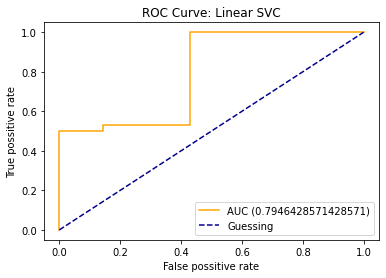

In [ ]:
clsvc = CalibratedClassifierCV(cv_svm, cv=5)
clsvc.fit(x_train, y_train)
y_prob = clsvc.predict_proba(x_test)
y_prob_pos = y_prob[:, 1]
fpr, tpr, threshold = roc_curve(y_test, y_prob_pos)
val = roc_auc_score(y_test, y_prob_pos)
plot_roc_curve(fpr,tpr, 'Linear SVC', val)

Ensemble architecture using KNeigbour classifier, Random forest, Logistic regration, LinearSVC, adaboost classifier

In [ ]:
clsvc = CalibratedClassifierCV(cv_svm, cv=5)
clsvc.fit(x_train, y_train)
model = VotingClassifier(estimators=[('knc', knc), ('rf', rfc), ('lr', lr), ('svm', clsvc), ('adb', adb), ], voting='soft')
model.fit(x_train,y_train)
hybrid_score = model.score(x_test,y_test)
m_pred_y = model.predict(x_test)
evaluation_pred(y_test, m_pred_y)
hybrid_score

Fitting 5 folds for each of 64 candidates, totalling 320 fits
[CV] C=400, dual=True, loss=squared_hinge, penalty=l1, tol=1e-05 .....
[CV]  C=400, dual=True, loss=squared_hinge, penalty=l1, tol=1e-05, total=   0.0s
[CV] C=400, dual=True, loss=squared_hinge, penalty=l1, tol=1e-05 .....
[CV]  C=400, dual=True, loss=squared_hinge, penalty=l1, tol=1e-05, total=   0.0s
[CV] C=400, dual=True, loss=squared_hinge, penalty=l1, tol=1e-05 .....
[CV]  C=400, dual=True, loss=squared_hinge, penalty=l1, tol=1e-05, total=   0.0s
[CV] C=400, dual=True, loss=squared_hinge, penalty=l1, tol=1e-05 .....
[CV]  C=400, dual=True, loss=squared_hinge, penalty=l1, tol=1e-05, total=   0.0s
[CV] C=400, dual=True, loss=squared_hinge, penalty=l1, tol=1e-05 .....
[CV]  C=400, dual=True, loss=squared_hinge, penalty=l1, tol=1e-05, total=   0.0s
[CV] C=400, dual=True, loss=squared_hinge, penalty=l1, tol=1e-07 .....
[CV]  C=400, dual=True, loss=squared_hinge, penalty=l1, tol=1e-07, total=   0.0s
[CV] C=400, dual=True, los

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Unsupported set of arguments: The combination of penalty='l1' and loss='squared_hinge' are not supported when dual=True, Parameters: penalty='l1', loss='squared_hinge', dual=True

  FitFailedWarning)
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Unsupported set of arguments: The combination of penalty='l1' and loss='squared_hinge' are not supported when dual=True, Parameters: penalty='l1', loss='squared_hinge', dual=True

  FitFail

[CV]  C=400, dual=True, loss=hinge, penalty=l2, tol=1e-07, total=   0.0s
[CV] C=400, dual=False, loss=squared_hinge, penalty=l1, tol=1e-05 ....
[CV]  C=400, dual=False, loss=squared_hinge, penalty=l1, tol=1e-05, total=   0.0s
[CV] C=400, dual=False, loss=squared_hinge, penalty=l1, tol=1e-05 ....
[CV]  C=400, dual=False, loss=squared_hinge, penalty=l1, tol=1e-05, total=   0.0s
[CV] C=400, dual=False, loss=squared_hinge, penalty=l1, tol=1e-05 ....
[CV]  C=400, dual=False, loss=squared_hinge, penalty=l1, tol=1e-05, total=   0.0s
[CV] C=400, dual=False, loss=squared_hinge, penalty=l1, tol=1e-05 ....
[CV]  C=400, dual=False, loss=squared_hinge, penalty=l1, tol=1e-05, total=   0.0s
[CV] C=400, dual=False, loss=squared_hinge, penalty=l1, tol=1e-05 ....
[CV]  C=400, dual=False, loss=squared_hinge, penalty=l1, tol=1e-05, total=   0.0s
[CV] C=400, dual=False, loss=squared_hinge, penalty=l1, tol=1e-07 ....
[CV]  C=400, dual=False, loss=squared_hinge, penalty=l1, tol=1e-07, total=   0.0s
[CV] C=40

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Unsupported set of arguments: The combination of penalty='l1' and loss='hinge' is not supported, Parameters: penalty='l1', loss='hinge', dual=False

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Unsupported set of arguments: The combination of penalty='l2' and loss='hinge' are not supported when dual=False, Parameters: penalty='l2', loss='hinge', dual=False

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set 

[CV]  C=400, dual=False, loss=hinge, penalty=l2, tol=1e-07, total=   0.0s
[CV] C=400, dual=False, loss=hinge, penalty=l2, tol=1e-07 ............
[CV]  C=400, dual=False, loss=hinge, penalty=l2, tol=1e-07, total=   0.0s
[CV] C=400, dual=False, loss=hinge, penalty=l2, tol=1e-07 ............
[CV]  C=400, dual=False, loss=hinge, penalty=l2, tol=1e-07, total=   0.0s
[CV] C=450, dual=True, loss=squared_hinge, penalty=l1, tol=1e-05 .....
[CV]  C=450, dual=True, loss=squared_hinge, penalty=l1, tol=1e-05, total=   0.0s
[CV] C=450, dual=True, loss=squared_hinge, penalty=l1, tol=1e-05 .....
[CV]  C=450, dual=True, loss=squared_hinge, penalty=l1, tol=1e-05, total=   0.0s
[CV] C=450, dual=True, loss=squared_hinge, penalty=l1, tol=1e-05 .....
[CV]  C=450, dual=True, loss=squared_hinge, penalty=l1, tol=1e-05, total=   0.0s
[CV] C=450, dual=True, loss=squared_hinge, penalty=l1, tol=1e-05 .....
[CV]  C=450, dual=True, loss=squared_hinge, penalty=l1, tol=1e-05, total=   0.0s
[CV] C=450, dual=True, loss=

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarn

[CV]  C=450, dual=False, loss=squared_hinge, penalty=l1, tol=1e-05, total=   0.0s
[CV] C=450, dual=False, loss=squared_hinge, penalty=l1, tol=1e-05 ....
[CV]  C=450, dual=False, loss=squared_hinge, penalty=l1, tol=1e-05, total=   0.0s
[CV] C=450, dual=False, loss=squared_hinge, penalty=l1, tol=1e-05 ....
[CV]  C=450, dual=False, loss=squared_hinge, penalty=l1, tol=1e-05, total=   0.0s
[CV] C=450, dual=False, loss=squared_hinge, penalty=l1, tol=1e-05 ....
[CV]  C=450, dual=False, loss=squared_hinge, penalty=l1, tol=1e-05, total=   0.0s
[CV] C=450, dual=False, loss=squared_hinge, penalty=l1, tol=1e-05 ....
[CV]  C=450, dual=False, loss=squared_hinge, penalty=l1, tol=1e-05, total=   0.0s
[CV] C=450, dual=False, loss=squared_hinge, penalty=l1, tol=1e-07 ....
[CV]  C=450, dual=False, loss=squared_hinge, penalty=l1, tol=1e-07, total=   0.0s
[CV] C=450, dual=False, loss=squared_hinge, penalty=l1, tol=1e-07 ....
[CV]  C=450, dual=False, loss=squared_hinge, penalty=l1, tol=1e-07, total=   0.0s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Unsupported set of arguments: The combination of penalty='l2' and loss='hinge' are not supported when dual=False, Parameters: penalty='l2', loss='hinge', dual=False

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Unsupported set of arguments: The combination of penalty='l2' and loss='hinge' are not supported when dual=False, Parameters: penalty='l2', loss='hinge', dual=False

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parame

[CV]  C=500, dual=True, loss=squared_hinge, penalty=l1, tol=1e-05, total=   0.0s
[CV] C=500, dual=True, loss=squared_hinge, penalty=l1, tol=1e-05 .....
[CV]  C=500, dual=True, loss=squared_hinge, penalty=l1, tol=1e-05, total=   0.0s
[CV] C=500, dual=True, loss=squared_hinge, penalty=l1, tol=1e-05 .....
[CV]  C=500, dual=True, loss=squared_hinge, penalty=l1, tol=1e-05, total=   0.0s
[CV] C=500, dual=True, loss=squared_hinge, penalty=l1, tol=1e-05 .....
[CV]  C=500, dual=True, loss=squared_hinge, penalty=l1, tol=1e-05, total=   0.0s
[CV] C=500, dual=True, loss=squared_hinge, penalty=l1, tol=1e-05 .....
[CV]  C=500, dual=True, loss=squared_hinge, penalty=l1, tol=1e-05, total=   0.0s
[CV] C=500, dual=True, loss=squared_hinge, penalty=l1, tol=1e-07 .....
[CV]  C=500, dual=True, loss=squared_hinge, penalty=l1, tol=1e-07, total=   0.0s
[CV] C=500, dual=True, loss=squared_hinge, penalty=l1, tol=1e-07 .....
[CV]  C=500, dual=True, loss=squared_hinge, penalty=l1, tol=1e-07, total=   0.0s
[CV] C=

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarn

[CV]  C=500, dual=False, loss=squared_hinge, penalty=l1, tol=1e-05, total=   0.0s
[CV] C=500, dual=False, loss=squared_hinge, penalty=l1, tol=1e-05 ....
[CV]  C=500, dual=False, loss=squared_hinge, penalty=l1, tol=1e-05, total=   0.0s
[CV] C=500, dual=False, loss=squared_hinge, penalty=l1, tol=1e-05 ....
[CV]  C=500, dual=False, loss=squared_hinge, penalty=l1, tol=1e-05, total=   0.0s
[CV] C=500, dual=False, loss=squared_hinge, penalty=l1, tol=1e-05 ....
[CV]  C=500, dual=False, loss=squared_hinge, penalty=l1, tol=1e-05, total=   0.0s
[CV] C=500, dual=False, loss=squared_hinge, penalty=l1, tol=1e-05 ....
[CV]  C=500, dual=False, loss=squared_hinge, penalty=l1, tol=1e-05, total=   0.0s
[CV] C=500, dual=False, loss=squared_hinge, penalty=l1, tol=1e-07 ....
[CV]  C=500, dual=False, loss=squared_hinge, penalty=l1, tol=1e-07, total=   0.0s
[CV] C=500, dual=False, loss=squared_hinge, penalty=l1, tol=1e-07 ....
[CV]  C=500, dual=False, loss=squared_hinge, penalty=l1, tol=1e-07, total=   0.0s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Unsupported set of arguments: The combination of penalty='l2' and loss='hinge' are not supported when dual=False, Parameters: penalty='l2', loss='hinge', dual=False

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Unsupported set of arguments: The combination of penalty='l2' and loss='hinge' are not supported when dual=False, Parameters: penalty='l2', loss='hinge', dual=False

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parame

[CV]  C=550, dual=True, loss=squared_hinge, penalty=l1, tol=1e-05, total=   0.0s
[CV] C=550, dual=True, loss=squared_hinge, penalty=l1, tol=1e-07 .....
[CV]  C=550, dual=True, loss=squared_hinge, penalty=l1, tol=1e-07, total=   0.0s
[CV] C=550, dual=True, loss=squared_hinge, penalty=l1, tol=1e-07 .....
[CV]  C=550, dual=True, loss=squared_hinge, penalty=l1, tol=1e-07, total=   0.0s
[CV] C=550, dual=True, loss=squared_hinge, penalty=l1, tol=1e-07 .....
[CV]  C=550, dual=True, loss=squared_hinge, penalty=l1, tol=1e-07, total=   0.0s
[CV] C=550, dual=True, loss=squared_hinge, penalty=l1, tol=1e-07 .....
[CV]  C=550, dual=True, loss=squared_hinge, penalty=l1, tol=1e-07, total=   0.0s
[CV] C=550, dual=True, loss=squared_hinge, penalty=l1, tol=1e-07 .....
[CV]  C=550, dual=True, loss=squared_hinge, penalty=l1, tol=1e-07, total=   0.0s
[CV] C=550, dual=True, loss=squared_hinge, penalty=l2, tol=1e-05 .....
[CV]  C=550, dual=True, loss=squared_hinge, penalty=l2, tol=1e-05, total=   0.0s
[CV] C=

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarn

[CV]  C=550, dual=False, loss=squared_hinge, penalty=l1, tol=1e-05, total=   0.0s
[CV] C=550, dual=False, loss=squared_hinge, penalty=l1, tol=1e-05 ....
[CV]  C=550, dual=False, loss=squared_hinge, penalty=l1, tol=1e-05, total=   0.0s
[CV] C=550, dual=False, loss=squared_hinge, penalty=l1, tol=1e-05 ....
[CV]  C=550, dual=False, loss=squared_hinge, penalty=l1, tol=1e-05, total=   0.0s
[CV] C=550, dual=False, loss=squared_hinge, penalty=l1, tol=1e-07 ....
[CV]  C=550, dual=False, loss=squared_hinge, penalty=l1, tol=1e-07, total=   0.0s
[CV] C=550, dual=False, loss=squared_hinge, penalty=l1, tol=1e-07 ....
[CV]  C=550, dual=False, loss=squared_hinge, penalty=l1, tol=1e-07, total=   0.0s
[CV] C=550, dual=False, loss=squared_hinge, penalty=l1, tol=1e-07 ....
[CV]  C=550, dual=False, loss=squared_hinge, penalty=l1, tol=1e-07, total=   0.0s
[CV] C=550, dual=False, loss=squared_hinge, penalty=l1, tol=1e-07 ....
[CV]  C=550, dual=False, loss=squared_hinge, penalty=l1, tol=1e-07, total=   0.0s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Unsupported set of arguments: The combination of penalty='l1' and loss='squared_hinge' are not supported when dual=True, Parameters: penalty='l1', loss='squared_hinge', dual=True

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Unsupported set of arguments: The combination of penalty='l1' and loss='squared_hinge' are not supported when dual=True, Parameters: penalty='l1', loss='squared_hinge', dual=True

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-tes

[CV]  C=400, dual=True, loss=squared_hinge, penalty=l2, tol=1e-05, total=   0.0s
[CV] C=400, dual=True, loss=squared_hinge, penalty=l2, tol=1e-05 .....
[CV]  C=400, dual=True, loss=squared_hinge, penalty=l2, tol=1e-05, total=   0.0s
[CV] C=400, dual=True, loss=squared_hinge, penalty=l2, tol=1e-05 .....
[CV]  C=400, dual=True, loss=squared_hinge, penalty=l2, tol=1e-05, total=   0.0s
[CV] C=400, dual=True, loss=squared_hinge, penalty=l2, tol=1e-05 .....
[CV]  C=400, dual=True, loss=squared_hinge, penalty=l2, tol=1e-05, total=   0.0s
[CV] C=400, dual=True, loss=squared_hinge, penalty=l2, tol=1e-05 .....
[CV]  C=400, dual=True, loss=squared_hinge, penalty=l2, tol=1e-05, total=   0.0s
[CV] C=400, dual=True, loss=squared_hinge, penalty=l2, tol=1e-07 .....
[CV]  C=400, dual=True, loss=squared_hinge, penalty=l2, tol=1e-07, total=   0.0s
[CV] C=400, dual=True, loss=squared_hinge, penalty=l2, tol=1e-07 .....
[CV]  C=400, dual=True, loss=squared_hinge, penalty=l2, tol=1e-07, total=   0.0s
[CV] C=

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarn

[CV]  C=400, dual=False, loss=squared_hinge, penalty=l1, tol=1e-05, total=   0.0s
[CV] C=400, dual=False, loss=squared_hinge, penalty=l1, tol=1e-05 ....
[CV]  C=400, dual=False, loss=squared_hinge, penalty=l1, tol=1e-05, total=   0.0s
[CV] C=400, dual=False, loss=squared_hinge, penalty=l1, tol=1e-05 ....
[CV]  C=400, dual=False, loss=squared_hinge, penalty=l1, tol=1e-05, total=   0.0s
[CV] C=400, dual=False, loss=squared_hinge, penalty=l1, tol=1e-07 ....
[CV]  C=400, dual=False, loss=squared_hinge, penalty=l1, tol=1e-07, total=   0.0s
[CV] C=400, dual=False, loss=squared_hinge, penalty=l1, tol=1e-07 ....
[CV]  C=400, dual=False, loss=squared_hinge, penalty=l1, tol=1e-07, total=   0.0s
[CV] C=400, dual=False, loss=squared_hinge, penalty=l1, tol=1e-07 ....
[CV]  C=400, dual=False, loss=squared_hinge, penalty=l1, tol=1e-07, total=   0.0s
[CV] C=400, dual=False, loss=squared_hinge, penalty=l1, tol=1e-07 ....
[CV]  C=400, dual=False, loss=squared_hinge, penalty=l1, tol=1e-07, total=   0.0s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Unsupported set of arguments: The combination of penalty='l1' and loss='squared_hinge' are not supported when dual=True, Parameters: penalty='l1', loss='squared_hinge', dual=True

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Unsupported set of arguments: The combination of penalty='l1' and loss='squared_hinge' are not supported when dual=True, Parameters: penalty='l1', loss='squared_hinge', dual=True

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.


[CV]  C=450, dual=True, loss=squared_hinge, penalty=l2, tol=1e-05, total=   0.0s
[CV] C=450, dual=True, loss=squared_hinge, penalty=l2, tol=1e-05 .....
[CV]  C=450, dual=True, loss=squared_hinge, penalty=l2, tol=1e-05, total=   0.0s
[CV] C=450, dual=True, loss=squared_hinge, penalty=l2, tol=1e-05 .....
[CV]  C=450, dual=True, loss=squared_hinge, penalty=l2, tol=1e-05, total=   0.0s
[CV] C=450, dual=True, loss=squared_hinge, penalty=l2, tol=1e-05 .....
[CV]  C=450, dual=True, loss=squared_hinge, penalty=l2, tol=1e-05, total=   0.0s
[CV] C=450, dual=True, loss=squared_hinge, penalty=l2, tol=1e-07 .....
[CV]  C=450, dual=True, loss=squared_hinge, penalty=l2, tol=1e-07, total=   0.0s
[CV] C=450, dual=True, loss=squared_hinge, penalty=l2, tol=1e-07 .....
[CV]  C=450, dual=True, loss=squared_hinge, penalty=l2, tol=1e-07, total=   0.0s
[CV] C=450, dual=True, loss=squared_hinge, penalty=l2, tol=1e-07 .....
[CV]  C=450, dual=True, loss=squared_hinge, penalty=l2, tol=1e-07, total=   0.0s
[CV] C=

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarn

[CV]  C=450, dual=False, loss=squared_hinge, penalty=l1, tol=1e-05, total=   0.0s
[CV] C=450, dual=False, loss=squared_hinge, penalty=l1, tol=1e-05 ....
[CV]  C=450, dual=False, loss=squared_hinge, penalty=l1, tol=1e-05, total=   0.0s
[CV] C=450, dual=False, loss=squared_hinge, penalty=l1, tol=1e-07 ....
[CV]  C=450, dual=False, loss=squared_hinge, penalty=l1, tol=1e-07, total=   0.0s
[CV] C=450, dual=False, loss=squared_hinge, penalty=l1, tol=1e-07 ....
[CV]  C=450, dual=False, loss=squared_hinge, penalty=l1, tol=1e-07, total=   0.0s
[CV] C=450, dual=False, loss=squared_hinge, penalty=l1, tol=1e-07 ....
[CV]  C=450, dual=False, loss=squared_hinge, penalty=l1, tol=1e-07, total=   0.0s
[CV] C=450, dual=False, loss=squared_hinge, penalty=l1, tol=1e-07 ....
[CV]  C=450, dual=False, loss=squared_hinge, penalty=l1, tol=1e-07, total=   0.0s
[CV] C=450, dual=False, loss=squared_hinge, penalty=l1, tol=1e-07 ....
[CV]  C=450, dual=False, loss=squared_hinge, penalty=l1, tol=1e-07, total=   0.0s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Unsupported set of arguments: The combination of penalty='l1' and loss='squared_hinge' are not supported when dual=True, Parameters: penalty='l1', loss='squared_hinge', dual=True

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Unsupported set of arguments: The combination of penalty='l1' and loss='squared_hinge' are not supported when dual=True, Parameters: penalty='l1', loss='squared_hinge', dual=True

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-tes

[CV]  C=500, dual=True, loss=squared_hinge, penalty=l2, tol=1e-05, total=   0.0s
[CV] C=500, dual=True, loss=squared_hinge, penalty=l2, tol=1e-05 .....
[CV]  C=500, dual=True, loss=squared_hinge, penalty=l2, tol=1e-05, total=   0.0s
[CV] C=500, dual=True, loss=squared_hinge, penalty=l2, tol=1e-05 .....
[CV]  C=500, dual=True, loss=squared_hinge, penalty=l2, tol=1e-05, total=   0.0s
[CV] C=500, dual=True, loss=squared_hinge, penalty=l2, tol=1e-05 .....
[CV]  C=500, dual=True, loss=squared_hinge, penalty=l2, tol=1e-05, total=   0.0s
[CV] C=500, dual=True, loss=squared_hinge, penalty=l2, tol=1e-07 .....
[CV]  C=500, dual=True, loss=squared_hinge, penalty=l2, tol=1e-07, total=   0.0s
[CV] C=500, dual=True, loss=squared_hinge, penalty=l2, tol=1e-07 .....
[CV]  C=500, dual=True, loss=squared_hinge, penalty=l2, tol=1e-07, total=   0.0s
[CV] C=500, dual=True, loss=squared_hinge, penalty=l2, tol=1e-07 .....
[CV]  C=500, dual=True, loss=squared_hinge, penalty=l2, tol=1e-07, total=   0.0s
[CV] C=

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarn

[CV]  C=500, dual=False, loss=squared_hinge, penalty=l1, tol=1e-05, total=   0.0s
[CV] C=500, dual=False, loss=squared_hinge, penalty=l1, tol=1e-05 ....
[CV]  C=500, dual=False, loss=squared_hinge, penalty=l1, tol=1e-05, total=   0.0s
[CV] C=500, dual=False, loss=squared_hinge, penalty=l1, tol=1e-05 ....
[CV]  C=500, dual=False, loss=squared_hinge, penalty=l1, tol=1e-05, total=   0.0s
[CV] C=500, dual=False, loss=squared_hinge, penalty=l1, tol=1e-07 ....
[CV]  C=500, dual=False, loss=squared_hinge, penalty=l1, tol=1e-07, total=   0.0s
[CV] C=500, dual=False, loss=squared_hinge, penalty=l1, tol=1e-07 ....
[CV]  C=500, dual=False, loss=squared_hinge, penalty=l1, tol=1e-07, total=   0.0s
[CV] C=500, dual=False, loss=squared_hinge, penalty=l1, tol=1e-07 ....
[CV]  C=500, dual=False, loss=squared_hinge, penalty=l1, tol=1e-07, total=   0.0s
[CV] C=500, dual=False, loss=squared_hinge, penalty=l1, tol=1e-07 ....
[CV]  C=500, dual=False, loss=squared_hinge, penalty=l1, tol=1e-07, total=   0.0s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Unsupported set of arguments: The combination of penalty='l1' and loss='squared_hinge' are not supported when dual=True, Parameters: penalty='l1', loss='squared_hinge', dual=True

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Unsupported set of arguments: The combination of penalty='l1' and loss='squared_hinge' are not supported when dual=True, Parameters: penalty='l1', loss='squared_hinge', dual=True

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-tes

[CV]  C=550, dual=True, loss=squared_hinge, penalty=l1, tol=1e-07, total=   0.0s
[CV] C=550, dual=True, loss=squared_hinge, penalty=l1, tol=1e-07 .....
[CV]  C=550, dual=True, loss=squared_hinge, penalty=l1, tol=1e-07, total=   0.0s
[CV] C=550, dual=True, loss=squared_hinge, penalty=l1, tol=1e-07 .....
[CV]  C=550, dual=True, loss=squared_hinge, penalty=l1, tol=1e-07, total=   0.0s
[CV] C=550, dual=True, loss=squared_hinge, penalty=l1, tol=1e-07 .....
[CV]  C=550, dual=True, loss=squared_hinge, penalty=l1, tol=1e-07, total=   0.0s
[CV] C=550, dual=True, loss=squared_hinge, penalty=l1, tol=1e-07 .....
[CV]  C=550, dual=True, loss=squared_hinge, penalty=l1, tol=1e-07, total=   0.0s
[CV] C=550, dual=True, loss=squared_hinge, penalty=l2, tol=1e-05 .....
[CV]  C=550, dual=True, loss=squared_hinge, penalty=l2, tol=1e-05, total=   0.0s
[CV] C=550, dual=True, loss=squared_hinge, penalty=l2, tol=1e-05 .....
[CV]  C=550, dual=True, loss=squared_hinge, penalty=l2, tol=1e-05, total=   0.0s
[CV] C=

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarn

[CV]  C=550, dual=False, loss=squared_hinge, penalty=l1, tol=1e-05, total=   0.0s
[CV] C=550, dual=False, loss=squared_hinge, penalty=l1, tol=1e-05 ....
[CV]  C=550, dual=False, loss=squared_hinge, penalty=l1, tol=1e-05, total=   0.0s
[CV] C=550, dual=False, loss=squared_hinge, penalty=l1, tol=1e-05 ....
[CV]  C=550, dual=False, loss=squared_hinge, penalty=l1, tol=1e-05, total=   0.0s
[CV] C=550, dual=False, loss=squared_hinge, penalty=l1, tol=1e-05 ....
[CV]  C=550, dual=False, loss=squared_hinge, penalty=l1, tol=1e-05, total=   0.0s
[CV] C=550, dual=False, loss=squared_hinge, penalty=l1, tol=1e-07 ....
[CV]  C=550, dual=False, loss=squared_hinge, penalty=l1, tol=1e-07, total=   0.0s
[CV] C=550, dual=False, loss=squared_hinge, penalty=l1, tol=1e-07 ....
[CV]  C=550, dual=False, loss=squared_hinge, penalty=l1, tol=1e-07, total=   0.0s
[CV] C=550, dual=False, loss=squared_hinge, penalty=l1, tol=1e-07 ....
[CV]  C=550, dual=False, loss=squared_hinge, penalty=l1, tol=1e-07, total=   0.0s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Unsupported set of arguments: The combination of penalty='l1' and loss='squared_hinge' are not supported when dual=True, Parameters: penalty='l1', loss='squared_hinge', dual=True

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Unsupported set of arguments: The combination of penalty='l1' and loss='squared_hinge' are not supported when dual=True, Parameters: penalty='l1', loss='squared_hinge', dual=True

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-tes

[CV]  C=400, dual=True, loss=squared_hinge, penalty=l2, tol=1e-05, total=   0.0s
[CV] C=400, dual=True, loss=squared_hinge, penalty=l2, tol=1e-05 .....
[CV]  C=400, dual=True, loss=squared_hinge, penalty=l2, tol=1e-05, total=   0.0s
[CV] C=400, dual=True, loss=squared_hinge, penalty=l2, tol=1e-05 .....
[CV]  C=400, dual=True, loss=squared_hinge, penalty=l2, tol=1e-05, total=   0.0s
[CV] C=400, dual=True, loss=squared_hinge, penalty=l2, tol=1e-05 .....
[CV]  C=400, dual=True, loss=squared_hinge, penalty=l2, tol=1e-05, total=   0.0s
[CV] C=400, dual=True, loss=squared_hinge, penalty=l2, tol=1e-05 .....
[CV]  C=400, dual=True, loss=squared_hinge, penalty=l2, tol=1e-05, total=   0.0s
[CV] C=400, dual=True, loss=squared_hinge, penalty=l2, tol=1e-07 .....
[CV]  C=400, dual=True, loss=squared_hinge, penalty=l2, tol=1e-07, total=   0.0s
[CV] C=400, dual=True, loss=squared_hinge, penalty=l2, tol=1e-07 .....
[CV]  C=400, dual=True, loss=squared_hinge, penalty=l2, tol=1e-07, total=   0.0s
[CV] C=

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarn

[CV]  C=400, dual=False, loss=squared_hinge, penalty=l1, tol=1e-05, total=   0.0s
[CV] C=400, dual=False, loss=squared_hinge, penalty=l1, tol=1e-05 ....
[CV]  C=400, dual=False, loss=squared_hinge, penalty=l1, tol=1e-05, total=   0.0s
[CV] C=400, dual=False, loss=squared_hinge, penalty=l1, tol=1e-05 ....
[CV]  C=400, dual=False, loss=squared_hinge, penalty=l1, tol=1e-05, total=   0.0s
[CV] C=400, dual=False, loss=squared_hinge, penalty=l1, tol=1e-07 ....
[CV]  C=400, dual=False, loss=squared_hinge, penalty=l1, tol=1e-07, total=   0.0s
[CV] C=400, dual=False, loss=squared_hinge, penalty=l1, tol=1e-07 ....
[CV]  C=400, dual=False, loss=squared_hinge, penalty=l1, tol=1e-07, total=   0.0s
[CV] C=400, dual=False, loss=squared_hinge, penalty=l1, tol=1e-07 ....
[CV]  C=400, dual=False, loss=squared_hinge, penalty=l1, tol=1e-07, total=   0.0s
[CV] C=400, dual=False, loss=squared_hinge, penalty=l1, tol=1e-07 ....
[CV]  C=400, dual=False, loss=squared_hinge, penalty=l1, tol=1e-07, total=   0.0s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Unsupported set of arguments: The combination of penalty='l1' and loss='squared_hinge' are not supported when dual=True, Parameters: penalty='l1', loss='squared_hinge', dual=True

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Unsupported set of arguments: The combination of penalty='l1' and loss='squared_hinge' are not supported when dual=True, Parameters: penalty='l1', loss='squared_hinge', dual=True

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-tes

[CV]  C=450, dual=True, loss=squared_hinge, penalty=l2, tol=1e-05, total=   0.0s
[CV] C=450, dual=True, loss=squared_hinge, penalty=l2, tol=1e-05 .....
[CV]  C=450, dual=True, loss=squared_hinge, penalty=l2, tol=1e-05, total=   0.0s
[CV] C=450, dual=True, loss=squared_hinge, penalty=l2, tol=1e-05 .....
[CV]  C=450, dual=True, loss=squared_hinge, penalty=l2, tol=1e-05, total=   0.0s
[CV] C=450, dual=True, loss=squared_hinge, penalty=l2, tol=1e-07 .....
[CV]  C=450, dual=True, loss=squared_hinge, penalty=l2, tol=1e-07, total=   0.0s
[CV] C=450, dual=True, loss=squared_hinge, penalty=l2, tol=1e-07 .....
[CV]  C=450, dual=True, loss=squared_hinge, penalty=l2, tol=1e-07, total=   0.0s
[CV] C=450, dual=True, loss=squared_hinge, penalty=l2, tol=1e-07 .....
[CV]  C=450, dual=True, loss=squared_hinge, penalty=l2, tol=1e-07, total=   0.0s
[CV] C=450, dual=True, loss=squared_hinge, penalty=l2, tol=1e-07 .....
[CV]  C=450, dual=True, loss=squared_hinge, penalty=l2, tol=1e-07, total=   0.0s
[CV] C=

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarn

[CV]  C=450, dual=False, loss=squared_hinge, penalty=l1, tol=1e-05, total=   0.0s
[CV] C=450, dual=False, loss=squared_hinge, penalty=l1, tol=1e-07 ....
[CV]  C=450, dual=False, loss=squared_hinge, penalty=l1, tol=1e-07, total=   0.0s
[CV] C=450, dual=False, loss=squared_hinge, penalty=l1, tol=1e-07 ....
[CV]  C=450, dual=False, loss=squared_hinge, penalty=l1, tol=1e-07, total=   0.0s
[CV] C=450, dual=False, loss=squared_hinge, penalty=l1, tol=1e-07 ....
[CV]  C=450, dual=False, loss=squared_hinge, penalty=l1, tol=1e-07, total=   0.0s
[CV] C=450, dual=False, loss=squared_hinge, penalty=l1, tol=1e-07 ....
[CV]  C=450, dual=False, loss=squared_hinge, penalty=l1, tol=1e-07, total=   0.0s
[CV] C=450, dual=False, loss=squared_hinge, penalty=l1, tol=1e-07 ....
[CV]  C=450, dual=False, loss=squared_hinge, penalty=l1, tol=1e-07, total=   0.0s
[CV] C=450, dual=False, loss=squared_hinge, penalty=l2, tol=1e-05 ....
[CV]  C=450, dual=False, loss=squared_hinge, penalty=l2, tol=1e-05, total=   0.0s


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarn

[CV]  C=500, dual=True, loss=squared_hinge, penalty=l2, tol=1e-05, total=   0.0s
[CV] C=500, dual=True, loss=squared_hinge, penalty=l2, tol=1e-05 .....
[CV]  C=500, dual=True, loss=squared_hinge, penalty=l2, tol=1e-05, total=   0.0s
[CV] C=500, dual=True, loss=squared_hinge, penalty=l2, tol=1e-05 .....
[CV]  C=500, dual=True, loss=squared_hinge, penalty=l2, tol=1e-05, total=   0.0s
[CV] C=500, dual=True, loss=squared_hinge, penalty=l2, tol=1e-07 .....
[CV]  C=500, dual=True, loss=squared_hinge, penalty=l2, tol=1e-07, total=   0.0s
[CV] C=500, dual=True, loss=squared_hinge, penalty=l2, tol=1e-07 .....
[CV]  C=500, dual=True, loss=squared_hinge, penalty=l2, tol=1e-07, total=   0.0s
[CV] C=500, dual=True, loss=squared_hinge, penalty=l2, tol=1e-07 .....
[CV]  C=500, dual=True, loss=squared_hinge, penalty=l2, tol=1e-07, total=   0.0s
[CV] C=500, dual=True, loss=squared_hinge, penalty=l2, tol=1e-07 .....
[CV]  C=500, dual=True, loss=squared_hinge, penalty=l2, tol=1e-07, total=   0.0s
[CV] C=

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarn

[CV]  C=500, dual=False, loss=squared_hinge, penalty=l1, tol=1e-05, total=   0.0s
[CV] C=500, dual=False, loss=squared_hinge, penalty=l1, tol=1e-05 ....
[CV]  C=500, dual=False, loss=squared_hinge, penalty=l1, tol=1e-05, total=   0.0s
[CV] C=500, dual=False, loss=squared_hinge, penalty=l1, tol=1e-07 ....
[CV]  C=500, dual=False, loss=squared_hinge, penalty=l1, tol=1e-07, total=   0.0s
[CV] C=500, dual=False, loss=squared_hinge, penalty=l1, tol=1e-07 ....
[CV]  C=500, dual=False, loss=squared_hinge, penalty=l1, tol=1e-07, total=   0.0s
[CV] C=500, dual=False, loss=squared_hinge, penalty=l1, tol=1e-07 ....
[CV]  C=500, dual=False, loss=squared_hinge, penalty=l1, tol=1e-07, total=   0.0s
[CV] C=500, dual=False, loss=squared_hinge, penalty=l1, tol=1e-07 ....
[CV]  C=500, dual=False, loss=squared_hinge, penalty=l1, tol=1e-07, total=   0.0s
[CV] C=500, dual=False, loss=squared_hinge, penalty=l1, tol=1e-07 ....
[CV]  C=500, dual=False, loss=squared_hinge, penalty=l1, tol=1e-07, total=   0.0s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Unsupported set of arguments: The combination of penalty='l1' and loss='squared_hinge' are not supported when dual=True, Parameters: penalty='l1', loss='squared_hinge', dual=True

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterat

[CV]  C=550, dual=True, loss=squared_hinge, penalty=l2, tol=1e-05, total=   0.0s
[CV] C=550, dual=True, loss=squared_hinge, penalty=l2, tol=1e-05 .....
[CV]  C=550, dual=True, loss=squared_hinge, penalty=l2, tol=1e-05, total=   0.0s
[CV] C=550, dual=True, loss=squared_hinge, penalty=l2, tol=1e-05 .....
[CV]  C=550, dual=True, loss=squared_hinge, penalty=l2, tol=1e-05, total=   0.0s
[CV] C=550, dual=True, loss=squared_hinge, penalty=l2, tol=1e-05 .....
[CV]  C=550, dual=True, loss=squared_hinge, penalty=l2, tol=1e-05, total=   0.0s
[CV] C=550, dual=True, loss=squared_hinge, penalty=l2, tol=1e-07 .....
[CV]  C=550, dual=True, loss=squared_hinge, penalty=l2, tol=1e-07, total=   0.0s
[CV] C=550, dual=True, loss=squared_hinge, penalty=l2, tol=1e-07 .....
[CV]  C=550, dual=True, loss=squared_hinge, penalty=l2, tol=1e-07, total=   0.0s
[CV] C=550, dual=True, loss=squared_hinge, penalty=l2, tol=1e-07 .....
[CV]  C=550, dual=True, loss=squared_hinge, penalty=l2, tol=1e-07, total=   0.0s
[CV] C=

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarn

[CV]  C=550, dual=False, loss=squared_hinge, penalty=l1, tol=1e-05, total=   0.0s
[CV] C=550, dual=False, loss=squared_hinge, penalty=l1, tol=1e-05 ....
[CV]  C=550, dual=False, loss=squared_hinge, penalty=l1, tol=1e-05, total=   0.0s
[CV] C=550, dual=False, loss=squared_hinge, penalty=l1, tol=1e-05 ....
[CV]  C=550, dual=False, loss=squared_hinge, penalty=l1, tol=1e-05, total=   0.0s
[CV] C=550, dual=False, loss=squared_hinge, penalty=l1, tol=1e-05 ....
[CV]  C=550, dual=False, loss=squared_hinge, penalty=l1, tol=1e-05, total=   0.0s
[CV] C=550, dual=False, loss=squared_hinge, penalty=l1, tol=1e-07 ....
[CV]  C=550, dual=False, loss=squared_hinge, penalty=l1, tol=1e-07, total=   0.0s
[CV] C=550, dual=False, loss=squared_hinge, penalty=l1, tol=1e-07 ....
[CV]  C=550, dual=False, loss=squared_hinge, penalty=l1, tol=1e-07, total=   0.0s
[CV] C=550, dual=False, loss=squared_hinge, penalty=l1, tol=1e-07 ....
[CV]  C=550, dual=False, loss=squared_hinge, penalty=l1, tol=1e-07, total=   0.0s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Unsupported set of arguments: The combination of penalty='l1' and loss='squared_hinge' are not supported when dual=True, Parameters: penalty='l1', loss='squared_hinge', dual=True

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Unsupported set of arguments: The combination of penalty='l1' and loss='squared_hinge' are not supported when dual=True, Parameters: penalty='l1', loss='squared_hinge', dual=True

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-tes

[CV]  C=400, dual=True, loss=squared_hinge, penalty=l1, tol=1e-07, total=   0.0s
[CV] C=400, dual=True, loss=squared_hinge, penalty=l1, tol=1e-07 .....
[CV]  C=400, dual=True, loss=squared_hinge, penalty=l1, tol=1e-07, total=   0.0s
[CV] C=400, dual=True, loss=squared_hinge, penalty=l1, tol=1e-07 .....
[CV]  C=400, dual=True, loss=squared_hinge, penalty=l1, tol=1e-07, total=   0.0s
[CV] C=400, dual=True, loss=squared_hinge, penalty=l1, tol=1e-07 .....
[CV]  C=400, dual=True, loss=squared_hinge, penalty=l1, tol=1e-07, total=   0.0s
[CV] C=400, dual=True, loss=squared_hinge, penalty=l2, tol=1e-05 .....
[CV]  C=400, dual=True, loss=squared_hinge, penalty=l2, tol=1e-05, total=   0.0s
[CV] C=400, dual=True, loss=squared_hinge, penalty=l2, tol=1e-05 .....
[CV]  C=400, dual=True, loss=squared_hinge, penalty=l2, tol=1e-05, total=   0.0s
[CV] C=400, dual=True, loss=squared_hinge, penalty=l2, tol=1e-05 .....
[CV]  C=400, dual=True, loss=squared_hinge, penalty=l2, tol=1e-05, total=   0.0s
[CV] C=

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarn

[CV]  C=400, dual=False, loss=squared_hinge, penalty=l1, tol=1e-05, total=   0.0s
[CV] C=400, dual=False, loss=squared_hinge, penalty=l1, tol=1e-05 ....
[CV]  C=400, dual=False, loss=squared_hinge, penalty=l1, tol=1e-05, total=   0.0s
[CV] C=400, dual=False, loss=squared_hinge, penalty=l1, tol=1e-07 ....
[CV]  C=400, dual=False, loss=squared_hinge, penalty=l1, tol=1e-07, total=   0.0s
[CV] C=400, dual=False, loss=squared_hinge, penalty=l1, tol=1e-07 ....
[CV]  C=400, dual=False, loss=squared_hinge, penalty=l1, tol=1e-07, total=   0.0s
[CV] C=400, dual=False, loss=squared_hinge, penalty=l1, tol=1e-07 ....
[CV]  C=400, dual=False, loss=squared_hinge, penalty=l1, tol=1e-07, total=   0.0s
[CV] C=400, dual=False, loss=squared_hinge, penalty=l1, tol=1e-07 ....
[CV]  C=400, dual=False, loss=squared_hinge, penalty=l1, tol=1e-07, total=   0.0s
[CV] C=400, dual=False, loss=squared_hinge, penalty=l1, tol=1e-07 ....
[CV]  C=400, dual=False, loss=squared_hinge, penalty=l1, tol=1e-07, total=   0.0s


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarn

[CV]  C=450, dual=True, loss=squared_hinge, penalty=l2, tol=1e-05, total=   0.0s
[CV] C=450, dual=True, loss=squared_hinge, penalty=l2, tol=1e-07 .....
[CV]  C=450, dual=True, loss=squared_hinge, penalty=l2, tol=1e-07, total=   0.0s
[CV] C=450, dual=True, loss=squared_hinge, penalty=l2, tol=1e-07 .....
[CV]  C=450, dual=True, loss=squared_hinge, penalty=l2, tol=1e-07, total=   0.0s
[CV] C=450, dual=True, loss=squared_hinge, penalty=l2, tol=1e-07 .....
[CV]  C=450, dual=True, loss=squared_hinge, penalty=l2, tol=1e-07, total=   0.0s
[CV] C=450, dual=True, loss=squared_hinge, penalty=l2, tol=1e-07 .....
[CV]  C=450, dual=True, loss=squared_hinge, penalty=l2, tol=1e-07, total=   0.0s
[CV] C=450, dual=True, loss=squared_hinge, penalty=l2, tol=1e-07 .....
[CV]  C=450, dual=True, loss=squared_hinge, penalty=l2, tol=1e-07, total=   0.0s
[CV] C=450, dual=True, loss=hinge, penalty=l1, tol=1e-05 .............
[CV]  C=450, dual=True, loss=hinge, penalty=l1, tol=1e-05, total=   0.0s
[CV] C=450, dua

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarn

[CV]  C=500, dual=True, loss=squared_hinge, penalty=l2, tol=1e-07, total=   0.0s
[CV] C=500, dual=True, loss=squared_hinge, penalty=l2, tol=1e-07 .....
[CV]  C=500, dual=True, loss=squared_hinge, penalty=l2, tol=1e-07, total=   0.0s
[CV] C=500, dual=True, loss=squared_hinge, penalty=l2, tol=1e-07 .....
[CV]  C=500, dual=True, loss=squared_hinge, penalty=l2, tol=1e-07, total=   0.0s
[CV] C=500, dual=True, loss=squared_hinge, penalty=l2, tol=1e-07 .....
[CV]  C=500, dual=True, loss=squared_hinge, penalty=l2, tol=1e-07, total=   0.0s
[CV] C=500, dual=True, loss=squared_hinge, penalty=l2, tol=1e-07 .....
[CV]  C=500, dual=True, loss=squared_hinge, penalty=l2, tol=1e-07, total=   0.0s
[CV] C=500, dual=True, loss=hinge, penalty=l1, tol=1e-05 .............
[CV]  C=500, dual=True, loss=hinge, penalty=l1, tol=1e-05, total=   0.0s
[CV] C=500, dual=True, loss=hinge, penalty=l1, tol=1e-05 .............
[CV]  C=500, dual=True, loss=hinge, penalty=l1, tol=1e-05, total=   0.0s
[CV] C=500, dual=True, 

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarn

[CV]  C=500, dual=False, loss=squared_hinge, penalty=l1, tol=1e-07, total=   0.0s
[CV] C=500, dual=False, loss=squared_hinge, penalty=l2, tol=1e-05 ....
[CV]  C=500, dual=False, loss=squared_hinge, penalty=l2, tol=1e-05, total=   0.0s
[CV] C=500, dual=False, loss=squared_hinge, penalty=l2, tol=1e-05 ....
[CV]  C=500, dual=False, loss=squared_hinge, penalty=l2, tol=1e-05, total=   0.0s
[CV] C=500, dual=False, loss=squared_hinge, penalty=l2, tol=1e-05 ....
[CV]  C=500, dual=False, loss=squared_hinge, penalty=l2, tol=1e-05, total=   0.0s
[CV] C=500, dual=False, loss=squared_hinge, penalty=l2, tol=1e-05 ....
[CV]  C=500, dual=False, loss=squared_hinge, penalty=l2, tol=1e-05, total=   0.0s
[CV] C=500, dual=False, loss=squared_hinge, penalty=l2, tol=1e-05 ....
[CV]  C=500, dual=False, loss=squared_hinge, penalty=l2, tol=1e-05, total=   0.0s
[CV] C=500, dual=False, loss=squared_hinge, penalty=l2, tol=1e-07 ....
[CV]  C=500, dual=False, loss=squared_hinge, penalty=l2, tol=1e-07, total=   0.0s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Unsupported set of arguments: The combination of penalty='l1' and loss='hinge' is not supported, Parameters: penalty='l1', loss='hinge', dual=True

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Unsupported set of arguments: The combination of penalty='l1' and loss='hinge' is not supported, Parameters: penalty='l1', loss='hinge', dual=True

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
V

[CV]  C=550, dual=True, loss=hinge, penalty=l2, tol=1e-05, total=   0.0s
[CV] C=550, dual=True, loss=hinge, penalty=l2, tol=1e-05 .............
[CV]  C=550, dual=True, loss=hinge, penalty=l2, tol=1e-05, total=   0.0s
[CV] C=550, dual=True, loss=hinge, penalty=l2, tol=1e-05 .............
[CV]  C=550, dual=True, loss=hinge, penalty=l2, tol=1e-05, total=   0.0s
[CV] C=550, dual=True, loss=hinge, penalty=l2, tol=1e-05 .............
[CV]  C=550, dual=True, loss=hinge, penalty=l2, tol=1e-05, total=   0.0s
[CV] C=550, dual=True, loss=hinge, penalty=l2, tol=1e-07 .............
[CV]  C=550, dual=True, loss=hinge, penalty=l2, tol=1e-07, total=   0.0s
[CV] C=550, dual=True, loss=hinge, penalty=l2, tol=1e-07 .............
[CV]  C=550, dual=True, loss=hinge, penalty=l2, tol=1e-07, total=   0.0s
[CV] C=550, dual=True, loss=hinge, penalty=l2, tol=1e-07 .............
[CV]  C=550, dual=True, loss=hinge, penalty=l2, tol=1e-07, total=   0.0s
[CV] C=550, dual=True, loss=hinge, penalty=l2, tol=1e-07 ......

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Unsupported set of arguments: The combination of penalty='l1' and loss='hinge' is not supported, Parameters: penalty='l1', loss='hinge', dual=False

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Unsupported set of arguments: The combination of penalty='l1' and loss='hinge' is not supported, Parameters: penalty='l1', loss='hinge', dual=False

  FitFailedWarning)
/usr/local/

[CV]  C=550, dual=False, loss=squared_hinge, penalty=l2, tol=1e-05, total=   0.0s
[CV] C=550, dual=False, loss=squared_hinge, penalty=l2, tol=1e-05 ....
[CV]  C=550, dual=False, loss=squared_hinge, penalty=l2, tol=1e-05, total=   0.0s
[CV] C=550, dual=False, loss=squared_hinge, penalty=l2, tol=1e-05 ....
[CV]  C=550, dual=False, loss=squared_hinge, penalty=l2, tol=1e-05, total=   0.0s
[CV] C=550, dual=False, loss=squared_hinge, penalty=l2, tol=1e-05 ....
[CV]  C=550, dual=False, loss=squared_hinge, penalty=l2, tol=1e-05, total=   0.0s
[CV] C=550, dual=False, loss=squared_hinge, penalty=l2, tol=1e-07 ....
[CV]  C=550, dual=False, loss=squared_hinge, penalty=l2, tol=1e-07, total=   0.0s
[CV] C=550, dual=False, loss=squared_hinge, penalty=l2, tol=1e-07 ....
[CV]  C=550, dual=False, loss=squared_hinge, penalty=l2, tol=1e-07, total=   0.0s
[CV] C=550, dual=False, loss=squared_hinge, penalty=l2, tol=1e-07 ....
[CV]  C=550, dual=False, loss=squared_hinge, penalty=l2, tol=1e-07, total=   0.0s


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Unsupported set of arguments: The combination of penalty='l1' and loss='hinge' is not supported, Parameters: penalty='l1', loss='hinge', dual=True

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. De

[CV]  C=400, dual=True, loss=hinge, penalty=l1, tol=1e-07, total=   0.0s
[CV] C=400, dual=True, loss=hinge, penalty=l1, tol=1e-07 .............
[CV]  C=400, dual=True, loss=hinge, penalty=l1, tol=1e-07, total=   0.0s
[CV] C=400, dual=True, loss=hinge, penalty=l1, tol=1e-07 .............
[CV]  C=400, dual=True, loss=hinge, penalty=l1, tol=1e-07, total=   0.0s
[CV] C=400, dual=True, loss=hinge, penalty=l2, tol=1e-05 .............
[CV]  C=400, dual=True, loss=hinge, penalty=l2, tol=1e-05, total=   0.0s
[CV] C=400, dual=True, loss=hinge, penalty=l2, tol=1e-05 .............
[CV]  C=400, dual=True, loss=hinge, penalty=l2, tol=1e-05, total=   0.0s
[CV] C=400, dual=True, loss=hinge, penalty=l2, tol=1e-05 .............
[CV]  C=400, dual=True, loss=hinge, penalty=l2, tol=1e-05, total=   0.0s
[CV] C=400, dual=True, loss=hinge, penalty=l2, tol=1e-05 .............
[CV]  C=400, dual=True, loss=hinge, penalty=l2, tol=1e-05, total=   0.0s
[CV] C=400, dual=True, loss=hinge, penalty=l2, tol=1e-05 ......

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Unsupported set of arguments: The combination of penalty='l1' and loss='hinge' is not supported, Parameters: penalty='l1', loss='hinge', dual=False

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Unsupported set of arguments: The combination of penalty='l1' and loss='hinge' is not supported, Parameters: penalty='l1', loss='hinge', dual=False

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 

[CV]  C=450, dual=True, loss=hinge, penalty=l1, tol=1e-07, total=   0.0s
[CV] C=450, dual=True, loss=hinge, penalty=l1, tol=1e-07 .............
[CV]  C=450, dual=True, loss=hinge, penalty=l1, tol=1e-07, total=   0.0s
[CV] C=450, dual=True, loss=hinge, penalty=l2, tol=1e-05 .............
[CV]  C=450, dual=True, loss=hinge, penalty=l2, tol=1e-05, total=   0.0s
[CV] C=450, dual=True, loss=hinge, penalty=l2, tol=1e-05 .............
[CV]  C=450, dual=True, loss=hinge, penalty=l2, tol=1e-05, total=   0.0s
[CV] C=450, dual=True, loss=hinge, penalty=l2, tol=1e-05 .............
[CV]  C=450, dual=True, loss=hinge, penalty=l2, tol=1e-05, total=   0.0s
[CV] C=450, dual=True, loss=hinge, penalty=l2, tol=1e-05 .............
[CV]  C=450, dual=True, loss=hinge, penalty=l2, tol=1e-05, total=   0.0s
[CV] C=450, dual=True, loss=hinge, penalty=l2, tol=1e-05 .............
[CV]  C=450, dual=True, loss=hinge, penalty=l2, tol=1e-05, total=   0.0s
[CV] C=450, dual=True, loss=hinge, penalty=l2, tol=1e-07 ......

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarn

[CV] C=450, dual=False, loss=squared_hinge, penalty=l2, tol=1e-05 ....
[CV]  C=450, dual=False, loss=squared_hinge, penalty=l2, tol=1e-05, total=   0.0s
[CV] C=450, dual=False, loss=squared_hinge, penalty=l2, tol=1e-05 ....
[CV]  C=450, dual=False, loss=squared_hinge, penalty=l2, tol=1e-05, total=   0.0s
[CV] C=450, dual=False, loss=squared_hinge, penalty=l2, tol=1e-05 ....
[CV]  C=450, dual=False, loss=squared_hinge, penalty=l2, tol=1e-05, total=   0.0s
[CV] C=450, dual=False, loss=squared_hinge, penalty=l2, tol=1e-05 ....
[CV]  C=450, dual=False, loss=squared_hinge, penalty=l2, tol=1e-05, total=   0.0s
[CV] C=450, dual=False, loss=squared_hinge, penalty=l2, tol=1e-05 ....
[CV]  C=450, dual=False, loss=squared_hinge, penalty=l2, tol=1e-05, total=   0.0s
[CV] C=450, dual=False, loss=squared_hinge, penalty=l2, tol=1e-07 ....
[CV]  C=450, dual=False, loss=squared_hinge, penalty=l2, tol=1e-07, total=   0.0s
[CV] C=450, dual=False, loss=squared_hinge, penalty=l2, tol=1e-07 ....
[CV]  C=450

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Unsupported set of arguments: The combination of penalty='l1' and loss='hinge' is not supported, Parameters: penalty='l1', loss='hinge', dual=False

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Unsupported set of arguments: The combination of penalty='l1' and loss='hinge' is not supported, Parameters: penalty='l1', loss='hinge', dual=False

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 

[CV]  C=500, dual=True, loss=hinge, penalty=l1, tol=1e-07, total=   0.0s
[CV] C=500, dual=True, loss=hinge, penalty=l1, tol=1e-07 .............
[CV]  C=500, dual=True, loss=hinge, penalty=l1, tol=1e-07, total=   0.0s
[CV] C=500, dual=True, loss=hinge, penalty=l1, tol=1e-07 .............
[CV]  C=500, dual=True, loss=hinge, penalty=l1, tol=1e-07, total=   0.0s
[CV] C=500, dual=True, loss=hinge, penalty=l1, tol=1e-07 .............
[CV]  C=500, dual=True, loss=hinge, penalty=l1, tol=1e-07, total=   0.0s
[CV] C=500, dual=True, loss=hinge, penalty=l2, tol=1e-05 .............
[CV]  C=500, dual=True, loss=hinge, penalty=l2, tol=1e-05, total=   0.0s
[CV] C=500, dual=True, loss=hinge, penalty=l2, tol=1e-05 .............
[CV]  C=500, dual=True, loss=hinge, penalty=l2, tol=1e-05, total=   0.0s
[CV] C=500, dual=True, loss=hinge, penalty=l2, tol=1e-05 .............
[CV]  C=500, dual=True, loss=hinge, penalty=l2, tol=1e-05, total=   0.0s
[CV] C=500, dual=True, loss=hinge, penalty=l2, tol=1e-05 ......

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarn

[CV]  C=500, dual=False, loss=squared_hinge, penalty=l2, tol=1e-05, total=   0.0s
[CV] C=500, dual=False, loss=squared_hinge, penalty=l2, tol=1e-05 ....
[CV]  C=500, dual=False, loss=squared_hinge, penalty=l2, tol=1e-05, total=   0.0s
[CV] C=500, dual=False, loss=squared_hinge, penalty=l2, tol=1e-05 ....
[CV]  C=500, dual=False, loss=squared_hinge, penalty=l2, tol=1e-05, total=   0.0s
[CV] C=500, dual=False, loss=squared_hinge, penalty=l2, tol=1e-05 ....
[CV]  C=500, dual=False, loss=squared_hinge, penalty=l2, tol=1e-05, total=   0.0s
[CV] C=500, dual=False, loss=squared_hinge, penalty=l2, tol=1e-05 ....
[CV]  C=500, dual=False, loss=squared_hinge, penalty=l2, tol=1e-05, total=   0.0s
[CV] C=500, dual=False, loss=squared_hinge, penalty=l2, tol=1e-07 ....
[CV]  C=500, dual=False, loss=squared_hinge, penalty=l2, tol=1e-07, total=   0.0s
[CV] C=500, dual=False, loss=squared_hinge, penalty=l2, tol=1e-07 ....
[CV]  C=500, dual=False, loss=squared_hinge, penalty=l2, tol=1e-07, total=   0.0s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Unsupported set of arguments: The combination of penalty='l1' and loss='hinge' is not supported, Parameters: penalty='l1', loss='hinge', dual=False

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Unsupported set of arguments: The combination of penalty='l1' and loss='hinge' is not supported, Parameters: penalty='l1', loss='hinge', dual=False

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 

[CV]  C=550, dual=True, loss=hinge, penalty=l2, tol=1e-05, total=   0.0s
[CV] C=550, dual=True, loss=hinge, penalty=l2, tol=1e-05 .............
[CV]  C=550, dual=True, loss=hinge, penalty=l2, tol=1e-05, total=   0.0s
[CV] C=550, dual=True, loss=hinge, penalty=l2, tol=1e-05 .............
[CV]  C=550, dual=True, loss=hinge, penalty=l2, tol=1e-05, total=   0.0s
[CV] C=550, dual=True, loss=hinge, penalty=l2, tol=1e-05 .............
[CV]  C=550, dual=True, loss=hinge, penalty=l2, tol=1e-05, total=   0.0s
[CV] C=550, dual=True, loss=hinge, penalty=l2, tol=1e-05 .............
[CV]  C=550, dual=True, loss=hinge, penalty=l2, tol=1e-05, total=   0.0s
[CV] C=550, dual=True, loss=hinge, penalty=l2, tol=1e-07 .............
[CV]  C=550, dual=True, loss=hinge, penalty=l2, tol=1e-07, total=   0.0s
[CV] C=550, dual=True, loss=hinge, penalty=l2, tol=1e-07 .............
[CV]  C=550, dual=True, loss=hinge, penalty=l2, tol=1e-07, total=   0.0s
[CV] C=550, dual=True, loss=hinge, penalty=l2, tol=1e-07 ......

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarn

[CV]  C=550, dual=False, loss=hinge, penalty=l1, tol=1e-05, total=   0.0s
[CV] C=550, dual=False, loss=hinge, penalty=l1, tol=1e-05 ............
[CV]  C=550, dual=False, loss=hinge, penalty=l1, tol=1e-05, total=   0.0s
[CV] C=550, dual=False, loss=hinge, penalty=l1, tol=1e-05 ............
[CV]  C=550, dual=False, loss=hinge, penalty=l1, tol=1e-05, total=   0.0s
[CV] C=550, dual=False, loss=hinge, penalty=l1, tol=1e-05 ............
[CV]  C=550, dual=False, loss=hinge, penalty=l1, tol=1e-05, total=   0.0s
[CV] C=550, dual=False, loss=hinge, penalty=l1, tol=1e-05 ............
[CV]  C=550, dual=False, loss=hinge, penalty=l1, tol=1e-05, total=   0.0s
[CV] C=550, dual=False, loss=hinge, penalty=l1, tol=1e-07 ............
[CV]  C=550, dual=False, loss=hinge, penalty=l1, tol=1e-07, total=   0.0s
[CV] C=550, dual=False, loss=hinge, penalty=l1, tol=1e-07 ............
[CV]  C=550, dual=False, loss=hinge, penalty=l1, tol=1e-07, total=   0.0s
[CV] C=550, dual=False, loss=hinge, penalty=l1, tol=1e-0

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Unsupported set of arguments: The combination of penalty='l2' and loss='hinge' are not supported when dual=False, Parameters: penalty='l2', loss='hinge', dual=False

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Unsupported set of arguments: The combination of penalty='l2' and loss='hinge' are not supported when dual=False, Parameters: penalty='l2', loss='hinge', dual=False

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parame

[CV]  C=400, dual=True, loss=squared_hinge, penalty=l2, tol=1e-05, total=   0.0s
[CV] C=400, dual=True, loss=squared_hinge, penalty=l2, tol=1e-05 .....
[CV]  C=400, dual=True, loss=squared_hinge, penalty=l2, tol=1e-05, total=   0.0s
[CV] C=400, dual=True, loss=squared_hinge, penalty=l2, tol=1e-05 .....
[CV]  C=400, dual=True, loss=squared_hinge, penalty=l2, tol=1e-05, total=   0.0s
[CV] C=400, dual=True, loss=squared_hinge, penalty=l2, tol=1e-05 .....
[CV]  C=400, dual=True, loss=squared_hinge, penalty=l2, tol=1e-05, total=   0.0s
[CV] C=400, dual=True, loss=squared_hinge, penalty=l2, tol=1e-07 .....
[CV]  C=400, dual=True, loss=squared_hinge, penalty=l2, tol=1e-07, total=   0.0s
[CV] C=400, dual=True, loss=squared_hinge, penalty=l2, tol=1e-07 .....
[CV]  C=400, dual=True, loss=squared_hinge, penalty=l2, tol=1e-07, total=   0.0s
[CV] C=400, dual=True, loss=squared_hinge, penalty=l2, tol=1e-07 .....
[CV]  C=400, dual=True, loss=squared_hinge, penalty=l2, tol=1e-07, total=   0.0s
[CV] C=

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set t

[CV]  C=400, dual=False, loss=squared_hinge, penalty=l1, tol=1e-05, total=   0.0s
[CV] C=400, dual=False, loss=squared_hinge, penalty=l1, tol=1e-05 ....
[CV]  C=400, dual=False, loss=squared_hinge, penalty=l1, tol=1e-05, total=   0.0s
[CV] C=400, dual=False, loss=squared_hinge, penalty=l1, tol=1e-07 ....
[CV]  C=400, dual=False, loss=squared_hinge, penalty=l1, tol=1e-07, total=   0.0s
[CV] C=400, dual=False, loss=squared_hinge, penalty=l1, tol=1e-07 ....
[CV]  C=400, dual=False, loss=squared_hinge, penalty=l1, tol=1e-07, total=   0.0s
[CV] C=400, dual=False, loss=squared_hinge, penalty=l1, tol=1e-07 ....
[CV]  C=400, dual=False, loss=squared_hinge, penalty=l1, tol=1e-07, total=   0.0s
[CV] C=400, dual=False, loss=squared_hinge, penalty=l1, tol=1e-07 ....
[CV]  C=400, dual=False, loss=squared_hinge, penalty=l1, tol=1e-07, total=   0.0s
[CV] C=400, dual=False, loss=squared_hinge, penalty=l1, tol=1e-07 ....
[CV]  C=400, dual=False, loss=squared_hinge, penalty=l1, tol=1e-07, total=   0.0s


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set t

[CV]  C=450, dual=True, loss=squared_hinge, penalty=l2, tol=1e-05, total=   0.0s
[CV] C=450, dual=True, loss=squared_hinge, penalty=l2, tol=1e-05 .....
[CV]  C=450, dual=True, loss=squared_hinge, penalty=l2, tol=1e-05, total=   0.0s
[CV] C=450, dual=True, loss=squared_hinge, penalty=l2, tol=1e-05 .....
[CV]  C=450, dual=True, loss=squared_hinge, penalty=l2, tol=1e-05, total=   0.0s
[CV] C=450, dual=True, loss=squared_hinge, penalty=l2, tol=1e-05 .....
[CV]  C=450, dual=True, loss=squared_hinge, penalty=l2, tol=1e-05, total=   0.0s
[CV] C=450, dual=True, loss=squared_hinge, penalty=l2, tol=1e-07 .....
[CV]  C=450, dual=True, loss=squared_hinge, penalty=l2, tol=1e-07, total=   0.0s
[CV] C=450, dual=True, loss=squared_hinge, penalty=l2, tol=1e-07 .....
[CV]  C=450, dual=True, loss=squared_hinge, penalty=l2, tol=1e-07, total=   0.0s
[CV] C=450, dual=True, loss=squared_hinge, penalty=l2, tol=1e-07 .....
[CV]  C=450, dual=True, loss=squared_hinge, penalty=l2, tol=1e-07, total=   0.0s
[CV] C=

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Unsupported set of arguments: The combination of penalty='l1' and loss='hinge' is not supported, Parameters: penalty='l1', loss='hinge', dual=True

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. De

[CV]  C=450, dual=False, loss=squared_hinge, penalty=l1, tol=1e-07, total=   0.0s
[CV] C=450, dual=False, loss=squared_hinge, penalty=l1, tol=1e-07 ....
[CV]  C=450, dual=False, loss=squared_hinge, penalty=l1, tol=1e-07, total=   0.0s
[CV] C=450, dual=False, loss=squared_hinge, penalty=l1, tol=1e-07 ....
[CV]  C=450, dual=False, loss=squared_hinge, penalty=l1, tol=1e-07, total=   0.0s
[CV] C=450, dual=False, loss=squared_hinge, penalty=l1, tol=1e-07 ....
[CV]  C=450, dual=False, loss=squared_hinge, penalty=l1, tol=1e-07, total=   0.0s
[CV] C=450, dual=False, loss=squared_hinge, penalty=l1, tol=1e-07 ....
[CV]  C=450, dual=False, loss=squared_hinge, penalty=l1, tol=1e-07, total=   0.0s
[CV] C=450, dual=False, loss=squared_hinge, penalty=l2, tol=1e-05 ....
[CV]  C=450, dual=False, loss=squared_hinge, penalty=l2, tol=1e-05, total=   0.0s
[CV] C=450, dual=False, loss=squared_hinge, penalty=l2, tol=1e-05 ....
[CV]  C=450, dual=False, loss=squared_hinge, penalty=l2, tol=1e-05, total=   0.0s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Unsupported set of arguments: The combination of penalty='l1' and loss='hinge' is not supported, Parameters: penalty='l1', loss='hinge', dual=False

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Unsupported set of arguments: The combination of penalty='l1' and loss='hinge' is not supported, Parameters: penalty='l1', loss='hinge', dual=False

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 

[CV]  C=500, dual=True, loss=squared_hinge, penalty=l2, tol=1e-07, total=   0.0s
[CV] C=500, dual=True, loss=squared_hinge, penalty=l2, tol=1e-07 .....
[CV]  C=500, dual=True, loss=squared_hinge, penalty=l2, tol=1e-07, total=   0.0s
[CV] C=500, dual=True, loss=squared_hinge, penalty=l2, tol=1e-07 .....
[CV]  C=500, dual=True, loss=squared_hinge, penalty=l2, tol=1e-07, total=   0.0s
[CV] C=500, dual=True, loss=hinge, penalty=l1, tol=1e-05 .............
[CV]  C=500, dual=True, loss=hinge, penalty=l1, tol=1e-05, total=   0.0s
[CV] C=500, dual=True, loss=hinge, penalty=l1, tol=1e-05 .............
[CV]  C=500, dual=True, loss=hinge, penalty=l1, tol=1e-05, total=   0.0s
[CV] C=500, dual=True, loss=hinge, penalty=l1, tol=1e-05 .............
[CV]  C=500, dual=True, loss=hinge, penalty=l1, tol=1e-05, total=   0.0s
[CV] C=500, dual=True, loss=hinge, penalty=l1, tol=1e-05 .............
[CV]  C=500, dual=True, loss=hinge, penalty=l1, tol=1e-05, total=   0.0s
[CV] C=500, dual=True, loss=hinge, pena

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarn

[CV]  C=500, dual=False, loss=squared_hinge, penalty=l1, tol=1e-07, total=   0.0s
[CV] C=500, dual=False, loss=squared_hinge, penalty=l1, tol=1e-07 ....
[CV]  C=500, dual=False, loss=squared_hinge, penalty=l1, tol=1e-07, total=   0.0s
[CV] C=500, dual=False, loss=squared_hinge, penalty=l2, tol=1e-05 ....
[CV]  C=500, dual=False, loss=squared_hinge, penalty=l2, tol=1e-05, total=   0.0s
[CV] C=500, dual=False, loss=squared_hinge, penalty=l2, tol=1e-05 ....
[CV]  C=500, dual=False, loss=squared_hinge, penalty=l2, tol=1e-05, total=   0.0s
[CV] C=500, dual=False, loss=squared_hinge, penalty=l2, tol=1e-05 ....
[CV]  C=500, dual=False, loss=squared_hinge, penalty=l2, tol=1e-05, total=   0.0s
[CV] C=500, dual=False, loss=squared_hinge, penalty=l2, tol=1e-05 ....
[CV]  C=500, dual=False, loss=squared_hinge, penalty=l2, tol=1e-05, total=   0.0s
[CV] C=500, dual=False, loss=squared_hinge, penalty=l2, tol=1e-05 ....
[CV]  C=500, dual=False, loss=squared_hinge, penalty=l2, tol=1e-05, total=   0.0s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Unsupported set of arguments: The combination of penalty='l1' and loss='hinge' is not supported, Parameters: penalty='l1', loss='hinge', dual=False

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Unsupported set of arguments: The combination of penalty='l1' and loss='hinge' is not supported, Parameters: penalty='l1', loss='hinge', dual=False

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 

[CV]  C=550, dual=True, loss=squared_hinge, penalty=l2, tol=1e-07, total=   0.0s
[CV] C=550, dual=True, loss=hinge, penalty=l1, tol=1e-05 .............
[CV]  C=550, dual=True, loss=hinge, penalty=l1, tol=1e-05, total=   0.0s
[CV] C=550, dual=True, loss=hinge, penalty=l1, tol=1e-05 .............
[CV]  C=550, dual=True, loss=hinge, penalty=l1, tol=1e-05, total=   0.0s
[CV] C=550, dual=True, loss=hinge, penalty=l1, tol=1e-05 .............
[CV]  C=550, dual=True, loss=hinge, penalty=l1, tol=1e-05, total=   0.0s
[CV] C=550, dual=True, loss=hinge, penalty=l1, tol=1e-05 .............
[CV]  C=550, dual=True, loss=hinge, penalty=l1, tol=1e-05, total=   0.0s
[CV] C=550, dual=True, loss=hinge, penalty=l1, tol=1e-05 .............
[CV]  C=550, dual=True, loss=hinge, penalty=l1, tol=1e-05, total=   0.0s
[CV] C=550, dual=True, loss=hinge, penalty=l1, tol=1e-07 .............
[CV]  C=550, dual=True, loss=hinge, penalty=l1, tol=1e-07, total=   0.0s
[CV] C=550, dual=True, loss=hinge, penalty=l1, tol=1e-0

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarn

[CV]  C=550, dual=False, loss=squared_hinge, penalty=l2, tol=1e-05, total=   0.0s
[CV] C=550, dual=False, loss=squared_hinge, penalty=l2, tol=1e-05 ....
[CV]  C=550, dual=False, loss=squared_hinge, penalty=l2, tol=1e-05, total=   0.0s
[CV] C=550, dual=False, loss=squared_hinge, penalty=l2, tol=1e-05 ....
[CV]  C=550, dual=False, loss=squared_hinge, penalty=l2, tol=1e-05, total=   0.0s
[CV] C=550, dual=False, loss=squared_hinge, penalty=l2, tol=1e-07 ....
[CV]  C=550, dual=False, loss=squared_hinge, penalty=l2, tol=1e-07, total=   0.0s
[CV] C=550, dual=False, loss=squared_hinge, penalty=l2, tol=1e-07 ....
[CV]  C=550, dual=False, loss=squared_hinge, penalty=l2, tol=1e-07, total=   0.0s
[CV] C=550, dual=False, loss=squared_hinge, penalty=l2, tol=1e-07 ....
[CV]  C=550, dual=False, loss=squared_hinge, penalty=l2, tol=1e-07, total=   0.0s
[CV] C=550, dual=False, loss=squared_hinge, penalty=l2, tol=1e-07 ....
[CV]  C=550, dual=False, loss=squared_hinge, penalty=l2, tol=1e-07, total=   0.0s


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Unsupported set of arguments: The combination of penalty='l1' and loss='squared_hinge' are not supported when dual=True, Parameters: penalty='l1', loss='squared_hinge', dual=True

  FitFailedWarning)
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 


[CV]  C=400, dual=True, loss=hinge, penalty=l1, tol=1e-07, total=   0.0s
[CV] C=400, dual=True, loss=hinge, penalty=l1, tol=1e-07 .............
[CV]  C=400, dual=True, loss=hinge, penalty=l1, tol=1e-07, total=   0.0s
[CV] C=400, dual=True, loss=hinge, penalty=l1, tol=1e-07 .............
[CV]  C=400, dual=True, loss=hinge, penalty=l1, tol=1e-07, total=   0.0s
[CV] C=400, dual=True, loss=hinge, penalty=l2, tol=1e-05 .............
[CV]  C=400, dual=True, loss=hinge, penalty=l2, tol=1e-05, total=   0.0s
[CV] C=400, dual=True, loss=hinge, penalty=l2, tol=1e-05 .............
[CV]  C=400, dual=True, loss=hinge, penalty=l2, tol=1e-05, total=   0.0s
[CV] C=400, dual=True, loss=hinge, penalty=l2, tol=1e-05 .............
[CV]  C=400, dual=True, loss=hinge, penalty=l2, tol=1e-05, total=   0.0s
[CV] C=400, dual=True, loss=hinge, penalty=l2, tol=1e-05 .............
[CV]  C=400, dual=True, loss=hinge, penalty=l2, tol=1e-05, total=   0.0s
[CV] C=400, dual=True, loss=hinge, penalty=l2, tol=1e-05 ......

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarn

[CV]  C=400, dual=False, loss=squared_hinge, penalty=l2, tol=1e-07, total=   0.0s
[CV] C=400, dual=False, loss=squared_hinge, penalty=l2, tol=1e-07 ....
[CV]  C=400, dual=False, loss=squared_hinge, penalty=l2, tol=1e-07, total=   0.0s
[CV] C=400, dual=False, loss=hinge, penalty=l1, tol=1e-05 ............
[CV]  C=400, dual=False, loss=hinge, penalty=l1, tol=1e-05, total=   0.0s
[CV] C=400, dual=False, loss=hinge, penalty=l1, tol=1e-05 ............
[CV]  C=400, dual=False, loss=hinge, penalty=l1, tol=1e-05, total=   0.0s
[CV] C=400, dual=False, loss=hinge, penalty=l1, tol=1e-05 ............
[CV]  C=400, dual=False, loss=hinge, penalty=l1, tol=1e-05, total=   0.0s
[CV] C=400, dual=False, loss=hinge, penalty=l1, tol=1e-05 ............
[CV]  C=400, dual=False, loss=hinge, penalty=l1, tol=1e-05, total=   0.0s
[CV] C=400, dual=False, loss=hinge, penalty=l1, tol=1e-05 ............
[CV]  C=400, dual=False, loss=hinge, penalty=l1, tol=1e-05, total=   0.0s
[CV] C=400, dual=False, loss=hinge, pena

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarn

[CV]  C=450, dual=True, loss=hinge, penalty=l2, tol=1e-05, total=   0.0s
[CV] C=450, dual=True, loss=hinge, penalty=l2, tol=1e-07 .............
[CV]  C=450, dual=True, loss=hinge, penalty=l2, tol=1e-07, total=   0.0s
[CV] C=450, dual=True, loss=hinge, penalty=l2, tol=1e-07 .............
[CV]  C=450, dual=True, loss=hinge, penalty=l2, tol=1e-07, total=   0.0s
[CV] C=450, dual=True, loss=hinge, penalty=l2, tol=1e-07 .............
[CV]  C=450, dual=True, loss=hinge, penalty=l2, tol=1e-07, total=   0.0s
[CV] C=450, dual=True, loss=hinge, penalty=l2, tol=1e-07 .............
[CV]  C=450, dual=True, loss=hinge, penalty=l2, tol=1e-07, total=   0.0s
[CV] C=450, dual=True, loss=hinge, penalty=l2, tol=1e-07 .............
[CV]  C=450, dual=True, loss=hinge, penalty=l2, tol=1e-07, total=   0.0s
[CV] C=450, dual=False, loss=squared_hinge, penalty=l1, tol=1e-05 ....
[CV]  C=450, dual=False, loss=squared_hinge, penalty=l1, tol=1e-05, total=   0.0s
[CV] C=450, dual=False, loss=squared_hinge, penalty=l1

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarn

[CV]  C=450, dual=False, loss=hinge, penalty=l1, tol=1e-05, total=   0.0s
[CV] C=450, dual=False, loss=hinge, penalty=l1, tol=1e-05 ............
[CV]  C=450, dual=False, loss=hinge, penalty=l1, tol=1e-05, total=   0.0s
[CV] C=450, dual=False, loss=hinge, penalty=l1, tol=1e-05 ............
[CV]  C=450, dual=False, loss=hinge, penalty=l1, tol=1e-05, total=   0.0s
[CV] C=450, dual=False, loss=hinge, penalty=l1, tol=1e-07 ............
[CV]  C=450, dual=False, loss=hinge, penalty=l1, tol=1e-07, total=   0.0s
[CV] C=450, dual=False, loss=hinge, penalty=l1, tol=1e-07 ............
[CV]  C=450, dual=False, loss=hinge, penalty=l1, tol=1e-07, total=   0.0s
[CV] C=450, dual=False, loss=hinge, penalty=l1, tol=1e-07 ............
[CV]  C=450, dual=False, loss=hinge, penalty=l1, tol=1e-07, total=   0.0s
[CV] C=450, dual=False, loss=hinge, penalty=l1, tol=1e-07 ............
[CV]  C=450, dual=False, loss=hinge, penalty=l1, tol=1e-07, total=   0.0s
[CV] C=450, dual=False, loss=hinge, penalty=l1, tol=1e-0

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarn

[CV]  C=500, dual=True, loss=hinge, penalty=l2, tol=1e-07, total=   0.0s
[CV] C=500, dual=True, loss=hinge, penalty=l2, tol=1e-07 .............
[CV]  C=500, dual=True, loss=hinge, penalty=l2, tol=1e-07, total=   0.0s
[CV] C=500, dual=True, loss=hinge, penalty=l2, tol=1e-07 .............
[CV]  C=500, dual=True, loss=hinge, penalty=l2, tol=1e-07, total=   0.0s
[CV] C=500, dual=True, loss=hinge, penalty=l2, tol=1e-07 .............
[CV]  C=500, dual=True, loss=hinge, penalty=l2, tol=1e-07, total=   0.0s
[CV] C=500, dual=True, loss=hinge, penalty=l2, tol=1e-07 .............
[CV]  C=500, dual=True, loss=hinge, penalty=l2, tol=1e-07, total=   0.0s
[CV] C=500, dual=False, loss=squared_hinge, penalty=l1, tol=1e-05 ....
[CV]  C=500, dual=False, loss=squared_hinge, penalty=l1, tol=1e-05, total=   0.0s
[CV] C=500, dual=False, loss=squared_hinge, penalty=l1, tol=1e-05 ....
[CV]  C=500, dual=False, loss=squared_hinge, penalty=l1, tol=1e-05, total=   0.0s
[CV] C=500, dual=False, loss=squared_hinge, p

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarn

[CV]  C=500, dual=False, loss=hinge, penalty=l2, tol=1e-05, total=   0.0s
[CV] C=500, dual=False, loss=hinge, penalty=l2, tol=1e-05 ............
[CV]  C=500, dual=False, loss=hinge, penalty=l2, tol=1e-05, total=   0.0s
[CV] C=500, dual=False, loss=hinge, penalty=l2, tol=1e-05 ............
[CV]  C=500, dual=False, loss=hinge, penalty=l2, tol=1e-05, total=   0.0s
[CV] C=500, dual=False, loss=hinge, penalty=l2, tol=1e-07 ............
[CV]  C=500, dual=False, loss=hinge, penalty=l2, tol=1e-07, total=   0.0s
[CV] C=500, dual=False, loss=hinge, penalty=l2, tol=1e-07 ............
[CV]  C=500, dual=False, loss=hinge, penalty=l2, tol=1e-07, total=   0.0s
[CV] C=500, dual=False, loss=hinge, penalty=l2, tol=1e-07 ............
[CV]  C=500, dual=False, loss=hinge, penalty=l2, tol=1e-07, total=   0.0s
[CV] C=500, dual=False, loss=hinge, penalty=l2, tol=1e-07 ............
[CV]  C=500, dual=False, loss=hinge, penalty=l2, tol=1e-07, total=   0.0s
[CV] C=500, dual=False, loss=hinge, penalty=l2, tol=1e-0

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Unsupported set of arguments: The combination of penalty='l1' and loss='hinge' is not supported, Parameters: penalty='l1', loss='hinge', dual=True

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. De

[CV]  C=550, dual=False, loss=squared_hinge, penalty=l1, tol=1e-05, total=   0.0s
[CV] C=550, dual=False, loss=squared_hinge, penalty=l1, tol=1e-05 ....
[CV]  C=550, dual=False, loss=squared_hinge, penalty=l1, tol=1e-05, total=   0.0s
[CV] C=550, dual=False, loss=squared_hinge, penalty=l1, tol=1e-05 ....
[CV]  C=550, dual=False, loss=squared_hinge, penalty=l1, tol=1e-05, total=   0.0s
[CV] C=550, dual=False, loss=squared_hinge, penalty=l1, tol=1e-07 ....
[CV]  C=550, dual=False, loss=squared_hinge, penalty=l1, tol=1e-07, total=   0.0s
[CV] C=550, dual=False, loss=squared_hinge, penalty=l1, tol=1e-07 ....
[CV]  C=550, dual=False, loss=squared_hinge, penalty=l1, tol=1e-07, total=   0.0s
[CV] C=550, dual=False, loss=squared_hinge, penalty=l1, tol=1e-07 ....
[CV]  C=550, dual=False, loss=squared_hinge, penalty=l1, tol=1e-07, total=   0.0s
[CV] C=550, dual=False, loss=squared_hinge, penalty=l1, tol=1e-07 ....
[CV]  C=550, dual=False, loss=squared_hinge, penalty=l1, tol=1e-07, total=   0.0s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Unsupported set of arguments: The combination of penalty='l1' and loss='hinge' is not supported, Parameters: penalty='l1', loss='hinge', dual=False

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Unsupported set of arguments: The combination of penalty='l1' and loss='hinge' is not supported, Parameters: penalty='l1', loss='hinge', dual=False

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 

[CV] C=400, dual=True, loss=squared_hinge, penalty=l2, tol=1e-05 .....
[CV]  C=400, dual=True, loss=squared_hinge, penalty=l2, tol=1e-05, total=   0.0s
[CV] C=400, dual=True, loss=squared_hinge, penalty=l2, tol=1e-05 .....
[CV]  C=400, dual=True, loss=squared_hinge, penalty=l2, tol=1e-05, total=   0.0s
[CV] C=400, dual=True, loss=squared_hinge, penalty=l2, tol=1e-05 .....
[CV]  C=400, dual=True, loss=squared_hinge, penalty=l2, tol=1e-05, total=   0.0s
[CV] C=400, dual=True, loss=squared_hinge, penalty=l2, tol=1e-05 .....
[CV]  C=400, dual=True, loss=squared_hinge, penalty=l2, tol=1e-05, total=   0.0s
[CV] C=400, dual=True, loss=squared_hinge, penalty=l2, tol=1e-07 .....
[CV]  C=400, dual=True, loss=squared_hinge, penalty=l2, tol=1e-07, total=   0.0s
[CV] C=400, dual=True, loss=squared_hinge, penalty=l2, tol=1e-07 .....
[CV]  C=400, dual=True, loss=squared_hinge, penalty=l2, tol=1e-07, total=   0.0s
[CV] C=400, dual=True, loss=squared_hinge, penalty=l2, tol=1e-07 .....
[CV]  C=400, dual

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarn

[CV]  C=400, dual=False, loss=squared_hinge, penalty=l1, tol=1e-05, total=   0.0s
[CV] C=400, dual=False, loss=squared_hinge, penalty=l1, tol=1e-05 ....
[CV]  C=400, dual=False, loss=squared_hinge, penalty=l1, tol=1e-05, total=   0.0s
[CV] C=400, dual=False, loss=squared_hinge, penalty=l1, tol=1e-07 ....
[CV]  C=400, dual=False, loss=squared_hinge, penalty=l1, tol=1e-07, total=   0.0s
[CV] C=400, dual=False, loss=squared_hinge, penalty=l1, tol=1e-07 ....
[CV]  C=400, dual=False, loss=squared_hinge, penalty=l1, tol=1e-07, total=   0.0s
[CV] C=400, dual=False, loss=squared_hinge, penalty=l1, tol=1e-07 ....
[CV]  C=400, dual=False, loss=squared_hinge, penalty=l1, tol=1e-07, total=   0.0s
[CV] C=400, dual=False, loss=squared_hinge, penalty=l1, tol=1e-07 ....
[CV]  C=400, dual=False, loss=squared_hinge, penalty=l1, tol=1e-07, total=   0.0s
[CV] C=400, dual=False, loss=squared_hinge, penalty=l1, tol=1e-07 ....
[CV]  C=400, dual=False, loss=squared_hinge, penalty=l1, tol=1e-07, total=   0.0s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Unsupported set of arguments: The combination of penalty='l1' and loss='hinge' is not supported, Parameters: penalty='l1', loss='hinge', dual=False

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Unsupported set of arguments: The combination of penalty='l1' and loss='hinge' is not supported, Parameters: penalty='l1', loss='hinge', dual=False

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 

[CV] C=450, dual=True, loss=squared_hinge, penalty=l2, tol=1e-05 .....
[CV]  C=450, dual=True, loss=squared_hinge, penalty=l2, tol=1e-05, total=   0.0s
[CV] C=450, dual=True, loss=squared_hinge, penalty=l2, tol=1e-07 .....
[CV]  C=450, dual=True, loss=squared_hinge, penalty=l2, tol=1e-07, total=   0.0s
[CV] C=450, dual=True, loss=squared_hinge, penalty=l2, tol=1e-07 .....
[CV]  C=450, dual=True, loss=squared_hinge, penalty=l2, tol=1e-07, total=   0.0s
[CV] C=450, dual=True, loss=squared_hinge, penalty=l2, tol=1e-07 .....
[CV]  C=450, dual=True, loss=squared_hinge, penalty=l2, tol=1e-07, total=   0.0s
[CV] C=450, dual=True, loss=squared_hinge, penalty=l2, tol=1e-07 .....
[CV]  C=450, dual=True, loss=squared_hinge, penalty=l2, tol=1e-07, total=   0.0s
[CV] C=450, dual=True, loss=squared_hinge, penalty=l2, tol=1e-07 .....
[CV]  C=450, dual=True, loss=squared_hinge, penalty=l2, tol=1e-07, total=   0.0s
[CV] C=450, dual=True, loss=hinge, penalty=l1, tol=1e-05 .............
[CV]  C=450, dual

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarn

[CV]  C=450, dual=False, loss=squared_hinge, penalty=l1, tol=1e-07, total=   0.0s
[CV] C=450, dual=False, loss=squared_hinge, penalty=l1, tol=1e-07 ....
[CV]  C=450, dual=False, loss=squared_hinge, penalty=l1, tol=1e-07, total=   0.0s
[CV] C=450, dual=False, loss=squared_hinge, penalty=l1, tol=1e-07 ....
[CV]  C=450, dual=False, loss=squared_hinge, penalty=l1, tol=1e-07, total=   0.0s
[CV] C=450, dual=False, loss=squared_hinge, penalty=l1, tol=1e-07 ....
[CV]  C=450, dual=False, loss=squared_hinge, penalty=l1, tol=1e-07, total=   0.0s
[CV] C=450, dual=False, loss=squared_hinge, penalty=l1, tol=1e-07 ....
[CV]  C=450, dual=False, loss=squared_hinge, penalty=l1, tol=1e-07, total=   0.0s
[CV] C=450, dual=False, loss=squared_hinge, penalty=l2, tol=1e-05 ....
[CV]  C=450, dual=False, loss=squared_hinge, penalty=l2, tol=1e-05, total=   0.0s
[CV] C=450, dual=False, loss=squared_hinge, penalty=l2, tol=1e-05 ....
[CV]  C=450, dual=False, loss=squared_hinge, penalty=l2, tol=1e-05, total=   0.0s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Unsupported set of arguments: The combination of penalty='l2' and loss='hinge' are not supported when dual=False, Parameters: penalty='l2', loss='hinge', dual=False

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Unsupported set of arguments: The combination of penalty='l2' and loss='hinge' are not supported when dual=False, Parameters: penalty='l2', loss='hinge', dual=False

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parame

[CV]  C=500, dual=True, loss=squared_hinge, penalty=l2, tol=1e-07, total=   0.0s
[CV] C=500, dual=True, loss=squared_hinge, penalty=l2, tol=1e-07 .....
[CV]  C=500, dual=True, loss=squared_hinge, penalty=l2, tol=1e-07, total=   0.0s
[CV] C=500, dual=True, loss=squared_hinge, penalty=l2, tol=1e-07 .....
[CV]  C=500, dual=True, loss=squared_hinge, penalty=l2, tol=1e-07, total=   0.0s
[CV] C=500, dual=True, loss=hinge, penalty=l1, tol=1e-05 .............
[CV]  C=500, dual=True, loss=hinge, penalty=l1, tol=1e-05, total=   0.0s
[CV] C=500, dual=True, loss=hinge, penalty=l1, tol=1e-05 .............
[CV]  C=500, dual=True, loss=hinge, penalty=l1, tol=1e-05, total=   0.0s
[CV] C=500, dual=True, loss=hinge, penalty=l1, tol=1e-05 .............
[CV]  C=500, dual=True, loss=hinge, penalty=l1, tol=1e-05, total=   0.0s
[CV] C=500, dual=True, loss=hinge, penalty=l1, tol=1e-05 .............
[CV]  C=500, dual=True, loss=hinge, penalty=l1, tol=1e-05, total=   0.0s
[CV] C=500, dual=True, loss=hinge, pena

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarn

[CV]  C=500, dual=False, loss=squared_hinge, penalty=l1, tol=1e-07, total=   0.0s
[CV] C=500, dual=False, loss=squared_hinge, penalty=l1, tol=1e-07 ....
[CV]  C=500, dual=False, loss=squared_hinge, penalty=l1, tol=1e-07, total=   0.0s
[CV] C=500, dual=False, loss=squared_hinge, penalty=l1, tol=1e-07 ....
[CV]  C=500, dual=False, loss=squared_hinge, penalty=l1, tol=1e-07, total=   0.0s
[CV] C=500, dual=False, loss=squared_hinge, penalty=l2, tol=1e-05 ....
[CV]  C=500, dual=False, loss=squared_hinge, penalty=l2, tol=1e-05, total=   0.0s
[CV] C=500, dual=False, loss=squared_hinge, penalty=l2, tol=1e-05 ....
[CV]  C=500, dual=False, loss=squared_hinge, penalty=l2, tol=1e-05, total=   0.0s
[CV] C=500, dual=False, loss=squared_hinge, penalty=l2, tol=1e-05 ....
[CV]  C=500, dual=False, loss=squared_hinge, penalty=l2, tol=1e-05, total=   0.0s
[CV] C=500, dual=False, loss=squared_hinge, penalty=l2, tol=1e-05 ....
[CV]  C=500, dual=False, loss=squared_hinge, penalty=l2, tol=1e-05, total=   0.0s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Unsupported set of arguments: The combination of penalty='l2' and loss='hinge' are not supported when dual=False, Parameters: penalty='l2', loss='hinge', dual=False

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Unsupported set of arguments: The combination of penalty='l2' and loss='hinge' are not supported when dual=False, Parameters: penalty='l2', loss='hinge', dual=False

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parame

[CV]  C=550, dual=True, loss=squared_hinge, penalty=l2, tol=1e-07, total=   0.0s
[CV] C=550, dual=True, loss=squared_hinge, penalty=l2, tol=1e-07 .....
[CV]  C=550, dual=True, loss=squared_hinge, penalty=l2, tol=1e-07, total=   0.0s
[CV] C=550, dual=True, loss=hinge, penalty=l1, tol=1e-05 .............
[CV]  C=550, dual=True, loss=hinge, penalty=l1, tol=1e-05, total=   0.0s
[CV] C=550, dual=True, loss=hinge, penalty=l1, tol=1e-05 .............
[CV]  C=550, dual=True, loss=hinge, penalty=l1, tol=1e-05, total=   0.0s
[CV] C=550, dual=True, loss=hinge, penalty=l1, tol=1e-05 .............
[CV]  C=550, dual=True, loss=hinge, penalty=l1, tol=1e-05, total=   0.0s
[CV] C=550, dual=True, loss=hinge, penalty=l1, tol=1e-05 .............
[CV]  C=550, dual=True, loss=hinge, penalty=l1, tol=1e-05, total=   0.0s
[CV] C=550, dual=True, loss=hinge, penalty=l1, tol=1e-05 .............
[CV]  C=550, dual=True, loss=hinge, penalty=l1, tol=1e-05, total=   0.0s
[CV] C=550, dual=True, loss=hinge, penalty=l1, 

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarn

[CV]  C=550, dual=False, loss=squared_hinge, penalty=l1, tol=1e-07, total=   0.0s
[CV] C=550, dual=False, loss=squared_hinge, penalty=l2, tol=1e-05 ....
[CV]  C=550, dual=False, loss=squared_hinge, penalty=l2, tol=1e-05, total=   0.0s
[CV] C=550, dual=False, loss=squared_hinge, penalty=l2, tol=1e-05 ....
[CV]  C=550, dual=False, loss=squared_hinge, penalty=l2, tol=1e-05, total=   0.0s
[CV] C=550, dual=False, loss=squared_hinge, penalty=l2, tol=1e-05 ....
[CV]  C=550, dual=False, loss=squared_hinge, penalty=l2, tol=1e-05, total=   0.0s
[CV] C=550, dual=False, loss=squared_hinge, penalty=l2, tol=1e-05 ....
[CV]  C=550, dual=False, loss=squared_hinge, penalty=l2, tol=1e-05, total=   0.0s
[CV] C=550, dual=False, loss=squared_hinge, penalty=l2, tol=1e-05 ....
[CV]  C=550, dual=False, loss=squared_hinge, penalty=l2, tol=1e-05, total=   0.0s
[CV] C=550, dual=False, loss=squared_hinge, penalty=l2, tol=1e-07 ....
[CV]  C=550, dual=False, loss=squared_hinge, penalty=l2, tol=1e-07, total=   0.0s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Unsupported set of arguments: The combination of penalty='l1' and loss='squared_hinge' are not supported when dual=True, Parameters: penalty='l1', loss='squared_hinge', dual=True

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Unsupported set of arguments: The combination of penalty='l1' and loss='squared_hinge' are not supported when dual=True, Parameters: penalty='l1', loss='squared_hinge', dual=True

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-tes

[CV]  C=400, dual=True, loss=hinge, penalty=l1, tol=1e-07, total=   0.0s
[CV] C=400, dual=True, loss=hinge, penalty=l1, tol=1e-07 .............
[CV]  C=400, dual=True, loss=hinge, penalty=l1, tol=1e-07, total=   0.0s
[CV] C=400, dual=True, loss=hinge, penalty=l1, tol=1e-07 .............
[CV]  C=400, dual=True, loss=hinge, penalty=l1, tol=1e-07, total=   0.0s
[CV] C=400, dual=True, loss=hinge, penalty=l2, tol=1e-05 .............
[CV]  C=400, dual=True, loss=hinge, penalty=l2, tol=1e-05, total=   0.0s
[CV] C=400, dual=True, loss=hinge, penalty=l2, tol=1e-05 .............
[CV]  C=400, dual=True, loss=hinge, penalty=l2, tol=1e-05, total=   0.0s
[CV] C=400, dual=True, loss=hinge, penalty=l2, tol=1e-05 .............
[CV]  C=400, dual=True, loss=hinge, penalty=l2, tol=1e-05, total=   0.0s
[CV] C=400, dual=True, loss=hinge, penalty=l2, tol=1e-05 .............
[CV]  C=400, dual=True, loss=hinge, penalty=l2, tol=1e-05, total=   0.0s
[CV] C=400, dual=True, loss=hinge, penalty=l2, tol=1e-05 ......

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarn

[CV]  C=400, dual=False, loss=squared_hinge, penalty=l2, tol=1e-07, total=   0.0s
[CV] C=400, dual=False, loss=squared_hinge, penalty=l2, tol=1e-07 ....
[CV]  C=400, dual=False, loss=squared_hinge, penalty=l2, tol=1e-07, total=   0.0s
[CV] C=400, dual=False, loss=hinge, penalty=l1, tol=1e-05 ............
[CV]  C=400, dual=False, loss=hinge, penalty=l1, tol=1e-05, total=   0.0s
[CV] C=400, dual=False, loss=hinge, penalty=l1, tol=1e-05 ............
[CV]  C=400, dual=False, loss=hinge, penalty=l1, tol=1e-05, total=   0.0s
[CV] C=400, dual=False, loss=hinge, penalty=l1, tol=1e-05 ............
[CV]  C=400, dual=False, loss=hinge, penalty=l1, tol=1e-05, total=   0.0s
[CV] C=400, dual=False, loss=hinge, penalty=l1, tol=1e-05 ............
[CV]  C=400, dual=False, loss=hinge, penalty=l1, tol=1e-05, total=   0.0s
[CV] C=400, dual=False, loss=hinge, penalty=l1, tol=1e-05 ............
[CV]  C=400, dual=False, loss=hinge, penalty=l1, tol=1e-05, total=   0.0s
[CV] C=400, dual=False, loss=hinge, pena

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarn

[CV]  C=450, dual=True, loss=hinge, penalty=l2, tol=1e-05, total=   0.0s
[CV] C=450, dual=True, loss=hinge, penalty=l2, tol=1e-05 .............
[CV]  C=450, dual=True, loss=hinge, penalty=l2, tol=1e-05, total=   0.0s
[CV] C=450, dual=True, loss=hinge, penalty=l2, tol=1e-07 .............
[CV]  C=450, dual=True, loss=hinge, penalty=l2, tol=1e-07, total=   0.0s
[CV] C=450, dual=True, loss=hinge, penalty=l2, tol=1e-07 .............
[CV]  C=450, dual=True, loss=hinge, penalty=l2, tol=1e-07, total=   0.0s
[CV] C=450, dual=True, loss=hinge, penalty=l2, tol=1e-07 .............
[CV]  C=450, dual=True, loss=hinge, penalty=l2, tol=1e-07, total=   0.0s
[CV] C=450, dual=True, loss=hinge, penalty=l2, tol=1e-07 .............
[CV]  C=450, dual=True, loss=hinge, penalty=l2, tol=1e-07, total=   0.0s
[CV] C=450, dual=True, loss=hinge, penalty=l2, tol=1e-07 .............
[CV]  C=450, dual=True, loss=hinge, penalty=l2, tol=1e-07, total=   0.0s
[CV] C=450, dual=False, loss=squared_hinge, penalty=l1, tol=1e-

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarn

[CV]  C=450, dual=False, loss=hinge, penalty=l1, tol=1e-07, total=   0.0s
[CV] C=450, dual=False, loss=hinge, penalty=l1, tol=1e-07 ............
[CV]  C=450, dual=False, loss=hinge, penalty=l1, tol=1e-07, total=   0.0s
[CV] C=450, dual=False, loss=hinge, penalty=l1, tol=1e-07 ............
[CV]  C=450, dual=False, loss=hinge, penalty=l1, tol=1e-07, total=   0.0s
[CV] C=450, dual=False, loss=hinge, penalty=l1, tol=1e-07 ............
[CV]  C=450, dual=False, loss=hinge, penalty=l1, tol=1e-07, total=   0.0s
[CV] C=450, dual=False, loss=hinge, penalty=l1, tol=1e-07 ............
[CV]  C=450, dual=False, loss=hinge, penalty=l1, tol=1e-07, total=   0.0s
[CV] C=450, dual=False, loss=hinge, penalty=l2, tol=1e-05 ............
[CV]  C=450, dual=False, loss=hinge, penalty=l2, tol=1e-05, total=   0.0s
[CV] C=450, dual=False, loss=hinge, penalty=l2, tol=1e-05 ............
[CV]  C=450, dual=False, loss=hinge, penalty=l2, tol=1e-05, total=   0.0s
[CV] C=450, dual=False, loss=hinge, penalty=l2, tol=1e-0

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Unsupported set of arguments: The combination of penalty='l1' and loss='hinge' is not supported, Parameters: penalty='l1', loss='hinge', dual=True

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. De

[CV]  C=500, dual=False, loss=squared_hinge, penalty=l1, tol=1e-05, total=   0.0s
[CV] C=500, dual=False, loss=squared_hinge, penalty=l1, tol=1e-05 ....
[CV]  C=500, dual=False, loss=squared_hinge, penalty=l1, tol=1e-05, total=   0.0s
[CV] C=500, dual=False, loss=squared_hinge, penalty=l1, tol=1e-05 ....
[CV]  C=500, dual=False, loss=squared_hinge, penalty=l1, tol=1e-05, total=   0.0s
[CV] C=500, dual=False, loss=squared_hinge, penalty=l1, tol=1e-05 ....
[CV]  C=500, dual=False, loss=squared_hinge, penalty=l1, tol=1e-05, total=   0.0s
[CV] C=500, dual=False, loss=squared_hinge, penalty=l1, tol=1e-05 ....
[CV]  C=500, dual=False, loss=squared_hinge, penalty=l1, tol=1e-05, total=   0.0s
[CV] C=500, dual=False, loss=squared_hinge, penalty=l1, tol=1e-07 ....
[CV]  C=500, dual=False, loss=squared_hinge, penalty=l1, tol=1e-07, total=   0.0s
[CV] C=500, dual=False, loss=squared_hinge, penalty=l1, tol=1e-07 ....
[CV]  C=500, dual=False, loss=squared_hinge, penalty=l1, tol=1e-07, total=   0.0s


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Unsupported set of arguments: The combination of penalty='l1' and loss='hinge' is not supported, Parameters: penalty='l1', loss='hinge', dual=False

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Unsupported set of arguments: The combination of penalty='l1' and loss='hinge' is not supported, Parameters: penalty='l1', loss='hinge', dual=False

  FitFailedWarning)
/usr/local/

[CV]  C=550, dual=True, loss=squared_hinge, penalty=l1, tol=1e-05, total=   0.0s
[CV] C=550, dual=True, loss=squared_hinge, penalty=l1, tol=1e-05 .....
[CV]  C=550, dual=True, loss=squared_hinge, penalty=l1, tol=1e-05, total=   0.0s
[CV] C=550, dual=True, loss=squared_hinge, penalty=l1, tol=1e-05 .....
[CV]  C=550, dual=True, loss=squared_hinge, penalty=l1, tol=1e-05, total=   0.0s
[CV] C=550, dual=True, loss=squared_hinge, penalty=l1, tol=1e-07 .....
[CV]  C=550, dual=True, loss=squared_hinge, penalty=l1, tol=1e-07, total=   0.0s
[CV] C=550, dual=True, loss=squared_hinge, penalty=l1, tol=1e-07 .....
[CV]  C=550, dual=True, loss=squared_hinge, penalty=l1, tol=1e-07, total=   0.0s
[CV] C=550, dual=True, loss=squared_hinge, penalty=l1, tol=1e-07 .....
[CV]  C=550, dual=True, loss=squared_hinge, penalty=l1, tol=1e-07, total=   0.0s
[CV] C=550, dual=True, loss=squared_hinge, penalty=l1, tol=1e-07 .....
[CV]  C=550, dual=True, loss=squared_hinge, penalty=l1, tol=1e-07, total=   0.0s
[CV] C=

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Unsupported set of arguments: The combination of penalty='l1' and loss='hinge' is not supported, Parameters: penalty='l1', loss='hinge', dual=True

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Unsupported set of arguments: The combination of penalty='l1' and loss='hinge' is not supported, Parameters: penalty='l1', loss='hinge', dual=True

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
V

[CV]  C=550, dual=False, loss=squared_hinge, penalty=l1, tol=1e-05, total=   0.0s
[CV] C=550, dual=False, loss=squared_hinge, penalty=l1, tol=1e-05 ....
[CV]  C=550, dual=False, loss=squared_hinge, penalty=l1, tol=1e-05, total=   0.0s
[CV] C=550, dual=False, loss=squared_hinge, penalty=l1, tol=1e-05 ....
[CV]  C=550, dual=False, loss=squared_hinge, penalty=l1, tol=1e-05, total=   0.0s
[CV] C=550, dual=False, loss=squared_hinge, penalty=l1, tol=1e-05 ....
[CV]  C=550, dual=False, loss=squared_hinge, penalty=l1, tol=1e-05, total=   0.0s
[CV] C=550, dual=False, loss=squared_hinge, penalty=l1, tol=1e-07 ....
[CV]  C=550, dual=False, loss=squared_hinge, penalty=l1, tol=1e-07, total=   0.0s
[CV] C=550, dual=False, loss=squared_hinge, penalty=l1, tol=1e-07 ....
[CV]  C=550, dual=False, loss=squared_hinge, penalty=l1, tol=1e-07, total=   0.0s
[CV] C=550, dual=False, loss=squared_hinge, penalty=l1, tol=1e-07 ....
[CV]  C=550, dual=False, loss=squared_hinge, penalty=l1, tol=1e-07, total=   0.0s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Unsupported set of arguments: The combination of penalty='l1' and loss='hinge' is not supported, Parameters: penalty='l1', loss='hinge', dual=False

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Unsupported set of arguments: The combination of penalty='l1' and loss='hinge' is not supported, Parameters: penalty='l1', loss='hinge', dual=False

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 

[CV]  C=400, dual=True, loss=squared_hinge, penalty=l1, tol=1e-05, total=   0.0s
[CV] C=400, dual=True, loss=squared_hinge, penalty=l1, tol=1e-05 .....
[CV]  C=400, dual=True, loss=squared_hinge, penalty=l1, tol=1e-05, total=   0.0s
[CV] C=400, dual=True, loss=squared_hinge, penalty=l1, tol=1e-05 .....
[CV]  C=400, dual=True, loss=squared_hinge, penalty=l1, tol=1e-05, total=   0.0s
[CV] C=400, dual=True, loss=squared_hinge, penalty=l1, tol=1e-05 .....
[CV]  C=400, dual=True, loss=squared_hinge, penalty=l1, tol=1e-05, total=   0.0s
[CV] C=400, dual=True, loss=squared_hinge, penalty=l1, tol=1e-07 .....
[CV]  C=400, dual=True, loss=squared_hinge, penalty=l1, tol=1e-07, total=   0.0s
[CV] C=400, dual=True, loss=squared_hinge, penalty=l1, tol=1e-07 .....
[CV]  C=400, dual=True, loss=squared_hinge, penalty=l1, tol=1e-07, total=   0.0s
[CV] C=400, dual=True, loss=squared_hinge, penalty=l1, tol=1e-07 .....
[CV]  C=400, dual=True, loss=squared_hinge, penalty=l1, tol=1e-07, total=   0.0s
[CV] C=

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarn

[CV]  C=400, dual=False, loss=squared_hinge, penalty=l1, tol=1e-05, total=   0.0s
[CV] C=400, dual=False, loss=squared_hinge, penalty=l1, tol=1e-05 ....
[CV]  C=400, dual=False, loss=squared_hinge, penalty=l1, tol=1e-05, total=   0.0s
[CV] C=400, dual=False, loss=squared_hinge, penalty=l1, tol=1e-05 ....
[CV]  C=400, dual=False, loss=squared_hinge, penalty=l1, tol=1e-05, total=   0.0s
[CV] C=400, dual=False, loss=squared_hinge, penalty=l1, tol=1e-05 ....
[CV]  C=400, dual=False, loss=squared_hinge, penalty=l1, tol=1e-05, total=   0.0s
[CV] C=400, dual=False, loss=squared_hinge, penalty=l1, tol=1e-07 ....
[CV]  C=400, dual=False, loss=squared_hinge, penalty=l1, tol=1e-07, total=   0.0s
[CV] C=400, dual=False, loss=squared_hinge, penalty=l1, tol=1e-07 ....
[CV]  C=400, dual=False, loss=squared_hinge, penalty=l1, tol=1e-07, total=   0.0s
[CV] C=400, dual=False, loss=squared_hinge, penalty=l1, tol=1e-07 ....
[CV]  C=400, dual=False, loss=squared_hinge, penalty=l1, tol=1e-07, total=   0.0s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Unsupported set of arguments: The combination of penalty='l1' and loss='hinge' is not supported, Parameters: penalty='l1', loss='hinge', dual=False

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Unsupported set of arguments: The combination of penalty='l1' and loss='hinge' is not supported, Parameters: penalty='l1', loss='hinge', dual=False

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 

[CV] C=450, dual=True, loss=squared_hinge, penalty=l2, tol=1e-05 .....
[CV]  C=450, dual=True, loss=squared_hinge, penalty=l2, tol=1e-05, total=   0.0s
[CV] C=450, dual=True, loss=squared_hinge, penalty=l2, tol=1e-05 .....
[CV]  C=450, dual=True, loss=squared_hinge, penalty=l2, tol=1e-05, total=   0.0s
[CV] C=450, dual=True, loss=squared_hinge, penalty=l2, tol=1e-05 .....
[CV]  C=450, dual=True, loss=squared_hinge, penalty=l2, tol=1e-05, total=   0.0s
[CV] C=450, dual=True, loss=squared_hinge, penalty=l2, tol=1e-05 .....
[CV]  C=450, dual=True, loss=squared_hinge, penalty=l2, tol=1e-05, total=   0.0s
[CV] C=450, dual=True, loss=squared_hinge, penalty=l2, tol=1e-07 .....
[CV]  C=450, dual=True, loss=squared_hinge, penalty=l2, tol=1e-07, total=   0.0s
[CV] C=450, dual=True, loss=squared_hinge, penalty=l2, tol=1e-07 .....
[CV]  C=450, dual=True, loss=squared_hinge, penalty=l2, tol=1e-07, total=   0.0s
[CV] C=450, dual=True, loss=squared_hinge, penalty=l2, tol=1e-07 .....
[CV]  C=450, dual

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarn

[CV]  C=450, dual=False, loss=squared_hinge, penalty=l1, tol=1e-05, total=   0.0s
[CV] C=450, dual=False, loss=squared_hinge, penalty=l1, tol=1e-05 ....
[CV]  C=450, dual=False, loss=squared_hinge, penalty=l1, tol=1e-05, total=   0.0s
[CV] C=450, dual=False, loss=squared_hinge, penalty=l1, tol=1e-07 ....
[CV]  C=450, dual=False, loss=squared_hinge, penalty=l1, tol=1e-07, total=   0.0s
[CV] C=450, dual=False, loss=squared_hinge, penalty=l1, tol=1e-07 ....
[CV]  C=450, dual=False, loss=squared_hinge, penalty=l1, tol=1e-07, total=   0.0s
[CV] C=450, dual=False, loss=squared_hinge, penalty=l1, tol=1e-07 ....
[CV]  C=450, dual=False, loss=squared_hinge, penalty=l1, tol=1e-07, total=   0.0s
[CV] C=450, dual=False, loss=squared_hinge, penalty=l1, tol=1e-07 ....
[CV]  C=450, dual=False, loss=squared_hinge, penalty=l1, tol=1e-07, total=   0.0s
[CV] C=450, dual=False, loss=squared_hinge, penalty=l1, tol=1e-07 ....
[CV]  C=450, dual=False, loss=squared_hinge, penalty=l1, tol=1e-07, total=   0.0s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Unsupported set of arguments: The combination of penalty='l2' and loss='hinge' are not supported when dual=False, Parameters: penalty='l2', loss='hinge', dual=False

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Unsupported set of arguments: The combination of penalty='l2' and loss='hinge' are not supported when dual=False, Parameters: penalty='l2', loss='hinge', dual=False

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parame

[CV]  C=500, dual=True, loss=squared_hinge, penalty=l2, tol=1e-05, total=   0.0s
[CV] C=500, dual=True, loss=squared_hinge, penalty=l2, tol=1e-07 .....
[CV]  C=500, dual=True, loss=squared_hinge, penalty=l2, tol=1e-07, total=   0.0s
[CV] C=500, dual=True, loss=squared_hinge, penalty=l2, tol=1e-07 .....
[CV]  C=500, dual=True, loss=squared_hinge, penalty=l2, tol=1e-07, total=   0.0s
[CV] C=500, dual=True, loss=squared_hinge, penalty=l2, tol=1e-07 .....
[CV]  C=500, dual=True, loss=squared_hinge, penalty=l2, tol=1e-07, total=   0.0s
[CV] C=500, dual=True, loss=squared_hinge, penalty=l2, tol=1e-07 .....
[CV]  C=500, dual=True, loss=squared_hinge, penalty=l2, tol=1e-07, total=   0.0s
[CV] C=500, dual=True, loss=squared_hinge, penalty=l2, tol=1e-07 .....
[CV]  C=500, dual=True, loss=squared_hinge, penalty=l2, tol=1e-07, total=   0.0s
[CV] C=500, dual=True, loss=hinge, penalty=l1, tol=1e-05 .............
[CV]  C=500, dual=True, loss=hinge, penalty=l1, tol=1e-05, total=   0.0s
[CV] C=500, dua

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarn

[CV]  C=500, dual=False, loss=squared_hinge, penalty=l1, tol=1e-07, total=   0.0s
[CV] C=500, dual=False, loss=squared_hinge, penalty=l1, tol=1e-07 ....
[CV]  C=500, dual=False, loss=squared_hinge, penalty=l1, tol=1e-07, total=   0.0s
[CV] C=500, dual=False, loss=squared_hinge, penalty=l1, tol=1e-07 ....
[CV]  C=500, dual=False, loss=squared_hinge, penalty=l1, tol=1e-07, total=   0.0s
[CV] C=500, dual=False, loss=squared_hinge, penalty=l1, tol=1e-07 ....
[CV]  C=500, dual=False, loss=squared_hinge, penalty=l1, tol=1e-07, total=   0.0s
[CV] C=500, dual=False, loss=squared_hinge, penalty=l1, tol=1e-07 ....
[CV]  C=500, dual=False, loss=squared_hinge, penalty=l1, tol=1e-07, total=   0.0s
[CV] C=500, dual=False, loss=squared_hinge, penalty=l2, tol=1e-05 ....
[CV]  C=500, dual=False, loss=squared_hinge, penalty=l2, tol=1e-05, total=   0.0s
[CV] C=500, dual=False, loss=squared_hinge, penalty=l2, tol=1e-05 ....
[CV]  C=500, dual=False, loss=squared_hinge, penalty=l2, tol=1e-05, total=   0.0s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Unsupported set of arguments: The combination of penalty='l1' and loss='squared_hinge' are not supported when dual=True, Parameters: penalty='l1', loss='squared_hinge', dual=True

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Unsupported set of arguments: The combination of penalty='l1' and loss='squared_hinge' are not supported when dual=True, Parameters: penalty='l1', loss='squared_hinge', dual=True

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.


[CV]  C=550, dual=True, loss=squared_hinge, penalty=l2, tol=1e-05, total=   0.0s
[CV] C=550, dual=True, loss=squared_hinge, penalty=l2, tol=1e-07 .....
[CV]  C=550, dual=True, loss=squared_hinge, penalty=l2, tol=1e-07, total=   0.0s
[CV] C=550, dual=True, loss=squared_hinge, penalty=l2, tol=1e-07 .....
[CV]  C=550, dual=True, loss=squared_hinge, penalty=l2, tol=1e-07, total=   0.0s
[CV] C=550, dual=True, loss=squared_hinge, penalty=l2, tol=1e-07 .....
[CV]  C=550, dual=True, loss=squared_hinge, penalty=l2, tol=1e-07, total=   0.0s
[CV] C=550, dual=True, loss=squared_hinge, penalty=l2, tol=1e-07 .....
[CV]  C=550, dual=True, loss=squared_hinge, penalty=l2, tol=1e-07, total=   0.0s
[CV] C=550, dual=True, loss=squared_hinge, penalty=l2, tol=1e-07 .....
[CV]  C=550, dual=True, loss=squared_hinge, penalty=l2, tol=1e-07, total=   0.0s
[CV] C=550, dual=True, loss=hinge, penalty=l1, tol=1e-05 .............
[CV]  C=550, dual=True, loss=hinge, penalty=l1, tol=1e-05, total=   0.0s
[CV] C=550, dua

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarn

[CV]  C=550, dual=False, loss=squared_hinge, penalty=l1, tol=1e-07, total=   0.0s
[CV] C=550, dual=False, loss=squared_hinge, penalty=l1, tol=1e-07 ....
[CV]  C=550, dual=False, loss=squared_hinge, penalty=l1, tol=1e-07, total=   0.0s
[CV] C=550, dual=False, loss=squared_hinge, penalty=l1, tol=1e-07 ....
[CV]  C=550, dual=False, loss=squared_hinge, penalty=l1, tol=1e-07, total=   0.0s
[CV] C=550, dual=False, loss=squared_hinge, penalty=l1, tol=1e-07 ....
[CV]  C=550, dual=False, loss=squared_hinge, penalty=l1, tol=1e-07, total=   0.0s
[CV] C=550, dual=False, loss=squared_hinge, penalty=l1, tol=1e-07 ....
[CV]  C=550, dual=False, loss=squared_hinge, penalty=l1, tol=1e-07, total=   0.0s
[CV] C=550, dual=False, loss=squared_hinge, penalty=l2, tol=1e-05 ....
[CV]  C=550, dual=False, loss=squared_hinge, penalty=l2, tol=1e-05, total=   0.0s
[CV] C=550, dual=False, loss=squared_hinge, penalty=l2, tol=1e-05 ....
[CV]  C=550, dual=False, loss=squared_hinge, penalty=l2, tol=1e-05, total=   0.0s


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1321: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  % (pos_label, average), UserWarning)


0.9487179487179487

A function to make the confusion matrix

In [ ]:
def plot_conf_mat(y_test, y_pred_lr):
  fig, ax = plt.subplots(figsize=(3,3))
  ax = sns.heatmap(confusion_matrix(y_test, y_pred_lr),
                   annot=True,
                   cbar=False)
  plt.xlabel("True Label")
  plt.ylabel("Predicted label")

confusion matrix of ensemble model

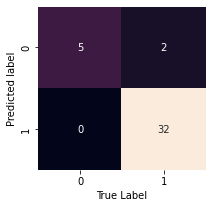

In [ ]:
plot_conf_mat(y_test, m_pred_y)

Ensemble model ROC curve plot

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:1505: UserWarning: Setting penalty='none' will ignore the C and l1_ratio parameters
  "Setting penalty='none' will ignore the C and l1_ratio "
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Unsupported set of arguments: The combination of penalty='l1' and loss='squared_hinge' are not supported when dual=True, Parameters: penalty='l1', loss='squared_hinge', dual=True

  FitFailedWarning)
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to 

Fitting 5 folds for each of 64 candidates, totalling 320 fits
[CV] C=400, dual=True, loss=squared_hinge, penalty=l1, tol=1e-05 .....
[CV]  C=400, dual=True, loss=squared_hinge, penalty=l1, tol=1e-05, total=   0.0s
[CV] C=400, dual=True, loss=squared_hinge, penalty=l1, tol=1e-05 .....
[CV]  C=400, dual=True, loss=squared_hinge, penalty=l1, tol=1e-05, total=   0.0s
[CV] C=400, dual=True, loss=squared_hinge, penalty=l1, tol=1e-05 .....
[CV]  C=400, dual=True, loss=squared_hinge, penalty=l1, tol=1e-05, total=   0.0s
[CV] C=400, dual=True, loss=squared_hinge, penalty=l1, tol=1e-05 .....
[CV]  C=400, dual=True, loss=squared_hinge, penalty=l1, tol=1e-05, total=   0.0s
[CV] C=400, dual=True, loss=squared_hinge, penalty=l1, tol=1e-05 .....
[CV]  C=400, dual=True, loss=squared_hinge, penalty=l1, tol=1e-05, total=   0.0s
[CV] C=400, dual=True, loss=squared_hinge, penalty=l1, tol=1e-07 .....
[CV]  C=400, dual=True, loss=squared_hinge, penalty=l1, tol=1e-07, total=   0.0s
[CV] C=400, dual=True, los

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarn

[CV]  C=400, dual=False, loss=squared_hinge, penalty=l1, tol=1e-05, total=   0.0s
[CV] C=400, dual=False, loss=squared_hinge, penalty=l1, tol=1e-05 ....
[CV]  C=400, dual=False, loss=squared_hinge, penalty=l1, tol=1e-05, total=   0.0s
[CV] C=400, dual=False, loss=squared_hinge, penalty=l1, tol=1e-05 ....
[CV]  C=400, dual=False, loss=squared_hinge, penalty=l1, tol=1e-05, total=   0.0s
[CV] C=400, dual=False, loss=squared_hinge, penalty=l1, tol=1e-05 ....
[CV]  C=400, dual=False, loss=squared_hinge, penalty=l1, tol=1e-05, total=   0.0s
[CV] C=400, dual=False, loss=squared_hinge, penalty=l1, tol=1e-05 ....
[CV]  C=400, dual=False, loss=squared_hinge, penalty=l1, tol=1e-05, total=   0.0s
[CV] C=400, dual=False, loss=squared_hinge, penalty=l1, tol=1e-07 ....
[CV]  C=400, dual=False, loss=squared_hinge, penalty=l1, tol=1e-07, total=   0.0s
[CV] C=400, dual=False, loss=squared_hinge, penalty=l1, tol=1e-07 ....
[CV]  C=400, dual=False, loss=squared_hinge, penalty=l1, tol=1e-07, total=   0.0s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Unsupported set of arguments: The combination of penalty='l1' and loss='hinge' is not supported, Parameters: penalty='l1', loss='hinge', dual=False

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Unsupported set of arguments: The combination of penalty='l1' and loss='hinge' is not supported, Parameters: penalty='l1', loss='hinge', dual=False

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 

[CV]  C=450, dual=True, loss=squared_hinge, penalty=l1, tol=1e-07, total=   0.0s
[CV] C=450, dual=True, loss=squared_hinge, penalty=l1, tol=1e-07 .....
[CV]  C=450, dual=True, loss=squared_hinge, penalty=l1, tol=1e-07, total=   0.0s
[CV] C=450, dual=True, loss=squared_hinge, penalty=l1, tol=1e-07 .....
[CV]  C=450, dual=True, loss=squared_hinge, penalty=l1, tol=1e-07, total=   0.0s
[CV] C=450, dual=True, loss=squared_hinge, penalty=l1, tol=1e-07 .....
[CV]  C=450, dual=True, loss=squared_hinge, penalty=l1, tol=1e-07, total=   0.0s
[CV] C=450, dual=True, loss=squared_hinge, penalty=l1, tol=1e-07 .....
[CV]  C=450, dual=True, loss=squared_hinge, penalty=l1, tol=1e-07, total=   0.0s
[CV] C=450, dual=True, loss=squared_hinge, penalty=l2, tol=1e-05 .....
[CV]  C=450, dual=True, loss=squared_hinge, penalty=l2, tol=1e-05, total=   0.0s
[CV] C=450, dual=True, loss=squared_hinge, penalty=l2, tol=1e-05 .....
[CV]  C=450, dual=True, loss=squared_hinge, penalty=l2, tol=1e-05, total=   0.0s
[CV] C=

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarn

[CV]  C=450, dual=False, loss=squared_hinge, penalty=l1, tol=1e-05, total=   0.0s
[CV] C=450, dual=False, loss=squared_hinge, penalty=l1, tol=1e-05 ....
[CV]  C=450, dual=False, loss=squared_hinge, penalty=l1, tol=1e-05, total=   0.0s
[CV] C=450, dual=False, loss=squared_hinge, penalty=l1, tol=1e-05 ....
[CV]  C=450, dual=False, loss=squared_hinge, penalty=l1, tol=1e-05, total=   0.0s
[CV] C=450, dual=False, loss=squared_hinge, penalty=l1, tol=1e-07 ....
[CV]  C=450, dual=False, loss=squared_hinge, penalty=l1, tol=1e-07, total=   0.0s
[CV] C=450, dual=False, loss=squared_hinge, penalty=l1, tol=1e-07 ....
[CV]  C=450, dual=False, loss=squared_hinge, penalty=l1, tol=1e-07, total=   0.0s
[CV] C=450, dual=False, loss=squared_hinge, penalty=l1, tol=1e-07 ....
[CV]  C=450, dual=False, loss=squared_hinge, penalty=l1, tol=1e-07, total=   0.0s
[CV] C=450, dual=False, loss=squared_hinge, penalty=l1, tol=1e-07 ....
[CV]  C=450, dual=False, loss=squared_hinge, penalty=l1, tol=1e-07, total=   0.0s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Unsupported set of arguments: The combination of penalty='l2' and loss='hinge' are not supported when dual=False, Parameters: penalty='l2', loss='hinge', dual=False

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Unsupported set of arguments: The combination of penalty='l2' and loss='hinge' are not supported when dual=False, Parameters: penalty='l2', loss='hinge', dual=False

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parame

[CV]  C=500, dual=True, loss=squared_hinge, penalty=l2, tol=1e-05, total=   0.0s
[CV] C=500, dual=True, loss=squared_hinge, penalty=l2, tol=1e-05 .....
[CV]  C=500, dual=True, loss=squared_hinge, penalty=l2, tol=1e-05, total=   0.0s
[CV] C=500, dual=True, loss=squared_hinge, penalty=l2, tol=1e-05 .....
[CV]  C=500, dual=True, loss=squared_hinge, penalty=l2, tol=1e-05, total=   0.0s
[CV] C=500, dual=True, loss=squared_hinge, penalty=l2, tol=1e-05 .....
[CV]  C=500, dual=True, loss=squared_hinge, penalty=l2, tol=1e-05, total=   0.0s
[CV] C=500, dual=True, loss=squared_hinge, penalty=l2, tol=1e-05 .....
[CV]  C=500, dual=True, loss=squared_hinge, penalty=l2, tol=1e-05, total=   0.0s
[CV] C=500, dual=True, loss=squared_hinge, penalty=l2, tol=1e-07 .....
[CV]  C=500, dual=True, loss=squared_hinge, penalty=l2, tol=1e-07, total=   0.0s
[CV] C=500, dual=True, loss=squared_hinge, penalty=l2, tol=1e-07 .....
[CV]  C=500, dual=True, loss=squared_hinge, penalty=l2, tol=1e-07, total=   0.0s
[CV] C=

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarn

[CV]  C=500, dual=False, loss=squared_hinge, penalty=l1, tol=1e-05, total=   0.0s
[CV] C=500, dual=False, loss=squared_hinge, penalty=l1, tol=1e-05 ....
[CV]  C=500, dual=False, loss=squared_hinge, penalty=l1, tol=1e-05, total=   0.0s
[CV] C=500, dual=False, loss=squared_hinge, penalty=l1, tol=1e-05 ....
[CV]  C=500, dual=False, loss=squared_hinge, penalty=l1, tol=1e-05, total=   0.0s
[CV] C=500, dual=False, loss=squared_hinge, penalty=l1, tol=1e-07 ....
[CV]  C=500, dual=False, loss=squared_hinge, penalty=l1, tol=1e-07, total=   0.0s
[CV] C=500, dual=False, loss=squared_hinge, penalty=l1, tol=1e-07 ....
[CV]  C=500, dual=False, loss=squared_hinge, penalty=l1, tol=1e-07, total=   0.0s
[CV] C=500, dual=False, loss=squared_hinge, penalty=l1, tol=1e-07 ....
[CV]  C=500, dual=False, loss=squared_hinge, penalty=l1, tol=1e-07, total=   0.0s
[CV] C=500, dual=False, loss=squared_hinge, penalty=l1, tol=1e-07 ....
[CV]  C=500, dual=False, loss=squared_hinge, penalty=l1, tol=1e-07, total=   0.0s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Unsupported set of arguments: The combination of penalty='l2' and loss='hinge' are not supported when dual=False, Parameters: penalty='l2', loss='hinge', dual=False

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Unsupported set of arguments: The combination of penalty='l2' and loss='hinge' are not supported when dual=False, Parameters: penalty='l2', loss='hinge', dual=False

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parame

[CV]  C=550, dual=True, loss=squared_hinge, penalty=l2, tol=1e-05, total=   0.0s
[CV] C=550, dual=True, loss=squared_hinge, penalty=l2, tol=1e-05 .....
[CV]  C=550, dual=True, loss=squared_hinge, penalty=l2, tol=1e-05, total=   0.0s
[CV] C=550, dual=True, loss=squared_hinge, penalty=l2, tol=1e-05 .....
[CV]  C=550, dual=True, loss=squared_hinge, penalty=l2, tol=1e-05, total=   0.0s
[CV] C=550, dual=True, loss=squared_hinge, penalty=l2, tol=1e-05 .....
[CV]  C=550, dual=True, loss=squared_hinge, penalty=l2, tol=1e-05, total=   0.0s
[CV] C=550, dual=True, loss=squared_hinge, penalty=l2, tol=1e-07 .....
[CV]  C=550, dual=True, loss=squared_hinge, penalty=l2, tol=1e-07, total=   0.0s
[CV] C=550, dual=True, loss=squared_hinge, penalty=l2, tol=1e-07 .....
[CV]  C=550, dual=True, loss=squared_hinge, penalty=l2, tol=1e-07, total=   0.0s
[CV] C=550, dual=True, loss=squared_hinge, penalty=l2, tol=1e-07 .....
[CV]  C=550, dual=True, loss=squared_hinge, penalty=l2, tol=1e-07, total=   0.0s
[CV] C=

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarn

[CV]  C=550, dual=False, loss=squared_hinge, penalty=l1, tol=1e-05, total=   0.0s
[CV] C=550, dual=False, loss=squared_hinge, penalty=l1, tol=1e-07 ....
[CV]  C=550, dual=False, loss=squared_hinge, penalty=l1, tol=1e-07, total=   0.0s
[CV] C=550, dual=False, loss=squared_hinge, penalty=l1, tol=1e-07 ....
[CV]  C=550, dual=False, loss=squared_hinge, penalty=l1, tol=1e-07, total=   0.0s
[CV] C=550, dual=False, loss=squared_hinge, penalty=l1, tol=1e-07 ....
[CV]  C=550, dual=False, loss=squared_hinge, penalty=l1, tol=1e-07, total=   0.0s
[CV] C=550, dual=False, loss=squared_hinge, penalty=l1, tol=1e-07 ....
[CV]  C=550, dual=False, loss=squared_hinge, penalty=l1, tol=1e-07, total=   0.0s
[CV] C=550, dual=False, loss=squared_hinge, penalty=l1, tol=1e-07 ....
[CV]  C=550, dual=False, loss=squared_hinge, penalty=l1, tol=1e-07, total=   0.0s
[CV] C=550, dual=False, loss=squared_hinge, penalty=l2, tol=1e-05 ....
[CV]  C=550, dual=False, loss=squared_hinge, penalty=l2, tol=1e-05, total=   0.0s


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Unsupported set of arguments: The combination of penalty='l1' and loss='squared_hinge' are not supported when dual=True, Parameters: penalty='l1', loss='squared_hinge', dual=True

  FitFailedWarning)
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Unsupported set of arguments: The combination of penalty='l1' and loss='squared_hinge' are not supported when dual=True, Parameters: penalty='l1', loss='squared_hinge', dual=True

  FitFail

[CV]  C=400, dual=True, loss=squared_hinge, penalty=l2, tol=1e-05, total=   0.0s
[CV] C=400, dual=True, loss=squared_hinge, penalty=l2, tol=1e-05 .....
[CV]  C=400, dual=True, loss=squared_hinge, penalty=l2, tol=1e-05, total=   0.0s
[CV] C=400, dual=True, loss=squared_hinge, penalty=l2, tol=1e-05 .....
[CV]  C=400, dual=True, loss=squared_hinge, penalty=l2, tol=1e-05, total=   0.0s
[CV] C=400, dual=True, loss=squared_hinge, penalty=l2, tol=1e-07 .....
[CV]  C=400, dual=True, loss=squared_hinge, penalty=l2, tol=1e-07, total=   0.0s
[CV] C=400, dual=True, loss=squared_hinge, penalty=l2, tol=1e-07 .....
[CV]  C=400, dual=True, loss=squared_hinge, penalty=l2, tol=1e-07, total=   0.0s
[CV] C=400, dual=True, loss=squared_hinge, penalty=l2, tol=1e-07 .....
[CV]  C=400, dual=True, loss=squared_hinge, penalty=l2, tol=1e-07, total=   0.0s
[CV] C=400, dual=True, loss=squared_hinge, penalty=l2, tol=1e-07 .....
[CV]  C=400, dual=True, loss=squared_hinge, penalty=l2, tol=1e-07, total=   0.0s
[CV] C=

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarn

[CV]  C=400, dual=False, loss=squared_hinge, penalty=l1, tol=1e-05, total=   0.0s
[CV] C=400, dual=False, loss=squared_hinge, penalty=l1, tol=1e-07 ....
[CV]  C=400, dual=False, loss=squared_hinge, penalty=l1, tol=1e-07, total=   0.0s
[CV] C=400, dual=False, loss=squared_hinge, penalty=l1, tol=1e-07 ....
[CV]  C=400, dual=False, loss=squared_hinge, penalty=l1, tol=1e-07, total=   0.0s
[CV] C=400, dual=False, loss=squared_hinge, penalty=l1, tol=1e-07 ....
[CV]  C=400, dual=False, loss=squared_hinge, penalty=l1, tol=1e-07, total=   0.0s
[CV] C=400, dual=False, loss=squared_hinge, penalty=l1, tol=1e-07 ....
[CV]  C=400, dual=False, loss=squared_hinge, penalty=l1, tol=1e-07, total=   0.0s
[CV] C=400, dual=False, loss=squared_hinge, penalty=l1, tol=1e-07 ....
[CV]  C=400, dual=False, loss=squared_hinge, penalty=l1, tol=1e-07, total=   0.0s
[CV] C=400, dual=False, loss=squared_hinge, penalty=l2, tol=1e-05 ....
[CV]  C=400, dual=False, loss=squared_hinge, penalty=l2, tol=1e-05, total=   0.0s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Unsupported set of arguments: The combination of penalty='l1' and loss='squared_hinge' are not supported when dual=True, Parameters: penalty='l1', loss='squared_hinge', dual=True

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Unsupported set of arguments: The combination of penalty='l1' and loss='squared_hinge' are not supported when dual=True, Parameters: penalty='l1', loss='squared_hinge', dual=True

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-tes

[CV]  C=450, dual=True, loss=squared_hinge, penalty=l2, tol=1e-05, total=   0.0s
[CV] C=450, dual=True, loss=squared_hinge, penalty=l2, tol=1e-07 .....
[CV]  C=450, dual=True, loss=squared_hinge, penalty=l2, tol=1e-07, total=   0.0s
[CV] C=450, dual=True, loss=squared_hinge, penalty=l2, tol=1e-07 .....
[CV]  C=450, dual=True, loss=squared_hinge, penalty=l2, tol=1e-07, total=   0.0s
[CV] C=450, dual=True, loss=squared_hinge, penalty=l2, tol=1e-07 .....
[CV]  C=450, dual=True, loss=squared_hinge, penalty=l2, tol=1e-07, total=   0.0s
[CV] C=450, dual=True, loss=squared_hinge, penalty=l2, tol=1e-07 .....
[CV]  C=450, dual=True, loss=squared_hinge, penalty=l2, tol=1e-07, total=   0.0s
[CV] C=450, dual=True, loss=squared_hinge, penalty=l2, tol=1e-07 .....
[CV]  C=450, dual=True, loss=squared_hinge, penalty=l2, tol=1e-07, total=   0.0s
[CV] C=450, dual=True, loss=hinge, penalty=l1, tol=1e-05 .............
[CV]  C=450, dual=True, loss=hinge, penalty=l1, tol=1e-05, total=   0.0s
[CV] C=450, dua

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarn

[CV]  C=450, dual=False, loss=squared_hinge, penalty=l1, tol=1e-05, total=   0.0s
[CV] C=450, dual=False, loss=squared_hinge, penalty=l1, tol=1e-07 ....
[CV]  C=450, dual=False, loss=squared_hinge, penalty=l1, tol=1e-07, total=   0.0s
[CV] C=450, dual=False, loss=squared_hinge, penalty=l1, tol=1e-07 ....
[CV]  C=450, dual=False, loss=squared_hinge, penalty=l1, tol=1e-07, total=   0.0s
[CV] C=450, dual=False, loss=squared_hinge, penalty=l1, tol=1e-07 ....
[CV]  C=450, dual=False, loss=squared_hinge, penalty=l1, tol=1e-07, total=   0.0s
[CV] C=450, dual=False, loss=squared_hinge, penalty=l1, tol=1e-07 ....
[CV]  C=450, dual=False, loss=squared_hinge, penalty=l1, tol=1e-07, total=   0.0s
[CV] C=450, dual=False, loss=squared_hinge, penalty=l1, tol=1e-07 ....
[CV]  C=450, dual=False, loss=squared_hinge, penalty=l1, tol=1e-07, total=   0.0s
[CV] C=450, dual=False, loss=squared_hinge, penalty=l2, tol=1e-05 ....
[CV]  C=450, dual=False, loss=squared_hinge, penalty=l2, tol=1e-05, total=   0.0s


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarn

[CV]  C=500, dual=True, loss=squared_hinge, penalty=l2, tol=1e-05, total=   0.0s
[CV] C=500, dual=True, loss=squared_hinge, penalty=l2, tol=1e-05 .....
[CV]  C=500, dual=True, loss=squared_hinge, penalty=l2, tol=1e-05, total=   0.0s
[CV] C=500, dual=True, loss=squared_hinge, penalty=l2, tol=1e-07 .....
[CV]  C=500, dual=True, loss=squared_hinge, penalty=l2, tol=1e-07, total=   0.0s
[CV] C=500, dual=True, loss=squared_hinge, penalty=l2, tol=1e-07 .....
[CV]  C=500, dual=True, loss=squared_hinge, penalty=l2, tol=1e-07, total=   0.0s
[CV] C=500, dual=True, loss=squared_hinge, penalty=l2, tol=1e-07 .....
[CV]  C=500, dual=True, loss=squared_hinge, penalty=l2, tol=1e-07, total=   0.0s
[CV] C=500, dual=True, loss=squared_hinge, penalty=l2, tol=1e-07 .....
[CV]  C=500, dual=True, loss=squared_hinge, penalty=l2, tol=1e-07, total=   0.0s
[CV] C=500, dual=True, loss=squared_hinge, penalty=l2, tol=1e-07 .....
[CV]  C=500, dual=True, loss=squared_hinge, penalty=l2, tol=1e-07, total=   0.0s
[CV] C=

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarn

[CV]  C=500, dual=False, loss=squared_hinge, penalty=l1, tol=1e-07, total=   0.0s
[CV] C=500, dual=False, loss=squared_hinge, penalty=l1, tol=1e-07 ....
[CV]  C=500, dual=False, loss=squared_hinge, penalty=l1, tol=1e-07, total=   0.0s
[CV] C=500, dual=False, loss=squared_hinge, penalty=l1, tol=1e-07 ....
[CV]  C=500, dual=False, loss=squared_hinge, penalty=l1, tol=1e-07, total=   0.0s
[CV] C=500, dual=False, loss=squared_hinge, penalty=l1, tol=1e-07 ....
[CV]  C=500, dual=False, loss=squared_hinge, penalty=l1, tol=1e-07, total=   0.0s
[CV] C=500, dual=False, loss=squared_hinge, penalty=l1, tol=1e-07 ....
[CV]  C=500, dual=False, loss=squared_hinge, penalty=l1, tol=1e-07, total=   0.0s
[CV] C=500, dual=False, loss=squared_hinge, penalty=l2, tol=1e-05 ....
[CV]  C=500, dual=False, loss=squared_hinge, penalty=l2, tol=1e-05, total=   0.0s
[CV] C=500, dual=False, loss=squared_hinge, penalty=l2, tol=1e-05 ....
[CV]  C=500, dual=False, loss=squared_hinge, penalty=l2, tol=1e-05, total=   0.0s


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarn

[CV]  C=550, dual=True, loss=squared_hinge, penalty=l2, tol=1e-07, total=   0.0s
[CV] C=550, dual=True, loss=squared_hinge, penalty=l2, tol=1e-07 .....
[CV]  C=550, dual=True, loss=squared_hinge, penalty=l2, tol=1e-07, total=   0.0s
[CV] C=550, dual=True, loss=squared_hinge, penalty=l2, tol=1e-07 .....
[CV]  C=550, dual=True, loss=squared_hinge, penalty=l2, tol=1e-07, total=   0.0s
[CV] C=550, dual=True, loss=squared_hinge, penalty=l2, tol=1e-07 .....
[CV]  C=550, dual=True, loss=squared_hinge, penalty=l2, tol=1e-07, total=   0.0s
[CV] C=550, dual=True, loss=squared_hinge, penalty=l2, tol=1e-07 .....
[CV]  C=550, dual=True, loss=squared_hinge, penalty=l2, tol=1e-07, total=   0.0s
[CV] C=550, dual=True, loss=hinge, penalty=l1, tol=1e-05 .............
[CV]  C=550, dual=True, loss=hinge, penalty=l1, tol=1e-05, total=   0.0s
[CV] C=550, dual=True, loss=hinge, penalty=l1, tol=1e-05 .............
[CV]  C=550, dual=True, loss=hinge, penalty=l1, tol=1e-05, total=   0.0s
[CV] C=550, dual=True, 

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarn

[CV]  C=550, dual=False, loss=squared_hinge, penalty=l1, tol=1e-07, total=   0.0s
[CV] C=550, dual=False, loss=squared_hinge, penalty=l1, tol=1e-07 ....
[CV]  C=550, dual=False, loss=squared_hinge, penalty=l1, tol=1e-07, total=   0.0s
[CV] C=550, dual=False, loss=squared_hinge, penalty=l1, tol=1e-07 ....
[CV]  C=550, dual=False, loss=squared_hinge, penalty=l1, tol=1e-07, total=   0.0s
[CV] C=550, dual=False, loss=squared_hinge, penalty=l2, tol=1e-05 ....
[CV]  C=550, dual=False, loss=squared_hinge, penalty=l2, tol=1e-05, total=   0.0s
[CV] C=550, dual=False, loss=squared_hinge, penalty=l2, tol=1e-05 ....
[CV]  C=550, dual=False, loss=squared_hinge, penalty=l2, tol=1e-05, total=   0.0s
[CV] C=550, dual=False, loss=squared_hinge, penalty=l2, tol=1e-05 ....
[CV]  C=550, dual=False, loss=squared_hinge, penalty=l2, tol=1e-05, total=   0.0s
[CV] C=550, dual=False, loss=squared_hinge, penalty=l2, tol=1e-05 ....
[CV]  C=550, dual=False, loss=squared_hinge, penalty=l2, tol=1e-05, total=   0.0s


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarn

[CV]  C=400, dual=True, loss=squared_hinge, penalty=l2, tol=1e-07, total=   0.0s
[CV] C=400, dual=True, loss=squared_hinge, penalty=l2, tol=1e-07 .....
[CV]  C=400, dual=True, loss=squared_hinge, penalty=l2, tol=1e-07, total=   0.0s
[CV] C=400, dual=True, loss=squared_hinge, penalty=l2, tol=1e-07 .....
[CV]  C=400, dual=True, loss=squared_hinge, penalty=l2, tol=1e-07, total=   0.0s
[CV] C=400, dual=True, loss=hinge, penalty=l1, tol=1e-05 .............
[CV]  C=400, dual=True, loss=hinge, penalty=l1, tol=1e-05, total=   0.0s
[CV] C=400, dual=True, loss=hinge, penalty=l1, tol=1e-05 .............
[CV]  C=400, dual=True, loss=hinge, penalty=l1, tol=1e-05, total=   0.0s
[CV] C=400, dual=True, loss=hinge, penalty=l1, tol=1e-05 .............
[CV]  C=400, dual=True, loss=hinge, penalty=l1, tol=1e-05, total=   0.0s
[CV] C=400, dual=True, loss=hinge, penalty=l1, tol=1e-05 .............
[CV]  C=400, dual=True, loss=hinge, penalty=l1, tol=1e-05, total=   0.0s
[CV] C=400, dual=True, loss=hinge, pena

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarn

[CV]  C=400, dual=False, loss=squared_hinge, penalty=l1, tol=1e-07, total=   0.0s
[CV] C=400, dual=False, loss=squared_hinge, penalty=l1, tol=1e-07 ....
[CV]  C=400, dual=False, loss=squared_hinge, penalty=l1, tol=1e-07, total=   0.0s
[CV] C=400, dual=False, loss=squared_hinge, penalty=l2, tol=1e-05 ....
[CV]  C=400, dual=False, loss=squared_hinge, penalty=l2, tol=1e-05, total=   0.0s
[CV] C=400, dual=False, loss=squared_hinge, penalty=l2, tol=1e-05 ....
[CV]  C=400, dual=False, loss=squared_hinge, penalty=l2, tol=1e-05, total=   0.0s
[CV] C=400, dual=False, loss=squared_hinge, penalty=l2, tol=1e-05 ....
[CV]  C=400, dual=False, loss=squared_hinge, penalty=l2, tol=1e-05, total=   0.0s
[CV] C=400, dual=False, loss=squared_hinge, penalty=l2, tol=1e-05 ....
[CV]  C=400, dual=False, loss=squared_hinge, penalty=l2, tol=1e-05, total=   0.0s
[CV] C=400, dual=False, loss=squared_hinge, penalty=l2, tol=1e-05 ....
[CV]  C=400, dual=False, loss=squared_hinge, penalty=l2, tol=1e-05, total=   0.0s


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set t

[CV]  C=450, dual=True, loss=hinge, penalty=l1, tol=1e-05, total=   0.0s
[CV] C=450, dual=True, loss=hinge, penalty=l1, tol=1e-05 .............
[CV]  C=450, dual=True, loss=hinge, penalty=l1, tol=1e-05, total=   0.0s
[CV] C=450, dual=True, loss=hinge, penalty=l1, tol=1e-07 .............
[CV]  C=450, dual=True, loss=hinge, penalty=l1, tol=1e-07, total=   0.0s
[CV] C=450, dual=True, loss=hinge, penalty=l1, tol=1e-07 .............
[CV]  C=450, dual=True, loss=hinge, penalty=l1, tol=1e-07, total=   0.0s
[CV] C=450, dual=True, loss=hinge, penalty=l1, tol=1e-07 .............
[CV]  C=450, dual=True, loss=hinge, penalty=l1, tol=1e-07, total=   0.0s
[CV] C=450, dual=True, loss=hinge, penalty=l1, tol=1e-07 .............
[CV]  C=450, dual=True, loss=hinge, penalty=l1, tol=1e-07, total=   0.0s
[CV] C=450, dual=True, loss=hinge, penalty=l1, tol=1e-07 .............
[CV]  C=450, dual=True, loss=hinge, penalty=l1, tol=1e-07, total=   0.0s
[CV] C=450, dual=True, loss=hinge, penalty=l2, tol=1e-05 ......

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Unsupported set of arguments: The combination of penalty='l1' and loss='hinge' is not supported, Parameters: penalty='l1', loss='hinge', dual=False

  FitFailedWarning)
/us

[CV]  C=450, dual=False, loss=squared_hinge, penalty=l2, tol=1e-05, total=   0.0s
[CV] C=450, dual=False, loss=squared_hinge, penalty=l2, tol=1e-05 ....
[CV]  C=450, dual=False, loss=squared_hinge, penalty=l2, tol=1e-05, total=   0.0s
[CV] C=450, dual=False, loss=squared_hinge, penalty=l2, tol=1e-07 ....
[CV]  C=450, dual=False, loss=squared_hinge, penalty=l2, tol=1e-07, total=   0.0s
[CV] C=450, dual=False, loss=squared_hinge, penalty=l2, tol=1e-07 ....
[CV]  C=450, dual=False, loss=squared_hinge, penalty=l2, tol=1e-07, total=   0.0s
[CV] C=450, dual=False, loss=squared_hinge, penalty=l2, tol=1e-07 ....
[CV]  C=450, dual=False, loss=squared_hinge, penalty=l2, tol=1e-07, total=   0.0s
[CV] C=450, dual=False, loss=squared_hinge, penalty=l2, tol=1e-07 ....
[CV]  C=450, dual=False, loss=squared_hinge, penalty=l2, tol=1e-07, total=   0.0s
[CV] C=450, dual=False, loss=squared_hinge, penalty=l2, tol=1e-07 ....
[CV]  C=450, dual=False, loss=squared_hinge, penalty=l2, tol=1e-07, total=   0.0s


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Unsupported set of arguments: The combination of penalty='l1' and loss='hinge' is not supported, Parameters: penalty='l1', loss='hinge', dual=True

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Unsupported set of arguments: The combination of penalty='l1' and loss='hinge' is not supported, Parameters: penalty='l1', loss='hinge', dual=True

  FitFailedWarning)
/usr/local/li

[CV]  C=500, dual=True, loss=hinge, penalty=l2, tol=1e-05, total=   0.0s
[CV] C=500, dual=True, loss=hinge, penalty=l2, tol=1e-05 .............
[CV]  C=500, dual=True, loss=hinge, penalty=l2, tol=1e-05, total=   0.0s
[CV] C=500, dual=True, loss=hinge, penalty=l2, tol=1e-05 .............
[CV]  C=500, dual=True, loss=hinge, penalty=l2, tol=1e-05, total=   0.0s
[CV] C=500, dual=True, loss=hinge, penalty=l2, tol=1e-05 .............
[CV]  C=500, dual=True, loss=hinge, penalty=l2, tol=1e-05, total=   0.0s
[CV] C=500, dual=True, loss=hinge, penalty=l2, tol=1e-05 .............
[CV]  C=500, dual=True, loss=hinge, penalty=l2, tol=1e-05, total=   0.0s
[CV] C=500, dual=True, loss=hinge, penalty=l2, tol=1e-07 .............
[CV]  C=500, dual=True, loss=hinge, penalty=l2, tol=1e-07, total=   0.0s
[CV] C=500, dual=True, loss=hinge, penalty=l2, tol=1e-07 .............
[CV]  C=500, dual=True, loss=hinge, penalty=l2, tol=1e-07, total=   0.0s
[CV] C=500, dual=True, loss=hinge, penalty=l2, tol=1e-07 ......

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Unsupported set of arguments: The combination of penalty='l1' and loss='hinge' is not supported, Parameters: penalty='l1', loss='hinge', dual=False

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. D


[CV]  C=500, dual=False, loss=squared_hinge, penalty=l2, tol=1e-05, total=   0.0s
[CV] C=500, dual=False, loss=squared_hinge, penalty=l2, tol=1e-05 ....
[CV]  C=500, dual=False, loss=squared_hinge, penalty=l2, tol=1e-05, total=   0.0s
[CV] C=500, dual=False, loss=squared_hinge, penalty=l2, tol=1e-05 ....
[CV]  C=500, dual=False, loss=squared_hinge, penalty=l2, tol=1e-05, total=   0.0s
[CV] C=500, dual=False, loss=squared_hinge, penalty=l2, tol=1e-05 ....
[CV]  C=500, dual=False, loss=squared_hinge, penalty=l2, tol=1e-05, total=   0.0s
[CV] C=500, dual=False, loss=squared_hinge, penalty=l2, tol=1e-05 ....
[CV]  C=500, dual=False, loss=squared_hinge, penalty=l2, tol=1e-05, total=   0.0s
[CV] C=500, dual=False, loss=squared_hinge, penalty=l2, tol=1e-07 ....
[CV]  C=500, dual=False, loss=squared_hinge, penalty=l2, tol=1e-07, total=   0.0s
[CV] C=500, dual=False, loss=squared_hinge, penalty=l2, tol=1e-07 ....
[CV]  C=500, dual=False, loss=squared_hinge, penalty=l2, tol=1e-07, total=   0.0s

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Unsupported set of arguments: The combination of penalty='l1' and loss='hinge' is not supported, Parameters: penalty='l1', loss='hinge', dual=True

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Unsupported set of arguments: The combination of penalty='l1' and loss='hinge' is not supported, Parameters: penalty='l1', loss='hinge', dual=True

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
V

[CV]  C=550, dual=True, loss=hinge, penalty=l2, tol=1e-05, total=   0.0s
[CV] C=550, dual=True, loss=hinge, penalty=l2, tol=1e-05 .............
[CV]  C=550, dual=True, loss=hinge, penalty=l2, tol=1e-05, total=   0.0s
[CV] C=550, dual=True, loss=hinge, penalty=l2, tol=1e-05 .............
[CV]  C=550, dual=True, loss=hinge, penalty=l2, tol=1e-05, total=   0.0s
[CV] C=550, dual=True, loss=hinge, penalty=l2, tol=1e-05 .............
[CV]  C=550, dual=True, loss=hinge, penalty=l2, tol=1e-05, total=   0.0s
[CV] C=550, dual=True, loss=hinge, penalty=l2, tol=1e-07 .............
[CV]  C=550, dual=True, loss=hinge, penalty=l2, tol=1e-07, total=   0.0s
[CV] C=550, dual=True, loss=hinge, penalty=l2, tol=1e-07 .............
[CV]  C=550, dual=True, loss=hinge, penalty=l2, tol=1e-07, total=   0.0s
[CV] C=550, dual=True, loss=hinge, penalty=l2, tol=1e-07 .............
[CV]  C=550, dual=True, loss=hinge, penalty=l2, tol=1e-07, total=   0.0s
[CV] C=550, dual=True, loss=hinge, penalty=l2, tol=1e-07 ......

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Unsupported set of arguments: The combination of penalty='l1' and loss='hinge' is not supported, Parameters: penalty='l1', loss='hinge', dual=False

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Unsupported set of arguments: The combination of penalty='l1' and loss='hinge' is not supported, Parameters: penalty='l1', loss='hinge', dual=False

  FitFailedWarning)
/usr/local/

[CV]  C=550, dual=False, loss=squared_hinge, penalty=l2, tol=1e-07, total=   0.0s
[CV] C=550, dual=False, loss=squared_hinge, penalty=l2, tol=1e-07 ....
[CV]  C=550, dual=False, loss=squared_hinge, penalty=l2, tol=1e-07, total=   0.0s
[CV] C=550, dual=False, loss=squared_hinge, penalty=l2, tol=1e-07 ....
[CV]  C=550, dual=False, loss=squared_hinge, penalty=l2, tol=1e-07, total=   0.0s
[CV] C=550, dual=False, loss=squared_hinge, penalty=l2, tol=1e-07 ....
[CV]  C=550, dual=False, loss=squared_hinge, penalty=l2, tol=1e-07, total=   0.0s
[CV] C=550, dual=False, loss=squared_hinge, penalty=l2, tol=1e-07 ....
[CV]  C=550, dual=False, loss=squared_hinge, penalty=l2, tol=1e-07, total=   0.0s
[CV] C=550, dual=False, loss=hinge, penalty=l1, tol=1e-05 ............
[CV]  C=550, dual=False, loss=hinge, penalty=l1, tol=1e-05, total=   0.0s
[CV] C=550, dual=False, loss=hinge, penalty=l1, tol=1e-05 ............
[CV]  C=550, dual=False, loss=hinge, penalty=l1, tol=1e-05, total=   0.0s
[CV] C=550, dual

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Unsupported set of arguments: The combination of penalty='l1' and loss='hinge' is not supported, Parameters: penalty='l1', loss='hinge', dual=True

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Unsupported set of arguments: The combination of penalty='l1' and loss='hinge' is not supported, Parameters: penalty='l1', loss='hinge', dual=True

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
V

[CV]  C=400, dual=True, loss=hinge, penalty=l2, tol=1e-05, total=   0.0s
[CV] C=400, dual=True, loss=hinge, penalty=l2, tol=1e-05 .............
[CV]  C=400, dual=True, loss=hinge, penalty=l2, tol=1e-05, total=   0.0s
[CV] C=400, dual=True, loss=hinge, penalty=l2, tol=1e-05 .............
[CV]  C=400, dual=True, loss=hinge, penalty=l2, tol=1e-05, total=   0.0s
[CV] C=400, dual=True, loss=hinge, penalty=l2, tol=1e-05 .............
[CV]  C=400, dual=True, loss=hinge, penalty=l2, tol=1e-05, total=   0.0s
[CV] C=400, dual=True, loss=hinge, penalty=l2, tol=1e-05 .............
[CV]  C=400, dual=True, loss=hinge, penalty=l2, tol=1e-05, total=   0.0s
[CV] C=400, dual=True, loss=hinge, penalty=l2, tol=1e-07 .............
[CV]  C=400, dual=True, loss=hinge, penalty=l2, tol=1e-07, total=   0.0s
[CV] C=400, dual=True, loss=hinge, penalty=l2, tol=1e-07 .............
[CV]  C=400, dual=True, loss=hinge, penalty=l2, tol=1e-07, total=   0.0s
[CV] C=400, dual=True, loss=hinge, penalty=l2, tol=1e-07 ......

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Unsupported set of arguments: The combination of penalty='l1' and loss='hinge' is not supported, Parameters: penalty='l1', loss='hinge', dual=False

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Unsupported set of arguments: The combination of penalty='l1' and loss='hinge' is not supported, Parameters: penalty='l1', loss='hinge', dual=False

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 

[CV] C=450, dual=True, loss=hinge, penalty=l2, tol=1e-05 .............
[CV]  C=450, dual=True, loss=hinge, penalty=l2, tol=1e-05, total=   0.0s
[CV] C=450, dual=True, loss=hinge, penalty=l2, tol=1e-07 .............
[CV]  C=450, dual=True, loss=hinge, penalty=l2, tol=1e-07, total=   0.0s
[CV] C=450, dual=True, loss=hinge, penalty=l2, tol=1e-07 .............
[CV]  C=450, dual=True, loss=hinge, penalty=l2, tol=1e-07, total=   0.0s
[CV] C=450, dual=True, loss=hinge, penalty=l2, tol=1e-07 .............
[CV]  C=450, dual=True, loss=hinge, penalty=l2, tol=1e-07, total=   0.0s
[CV] C=450, dual=True, loss=hinge, penalty=l2, tol=1e-07 .............
[CV]  C=450, dual=True, loss=hinge, penalty=l2, tol=1e-07, total=   0.0s
[CV] C=450, dual=True, loss=hinge, penalty=l2, tol=1e-07 .............
[CV]  C=450, dual=True, loss=hinge, penalty=l2, tol=1e-07, total=   0.0s
[CV] C=450, dual=False, loss=squared_hinge, penalty=l1, tol=1e-05 ....
[CV]  C=450, dual=False, loss=squared_hinge, penalty=l1, tol=1e-0

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarn

[CV]  C=450, dual=False, loss=hinge, penalty=l1, tol=1e-05, total=   0.0s
[CV] C=450, dual=False, loss=hinge, penalty=l1, tol=1e-05 ............
[CV]  C=450, dual=False, loss=hinge, penalty=l1, tol=1e-05, total=   0.0s
[CV] C=450, dual=False, loss=hinge, penalty=l1, tol=1e-05 ............
[CV]  C=450, dual=False, loss=hinge, penalty=l1, tol=1e-05, total=   0.0s
[CV] C=450, dual=False, loss=hinge, penalty=l1, tol=1e-07 ............
[CV]  C=450, dual=False, loss=hinge, penalty=l1, tol=1e-07, total=   0.0s
[CV] C=450, dual=False, loss=hinge, penalty=l1, tol=1e-07 ............
[CV]  C=450, dual=False, loss=hinge, penalty=l1, tol=1e-07, total=   0.0s
[CV] C=450, dual=False, loss=hinge, penalty=l1, tol=1e-07 ............
[CV]  C=450, dual=False, loss=hinge, penalty=l1, tol=1e-07, total=   0.0s
[CV] C=450, dual=False, loss=hinge, penalty=l1, tol=1e-07 ............
[CV]  C=450, dual=False, loss=hinge, penalty=l1, tol=1e-07, total=   0.0s
[CV] C=450, dual=False, loss=hinge, penalty=l1, tol=1e-0

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Unsupported set of arguments: The combination of penalty='l2' and loss='hinge' are not supported when dual=False, Parameters: penalty='l2', loss='hinge', dual=False

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Unsupported set of arguments: The combination of penalty='l2' and loss='hinge' are not supported when dual=False, Parameters: penalty='l2', loss='hinge', dual=False

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parame

[CV]  C=500, dual=True, loss=hinge, penalty=l2, tol=1e-07, total=   0.0s
[CV] C=500, dual=True, loss=hinge, penalty=l2, tol=1e-07 .............
[CV]  C=500, dual=True, loss=hinge, penalty=l2, tol=1e-07, total=   0.0s
[CV] C=500, dual=True, loss=hinge, penalty=l2, tol=1e-07 .............
[CV]  C=500, dual=True, loss=hinge, penalty=l2, tol=1e-07, total=   0.0s
[CV] C=500, dual=True, loss=hinge, penalty=l2, tol=1e-07 .............
[CV]  C=500, dual=True, loss=hinge, penalty=l2, tol=1e-07, total=   0.0s
[CV] C=500, dual=False, loss=squared_hinge, penalty=l1, tol=1e-05 ....
[CV]  C=500, dual=False, loss=squared_hinge, penalty=l1, tol=1e-05, total=   0.0s
[CV] C=500, dual=False, loss=squared_hinge, penalty=l1, tol=1e-05 ....
[CV]  C=500, dual=False, loss=squared_hinge, penalty=l1, tol=1e-05, total=   0.0s
[CV] C=500, dual=False, loss=squared_hinge, penalty=l1, tol=1e-05 ....
[CV]  C=500, dual=False, loss=squared_hinge, penalty=l1, tol=1e-05, total=   0.0s
[CV] C=500, dual=False, loss=squared

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarn

[CV]  C=500, dual=False, loss=hinge, penalty=l2, tol=1e-07, total=   0.0s
[CV] C=500, dual=False, loss=hinge, penalty=l2, tol=1e-07 ............
[CV]  C=500, dual=False, loss=hinge, penalty=l2, tol=1e-07, total=   0.0s
[CV] C=500, dual=False, loss=hinge, penalty=l2, tol=1e-07 ............
[CV]  C=500, dual=False, loss=hinge, penalty=l2, tol=1e-07, total=   0.0s
[CV] C=500, dual=False, loss=hinge, penalty=l2, tol=1e-07 ............
[CV]  C=500, dual=False, loss=hinge, penalty=l2, tol=1e-07, total=   0.0s
[CV] C=500, dual=False, loss=hinge, penalty=l2, tol=1e-07 ............
[CV]  C=500, dual=False, loss=hinge, penalty=l2, tol=1e-07, total=   0.0s
[CV] C=550, dual=True, loss=squared_hinge, penalty=l1, tol=1e-05 .....
[CV]  C=550, dual=True, loss=squared_hinge, penalty=l1, tol=1e-05, total=   0.0s
[CV] C=550, dual=True, loss=squared_hinge, penalty=l1, tol=1e-05 .....
[CV]  C=550, dual=True, loss=squared_hinge, penalty=l1, tol=1e-05, total=   0.0s
[CV] C=550, dual=True, loss=squared_hinge,

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Unsupported set of arguments: The combination of penalty='l1' and loss='squared_hinge' are not supported when dual=True, Parameters: penalty='l1', loss='squared_hinge', dual=True

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Unsupported set of arguments: The combination of penalty='l1' and loss='squared_hinge' are not supported when dual=True, Parameters: penalty='l1', loss='squared_hinge', dual=True

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-tes

[CV]  C=550, dual=False, loss=squared_hinge, penalty=l1, tol=1e-05, total=   0.0s
[CV] C=550, dual=False, loss=squared_hinge, penalty=l1, tol=1e-05 ....
[CV]  C=550, dual=False, loss=squared_hinge, penalty=l1, tol=1e-05, total=   0.0s
[CV] C=550, dual=False, loss=squared_hinge, penalty=l1, tol=1e-05 ....
[CV]  C=550, dual=False, loss=squared_hinge, penalty=l1, tol=1e-05, total=   0.0s
[CV] C=550, dual=False, loss=squared_hinge, penalty=l1, tol=1e-05 ....
[CV]  C=550, dual=False, loss=squared_hinge, penalty=l1, tol=1e-05, total=   0.0s
[CV] C=550, dual=False, loss=squared_hinge, penalty=l1, tol=1e-05 ....
[CV]  C=550, dual=False, loss=squared_hinge, penalty=l1, tol=1e-05, total=   0.0s
[CV] C=550, dual=False, loss=squared_hinge, penalty=l1, tol=1e-07 ....
[CV]  C=550, dual=False, loss=squared_hinge, penalty=l1, tol=1e-07, total=   0.0s
[CV] C=550, dual=False, loss=squared_hinge, penalty=l1, tol=1e-07 ....
[CV]  C=550, dual=False, loss=squared_hinge, penalty=l1, tol=1e-07, total=   0.0s


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarn

Fitting 5 folds for each of 64 candidates, totalling 320 fits
[CV] C=400, dual=True, loss=squared_hinge, penalty=l1, tol=1e-05 .....
[CV]  C=400, dual=True, loss=squared_hinge, penalty=l1, tol=1e-05, total=   0.0s
[CV] C=400, dual=True, loss=squared_hinge, penalty=l1, tol=1e-05 .....
[CV]  C=400, dual=True, loss=squared_hinge, penalty=l1, tol=1e-05, total=   0.0s
[CV] C=400, dual=True, loss=squared_hinge, penalty=l1, tol=1e-05 .....
[CV]  C=400, dual=True, loss=squared_hinge, penalty=l1, tol=1e-05, total=   0.0s
[CV] C=400, dual=True, loss=squared_hinge, penalty=l1, tol=1e-05 .....
[CV]  C=400, dual=True, loss=squared_hinge, penalty=l1, tol=1e-05, total=   0.0s
[CV] C=400, dual=True, loss=squared_hinge, penalty=l1, tol=1e-05 .....
[CV]  C=400, dual=True, loss=squared_hinge, penalty=l1, tol=1e-05, total=   0.0s
[CV] C=400, dual=True, loss=squared_hinge, penalty=l1, tol=1e-07 .....
[CV]  C=400, dual=True, loss=squared_hinge, penalty=l1, tol=1e-07, total=   0.0s
[CV] C=400, dual=True, los

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Unsupported set of arguments: The combination of penalty='l1' and loss='squared_hinge' are not supported when dual=True, Parameters: penalty='l1', loss='squared_hinge', dual=True

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Unsupported set of arguments: The combination of penalty='l1' and loss='squared_hinge' are not supported when dual=True, Parameters: penalty='l1', loss='squared_hinge', dual=True

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-tes

[CV]  C=400, dual=False, loss=squared_hinge, penalty=l1, tol=1e-05, total=   0.0s
[CV] C=400, dual=False, loss=squared_hinge, penalty=l1, tol=1e-05 ....
[CV]  C=400, dual=False, loss=squared_hinge, penalty=l1, tol=1e-05, total=   0.0s
[CV] C=400, dual=False, loss=squared_hinge, penalty=l1, tol=1e-05 ....
[CV]  C=400, dual=False, loss=squared_hinge, penalty=l1, tol=1e-05, total=   0.0s
[CV] C=400, dual=False, loss=squared_hinge, penalty=l1, tol=1e-07 ....
[CV]  C=400, dual=False, loss=squared_hinge, penalty=l1, tol=1e-07, total=   0.0s
[CV] C=400, dual=False, loss=squared_hinge, penalty=l1, tol=1e-07 ....
[CV]  C=400, dual=False, loss=squared_hinge, penalty=l1, tol=1e-07, total=   0.0s
[CV] C=400, dual=False, loss=squared_hinge, penalty=l1, tol=1e-07 ....
[CV]  C=400, dual=False, loss=squared_hinge, penalty=l1, tol=1e-07, total=   0.0s
[CV] C=400, dual=False, loss=squared_hinge, penalty=l1, tol=1e-07 ....
[CV]  C=400, dual=False, loss=squared_hinge, penalty=l1, tol=1e-07, total=   0.0s


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarn

[CV]  C=450, dual=True, loss=squared_hinge, penalty=l2, tol=1e-05, total=   0.0s
[CV] C=450, dual=True, loss=squared_hinge, penalty=l2, tol=1e-05 .....
[CV]  C=450, dual=True, loss=squared_hinge, penalty=l2, tol=1e-05, total=   0.0s
[CV] C=450, dual=True, loss=squared_hinge, penalty=l2, tol=1e-05 .....
[CV]  C=450, dual=True, loss=squared_hinge, penalty=l2, tol=1e-05, total=   0.0s
[CV] C=450, dual=True, loss=squared_hinge, penalty=l2, tol=1e-05 .....
[CV]  C=450, dual=True, loss=squared_hinge, penalty=l2, tol=1e-05, total=   0.0s
[CV] C=450, dual=True, loss=squared_hinge, penalty=l2, tol=1e-05 .....
[CV]  C=450, dual=True, loss=squared_hinge, penalty=l2, tol=1e-05, total=   0.0s
[CV] C=450, dual=True, loss=squared_hinge, penalty=l2, tol=1e-07 .....
[CV]  C=450, dual=True, loss=squared_hinge, penalty=l2, tol=1e-07, total=   0.0s
[CV] C=450, dual=True, loss=squared_hinge, penalty=l2, tol=1e-07 .....
[CV]  C=450, dual=True, loss=squared_hinge, penalty=l2, tol=1e-07, total=   0.0s
[CV] C=

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarn

[CV]  C=450, dual=False, loss=squared_hinge, penalty=l1, tol=1e-07, total=   0.0s
[CV] C=450, dual=False, loss=squared_hinge, penalty=l1, tol=1e-07 ....
[CV]  C=450, dual=False, loss=squared_hinge, penalty=l1, tol=1e-07, total=   0.0s
[CV] C=450, dual=False, loss=squared_hinge, penalty=l1, tol=1e-07 ....
[CV]  C=450, dual=False, loss=squared_hinge, penalty=l1, tol=1e-07, total=   0.0s
[CV] C=450, dual=False, loss=squared_hinge, penalty=l1, tol=1e-07 ....
[CV]  C=450, dual=False, loss=squared_hinge, penalty=l1, tol=1e-07, total=   0.0s
[CV] C=450, dual=False, loss=squared_hinge, penalty=l1, tol=1e-07 ....
[CV]  C=450, dual=False, loss=squared_hinge, penalty=l1, tol=1e-07, total=   0.0s
[CV] C=450, dual=False, loss=squared_hinge, penalty=l2, tol=1e-05 ....
[CV]  C=450, dual=False, loss=squared_hinge, penalty=l2, tol=1e-05, total=   0.0s
[CV] C=450, dual=False, loss=squared_hinge, penalty=l2, tol=1e-05 ....
[CV]  C=450, dual=False, loss=squared_hinge, penalty=l2, tol=1e-05, total=   0.0s


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Unsupported set of arguments: The combination of penalty='l1' and loss='hinge' is not supported, Parameters: penalty='l1', loss='hinge', dual=True

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Unsupported set of arguments: The combination of penalty='l1' and loss='hinge' is not supported, Parameters: penalty='l1', loss='hinge', dual=True

  FitFailedWarning)
/usr/local/li

[CV] C=500, dual=True, loss=squared_hinge, penalty=l2, tol=1e-07 .....
[CV]  C=500, dual=True, loss=squared_hinge, penalty=l2, tol=1e-07, total=   0.0s
[CV] C=500, dual=True, loss=hinge, penalty=l1, tol=1e-05 .............
[CV]  C=500, dual=True, loss=hinge, penalty=l1, tol=1e-05, total=   0.0s
[CV] C=500, dual=True, loss=hinge, penalty=l1, tol=1e-05 .............
[CV]  C=500, dual=True, loss=hinge, penalty=l1, tol=1e-05, total=   0.0s
[CV] C=500, dual=True, loss=hinge, penalty=l1, tol=1e-05 .............
[CV]  C=500, dual=True, loss=hinge, penalty=l1, tol=1e-05, total=   0.0s
[CV] C=500, dual=True, loss=hinge, penalty=l1, tol=1e-05 .............
[CV]  C=500, dual=True, loss=hinge, penalty=l1, tol=1e-05, total=   0.0s
[CV] C=500, dual=True, loss=hinge, penalty=l1, tol=1e-05 .............
[CV]  C=500, dual=True, loss=hinge, penalty=l1, tol=1e-05, total=   0.0s
[CV] C=500, dual=True, loss=hinge, penalty=l1, tol=1e-07 .............
[CV]  C=500, dual=True, loss=hinge, penalty=l1, tol=1e-07

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Unsupported set of arguments: The combination of penalty='l1' and loss='hinge' is not supported, Parameters: penalty='l1', loss='hinge', dual=False

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Unsupported set of arguments: The combination of penalty='l1' and loss='hinge' is not supported, Parameters: penalty='l1', loss='hinge', dual=False

  FitFailedWarning)
/usr/local/

[CV]  C=500, dual=False, loss=squared_hinge, penalty=l2, tol=1e-05, total=   0.0s
[CV] C=500, dual=False, loss=squared_hinge, penalty=l2, tol=1e-05 ....
[CV]  C=500, dual=False, loss=squared_hinge, penalty=l2, tol=1e-05, total=   0.0s
[CV] C=500, dual=False, loss=squared_hinge, penalty=l2, tol=1e-05 ....
[CV]  C=500, dual=False, loss=squared_hinge, penalty=l2, tol=1e-05, total=   0.0s
[CV] C=500, dual=False, loss=squared_hinge, penalty=l2, tol=1e-07 ....
[CV]  C=500, dual=False, loss=squared_hinge, penalty=l2, tol=1e-07, total=   0.0s
[CV] C=500, dual=False, loss=squared_hinge, penalty=l2, tol=1e-07 ....
[CV]  C=500, dual=False, loss=squared_hinge, penalty=l2, tol=1e-07, total=   0.0s
[CV] C=500, dual=False, loss=squared_hinge, penalty=l2, tol=1e-07 ....
[CV]  C=500, dual=False, loss=squared_hinge, penalty=l2, tol=1e-07, total=   0.0s
[CV] C=500, dual=False, loss=squared_hinge, penalty=l2, tol=1e-07 ....
[CV]  C=500, dual=False, loss=squared_hinge, penalty=l2, tol=1e-07, total=   0.0s


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Unsupported set of arguments: The combination of penalty='l1' and loss='hinge' is not supported, Parameters: penalty='l1', loss='hinge', dual=True

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Unsupported set of arguments: The combination of penalty='l1' and loss='hinge' is not supported, Parameters: penalty='l1', loss='hinge', dual=True

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
V

[CV] C=550, dual=True, loss=hinge, penalty=l2, tol=1e-05 .............
[CV]  C=550, dual=True, loss=hinge, penalty=l2, tol=1e-05, total=   0.0s
[CV] C=550, dual=True, loss=hinge, penalty=l2, tol=1e-05 .............
[CV]  C=550, dual=True, loss=hinge, penalty=l2, tol=1e-05, total=   0.0s
[CV] C=550, dual=True, loss=hinge, penalty=l2, tol=1e-05 .............
[CV]  C=550, dual=True, loss=hinge, penalty=l2, tol=1e-05, total=   0.0s
[CV] C=550, dual=True, loss=hinge, penalty=l2, tol=1e-05 .............
[CV]  C=550, dual=True, loss=hinge, penalty=l2, tol=1e-05, total=   0.0s
[CV] C=550, dual=True, loss=hinge, penalty=l2, tol=1e-05 .............
[CV]  C=550, dual=True, loss=hinge, penalty=l2, tol=1e-05, total=   0.0s
[CV] C=550, dual=True, loss=hinge, penalty=l2, tol=1e-07 .............
[CV]  C=550, dual=True, loss=hinge, penalty=l2, tol=1e-07, total=   0.0s
[CV] C=550, dual=True, loss=hinge, penalty=l2, tol=1e-07 .............
[CV]  C=550, dual=True, loss=hinge, penalty=l2, tol=1e-07, total=

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Unsupported set of arguments: The combination of penalty='l1' and loss='hinge' is not supported, Parameters: penalty='l1', loss='hinge', dual=False

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Unsupported set of arguments: The combination of penalty='l1' and loss='hinge' is not supported, Parameters: penalty='l1', loss='hinge', dual=False

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 

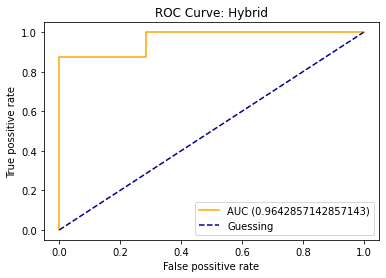

In [ ]:
model.fit(x_train, y_train)
y_prob = model.predict_proba(x_test)
y_prob_pos = y_prob[:, 1]
fpr, tpr, threshold = roc_curve(y_test, y_prob_pos)
val = roc_auc_score(y_test, y_prob_pos)
plot_roc_curve(fpr,tpr, 'Hybrid', val)

accuracy bar chart of all models

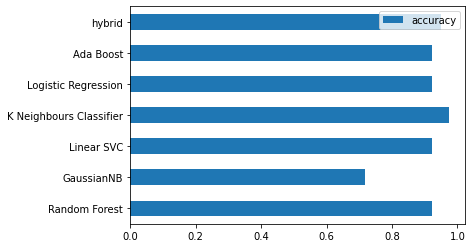

In [ ]:
model_scores['hybrid'] = hybrid_score
model_compare = pd.DataFrame(model_scores, index=['accuracy'])
model_compare.T.plot(kind='barh')

recall bar chart of all models

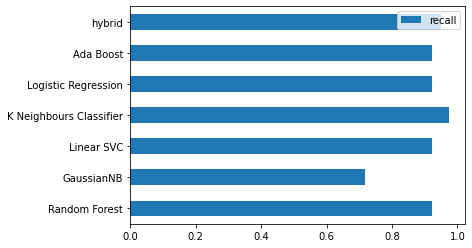

In [ ]:
model_scores['hybrid'] = hybrid_score
model_compare = pd.DataFrame(model_scores, index=['recall'])
model_compare.T.plot(kind='barh')

precision bar chart of all models

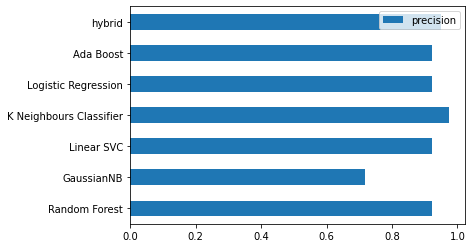

In [ ]:
model_scores['hybrid'] = hybrid_score
model_compare = pd.DataFrame(model_scores, index=['precision'])
model_compare.T.plot(kind='barh')

f1 bar chart 

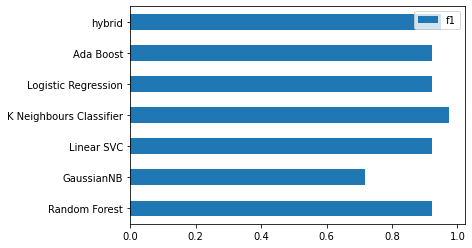

In [ ]:
model_scores['hybrid'] = hybrid_score
model_compare = pd.DataFrame(model_scores, index=['f1'])
model_compare.T.plot(kind='barh')